## Download

In [ ]:
#https://drive.google.com/file/d/1ECMp7QO6mL3Evz-5-1vI_9_soe2SdFzi/view?usp=sharing
#https://drive.google.com/file/d/1qhQwL8k516-HxBv6bUgKkykhNfvKUvk2/view?usp=drive_link #Level2
#https://drive.google.com/file/d/1KFubOB5dQkctgWaLCffpKb38kgp5Uvkf/view?usp=drive_link #Level1
#https://drive.google.com/file/d/1Fu26Frm1ip3Xd515kfNzkFwcfeVDKIFw/view?usp=drive_link #original


In [ ]:
from google.colab import drive
import gdown

file_url = "https://drive.google.com/uc?id=1Fu26Frm1ip3Xd515kfNzkFwcfeVDKIFw"
output_path = "/content/Original.zip"

# Download the file
gdown.download(file_url, output_path, quiet=False)

print("Download complete! File saved to:", output_path)

Downloading...
From (original): https://drive.google.com/uc?id=1Fu26Frm1ip3Xd515kfNzkFwcfeVDKIFw
From (redirected): https://drive.google.com/uc?id=1Fu26Frm1ip3Xd515kfNzkFwcfeVDKIFw&confirm=t&uuid=c4d010b3-7519-40a4-8377-763026044a10
To: /content/Original.zip
100%|██████████| 210M/210M [00:05<00:00, 36.3MB/s]

Download complete! File saved to: /content/Original.zip


In [ ]:
from google.colab import drive
import gdown

file_url = "https://drive.google.com/uc?id=1KFubOB5dQkctgWaLCffpKb38kgp5Uvkf"
output_path = "/content/Level1.zip"

# Download the file
gdown.download(file_url, output_path, quiet=False)

print("Download complete! File saved to:", output_path)

Downloading...
From (original): https://drive.google.com/uc?id=1KFubOB5dQkctgWaLCffpKb38kgp5Uvkf
From (redirected): https://drive.google.com/uc?id=1KFubOB5dQkctgWaLCffpKb38kgp5Uvkf&confirm=t&uuid=9eaaf396-af32-4025-81f3-c4cd4a7d5ee1
To: /content/Level1.zip
100%|██████████| 125M/125M [00:02<00:00, 47.7MB/s]

Download complete! File saved to: /content/Level1.zip


In [ ]:
from google.colab import drive
import gdown

file_url = "https://drive.google.com/uc?id=1qhQwL8k516-HxBv6bUgKkykhNfvKUvk2"
output_path = "/content/Level2.zip"

# Download the file
gdown.download(file_url, output_path, quiet=False)

print("Download complete! File saved to:", output_path)

Downloading...
From (original): https://drive.google.com/uc?id=1qhQwL8k516-HxBv6bUgKkykhNfvKUvk2
From (redirected): https://drive.google.com/uc?id=1qhQwL8k516-HxBv6bUgKkykhNfvKUvk2&confirm=t&uuid=bb97d2bc-bea8-44d8-bea0-d3df8b829de5
To: /content/Level2.zip
100%|██████████| 137M/137M [00:02<00:00, 47.1MB/s]

Download complete! File saved to: /content/Level2.zip


In [ ]:
!unzip "/content/Original.zip"
!unzip "/content/Level1.zip"
!unzip "/content/Level2.zip"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: Level1/Cloudy/augment2_60.png  
  inflating: Level1/Cloudy/augment3_274.png  
  inflating: Level1/Cloudy/augment3_1105.png  
  inflating: Level1/Cloudy/augment2_1020.png  
  inflating: Level1/Cloudy/augment1_325.png  
  inflating: Level1/Cloudy/augment3_826.png  
  inflating: Level1/Cloudy/augment3_1072.png  
  inflating: Level1/Cloudy/augment1_460.png  
  inflating: Level1/Cloudy/augment3_1176.png  
  inflating: Level1/Cloudy/augment1_320.png  
  inflating: Level1/Cloudy/augment1_954.png  
  inflating: Level1/Cloudy/augment1_1260.png  
  inflating: Level1/Cloudy/augment2_252.png  
  inflating: Level1/Cloudy/augment3_161.png  
  inflating: Level1/Cloudy/augment1_1053.png  
  inflating: Level1/Cloudy/augment2_1332.png  
  inflating: Level1/Cloudy/augment3_1058.png  
  inflating: Level1/Cloudy/augment3_1035.png  
  inflating: Level1/Cloudy/augment1_240.png  
  inflating: Level1/Cloudy/augment2_1223.png  
  inflating: Level1/Clou

## Original

### Preparing Dataset

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Concatenate, Dense, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.applications.xception import Xception, preprocess_input as preprocess_input_xception
from keras.applications.densenet import DenseNet121, preprocess_input as preprocess_input_densenet121

In [ ]:
trdataset_dir = "/content/train"

def get_dataCategories(dataset_dir):
    import glob

    categories = []
    for folder_name in os.listdir(trdataset_dir):
        if os.path.isdir(os.path.join(trdataset_dir, folder_name)):
            nbr_files = len(
                glob.glob(os.path.join(trdataset_dir, folder_name) + "/*.png")
            )
            categories.append(np.array([folder_name, nbr_files]))

    categories.sort(key=lambda a: a[0])
    cat = np.array(categories)

    return list(cat[:, 0]), list(cat[:, 1])

categories, nbr_files = get_dataCategories(trdataset_dir)

# Create DataFrame
trdf = pd.DataFrame({"categorie": categories, "numbre of files": nbr_files})
print("Train number of categories: ", len(categories))
trdf.head()

Train number of categories:  2


categorie numbre of files
0     Clear             523
1    Cloudy             412

In [ ]:
tsdataset_dir = "/content/test"

def get_dataCategories(dataset_dir):
    import glob

    categories = []
    for folder_name in os.listdir(tsdataset_dir):
        if os.path.isdir(os.path.join(tsdataset_dir, folder_name)):
            nbr_files = len(
                glob.glob(os.path.join(tsdataset_dir, folder_name) + "/*.png")
            )
            categories.append(np.array([folder_name, nbr_files]))

    categories.sort(key=lambda a: a[0])
    cat = np.array(categories)

    return list(cat[:, 0]), list(cat[:, 1])

categories, nbr_files = get_dataCategories(tsdataset_dir)

# Create DataFrame
tsdf = pd.DataFrame({"categorie": categories, "numbre of files": nbr_files})
print("Train number of categories: ", len(categories))
tsdf.head()

Train number of categories:  2


categorie numbre of files
0     Clear             225
1    Cloudy             177

In [ ]:
def create_dataset(datadir, categories, img_wid, img_high):
    X, y = [], []
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                ima_resize_rgb = cv2.resize(img_array, (img_wid, img_high))

                X.append(ima_resize_rgb)
                y.append(class_num)

            except Exception as e:
                pass

    y = np.array(y)
    X = np.array(X).reshape(y.shape[0], img_wid, img_wid, 3)
    return X, y

img_wid, img_high = 224, 224
tr_X, tr_y = create_dataset(trdataset_dir, categories, img_wid, img_high)

print(f"train X: {tr_X.shape}")
print(f"train y: {tr_y.shape}")

train X: (935, 224, 224, 3)
train y: (935,)


In [ ]:
def create_dataset(datadir, categories, img_wid, img_high):
    X, y = [], []
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                ima_resize_rgb = cv2.resize(img_array, (img_wid, img_high))

                X.append(ima_resize_rgb)
                y.append(class_num)

            except Exception as e:
                pass

    y = np.array(y)
    X = np.array(X).reshape(y.shape[0], img_wid, img_wid, 3)
    return X, y

img_wid, img_high = 224, 224
ts_X, ts_y = create_dataset(tsdataset_dir, categories, img_wid, img_high)

print(f"Test X: {ts_X.shape}")
print(f"Test y: {ts_y.shape}")

Test X: (402, 224, 224, 3)
Test y: (402,)


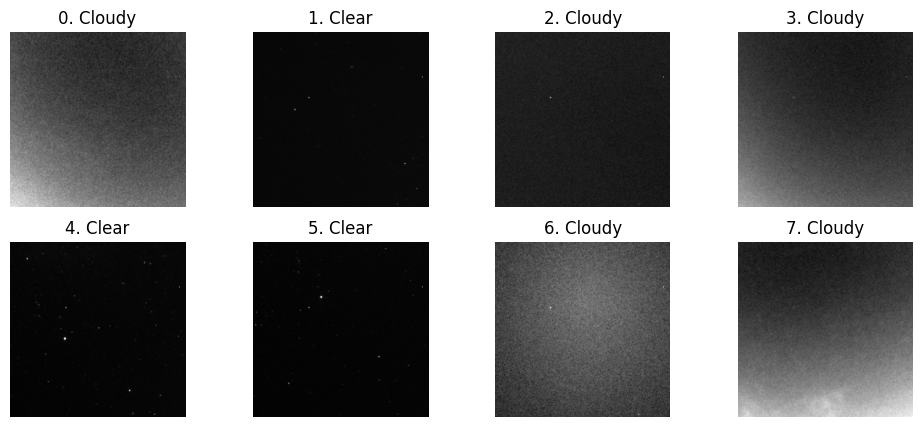

In [ ]:
plt.figure(figsize=(12, 5))
indices = np.random.choice(len(tr_X), 8, replace=False)  # 8 farklı rastgele indeks seç

for i, idx in enumerate(indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(tr_X[idx][:, :, ::-1])
    plt.title(f"{i}. {categories[tr_y[idx]]}")
    plt.axis("off")

plt.show()


In [ ]:
# en convertie y en format scaler
tr_Y = np.reshape(tr_y, (len(tr_y), 1))
ts_Y = np.reshape(ts_y, (len(ts_y), 1))

# split dataset to train and test set
x_train, x_val, y_train, y_val = train_test_split(
    tr_X,tr_Y, train_size=0.8, random_state=42
)
x_test,y_test = ts_X,ts_y
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_val: {x_val.shape}")
print(f"y_val: {y_val.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (748, 224, 224, 3)
y_train: (748, 1)
x_val: (187, 224, 224, 3)
y_val: (187, 1)
x_test: (402, 224, 224, 3)
y_test: (402,)


In [ ]:
# Image Data Augmentation
train_generator = ImageDataGenerator(
    horizontal_flip=False
)

val_generator = ImageDataGenerator(
    horizontal_flip=False
)

test_generator = ImageDataGenerator(
    horizontal_flip=False
)

# Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

train_ds = train_generator.flow(x_train, y_train, batch_size= 32)
val_ds = val_generator.flow(x_val, y_val, batch_size=32)
test_ds = test_generator.flow(x_test, y_test, batch_size=32)

### Resnet50

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 44s 796ms/step - accuracy: 0.8491 - loss: 0.2751 - val_accuracy: 0.9465 - val_loss: 0.2084 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9676 - loss: 0.0658 - val_accuracy: 0.9465 - val_loss: 0.1736 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9929 - loss: 0.0337 - val_accuracy: 0.9626 - val_loss: 0.1294 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9910 - loss: 0.0223 - val_accuracy: 0.9626 - val_loss: 0.1459 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9941 - loss: 0.0261 - val_accuracy: 0.9572 - val_loss: 0.1514 - learning_rate: 1.0000e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9886 - loss: 0.0266 - val_accuracy: 0.9305 - val_loss: 0.1984 - learning_rate: 1.0000e-04
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9931 - loss: 0

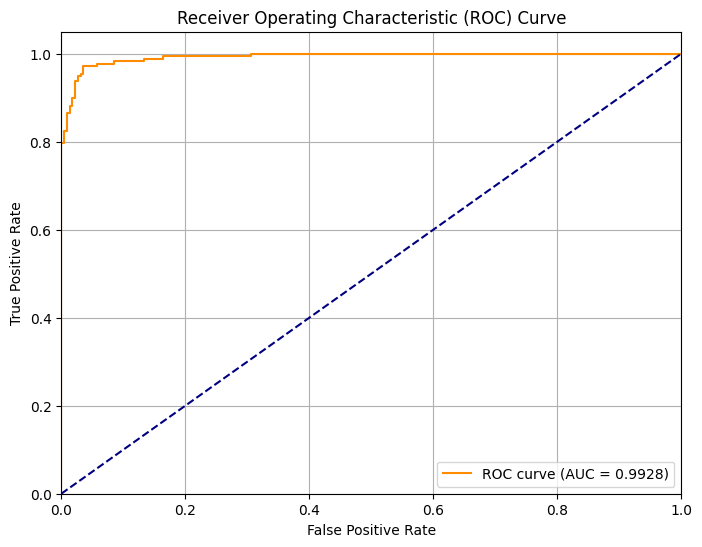

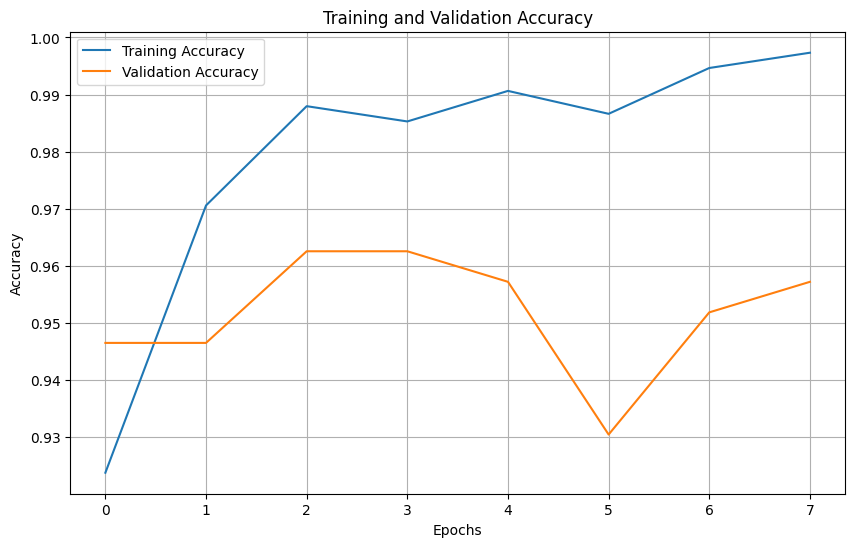

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Original_ResNet50.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'SE Block Hybrid Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[220   5]
 [ 13 164]]
              precision    recall  f1-score   support

       clear     0.9442    0.9778    0.9607       225
      cloudy     0.9704    0.9266    0.9480       177

    accuracy                         0.9552       402
   macro avg     0.9573    0.9522    0.9543       402
weighted avg     0.9557    0.9552    0.9551       402



### Xception

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8350 - loss: 0.5120 - val_accuracy: 0.9198 - val_loss: 0.2381 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9104 - loss: 0.1911 - val_accuracy: 0.9144 - val_loss: 0.2218 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9454 - loss: 0.1344 - val_accuracy: 0.9144 - val_loss: 0.2418 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9432 - loss: 0.1319 - val_accuracy: 0.9144 - val_loss: 0.2804 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9445 - loss: 0.1223 - val_accuracy: 0.9198 - val_loss: 0.2525 - learning_rate: 1.0000e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9574 - loss: 0.1043 - val_accuracy: 0.9358 - val_loss: 0.2124 - learning_rate: 1.0000e-05
Epoch 7/25
24/24 ━━━

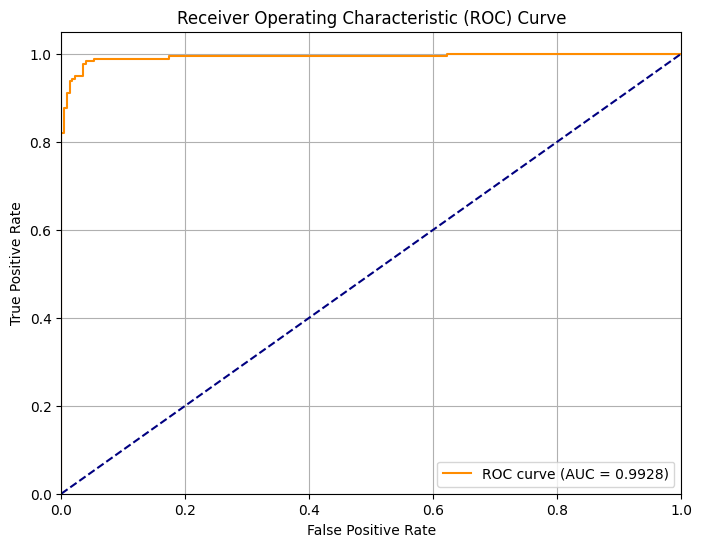

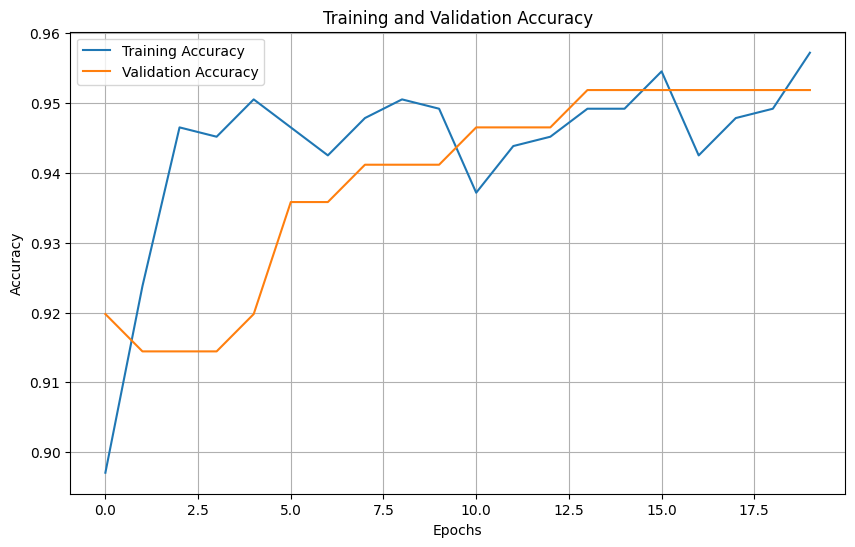

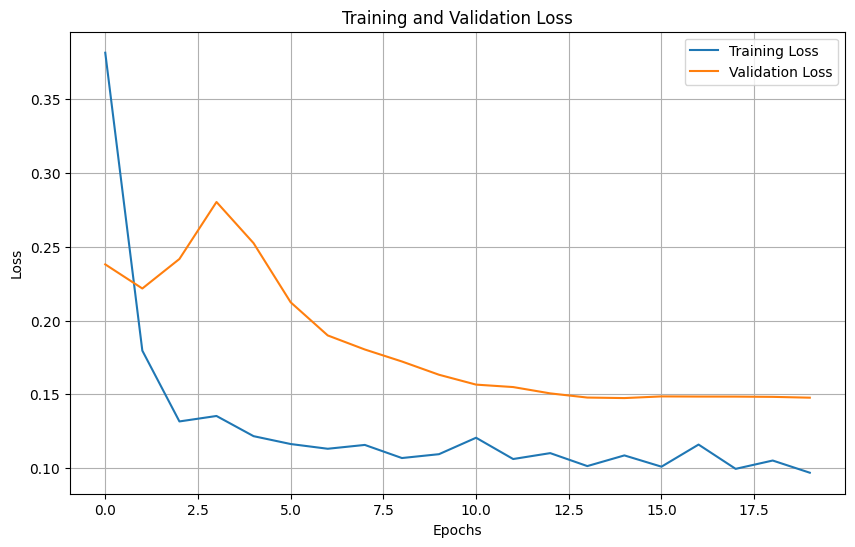

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Original_Xception.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Test Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[220   5]
 [ 10 167]]
              precision    recall  f1-score   support

       clear     0.9565    0.9778    0.9670       225
      cloudy     0.9709    0.9435    0.9570       177

    accuracy                         0.9627       402
   macro avg     0.9637    0.9606    0.9620       402
weighted avg     0.9629    0.9627    0.9626       402



### DenseNet121

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.7266 - loss: 0.5140 - val_accuracy: 0.9465 - val_loss: 0.1684 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9230 - loss: 0.2014 - val_accuracy: 0.9465 - val_loss: 0.1460 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9504 - loss: 0.1271 - val_accuracy: 0.9412 - val_loss: 0.1250 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9585 - loss: 0.1271 - val_accuracy: 0.9519 - val_loss: 0.1173 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9537 - loss: 0.1063 - val_accuracy: 0.9572 - val_loss: 0.1102 - learning_rate: 1.0000e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9526 - loss: 0.1042 - val_accuracy: 0.9519 - val_loss: 0.1122 - learning_rate: 1.0000e-04
Epoch 7/25
24/24 ━━━

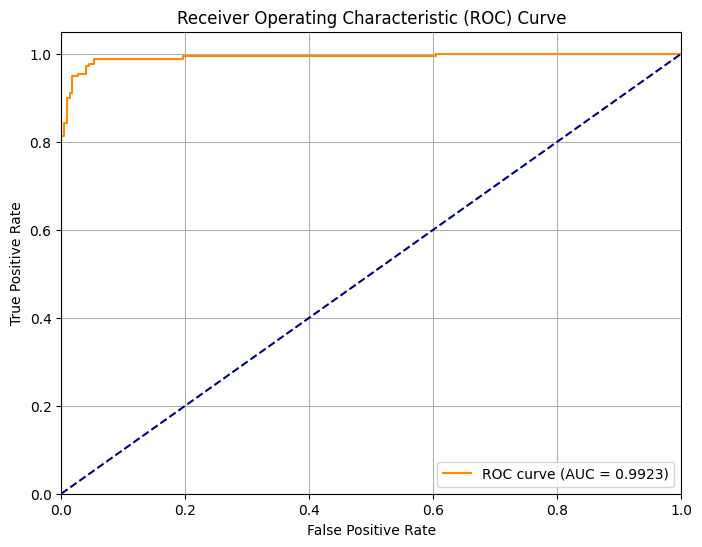

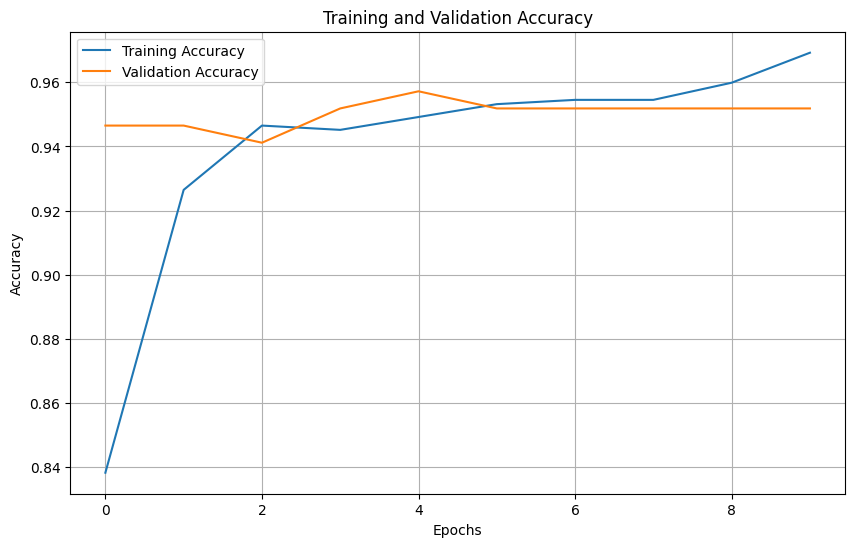

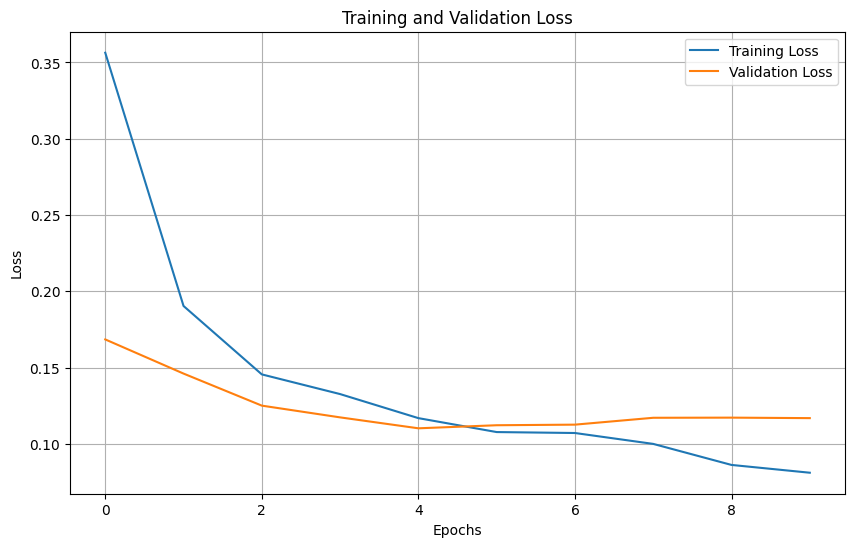

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Original_DenseNet121.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Test Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[222   3]
 [ 16 161]]
              precision    recall  f1-score   support

       clear     0.9328    0.9867    0.9590       225
      cloudy     0.9817    0.9096    0.9443       177

    accuracy                         0.9527       402
   macro avg     0.9572    0.9481    0.9516       402
weighted avg     0.9543    0.9527    0.9525       402



### ResNet50V2

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 672ms/step - accuracy: 0.7856 - loss: 0.4860 - val_accuracy: 0.7807 - val_loss: 0.6033 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9507 - loss: 0.1632 - val_accuracy: 0.9305 - val_loss: 0.1758 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9407 - loss: 0.1217 - val_accuracy: 0.9572 - val_loss: 0.1303 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9527 - loss: 0.1016 - val_accuracy: 0.9572 - val_loss: 0.1356 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9538 - loss: 0.1022 - val_accuracy: 0.9465 - val_loss: 0.1824 - learning_rate: 1.0000e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9426 - loss: 0.1051 - val_accuracy: 0.9465 - val_loss: 0.1912 - learning_rate: 1.0000e-04
Epoch 7/25
24/24 

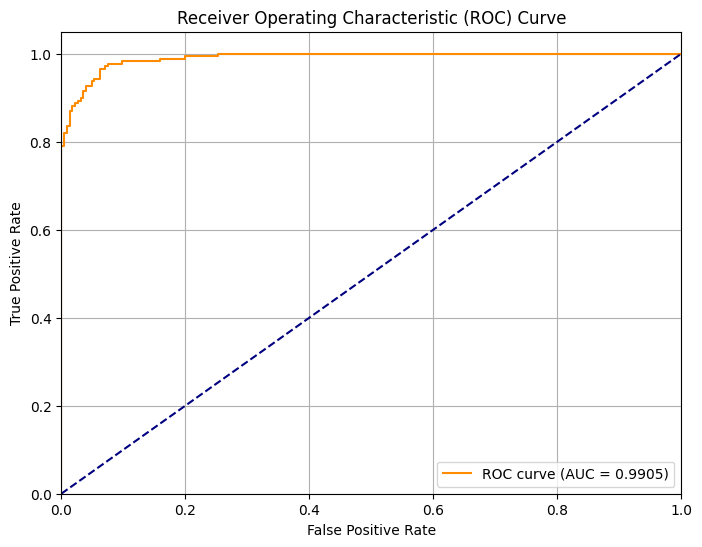

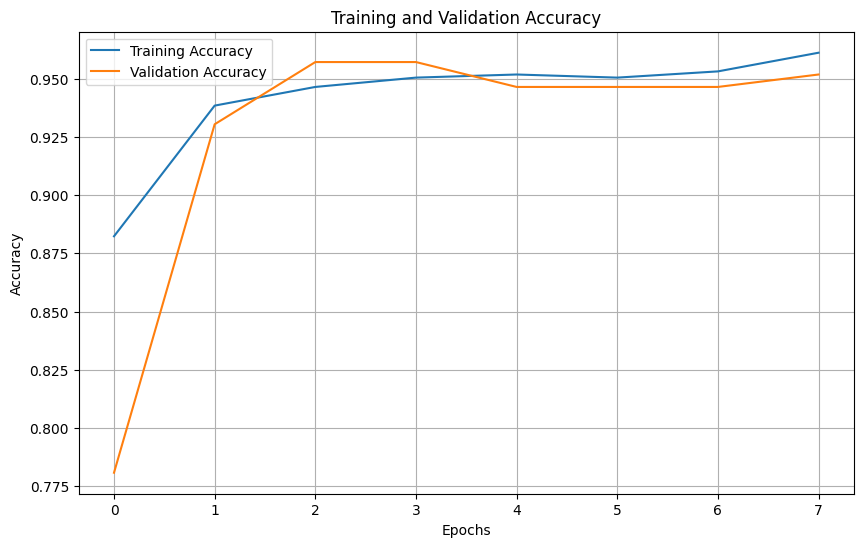

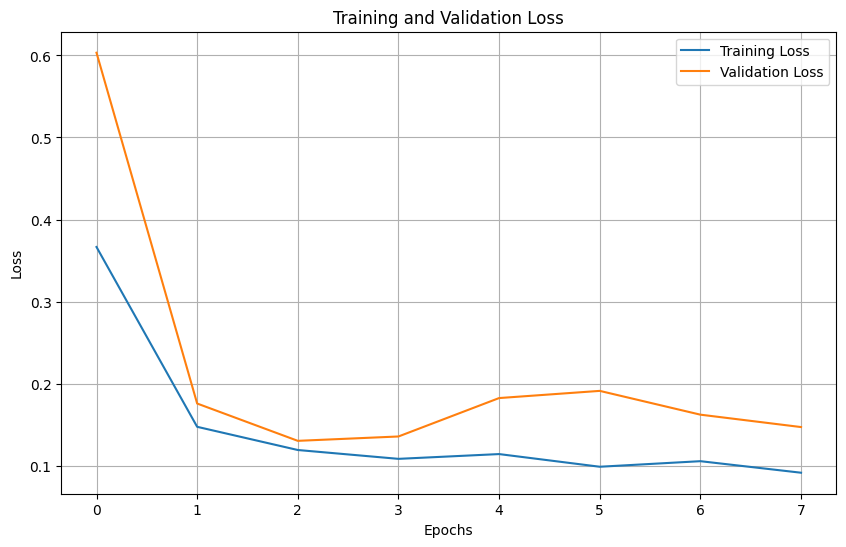

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 =ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Original_ResNet50V2.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'ResNet50V2 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[222   3]
 [ 28 149]]
              precision    recall  f1-score   support

       clear     0.8880    0.9867    0.9347       225
      cloudy     0.9803    0.8418    0.9058       177

    accuracy                         0.9229       402
   macro avg     0.9341    0.9142    0.9203       402
weighted avg     0.9286    0.9229    0.9220       402



### MobileNetV2

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8129 - loss: 0.3955 - val_accuracy: 0.4385 - val_loss: 0.7404 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9564 - loss: 0.0994 - val_accuracy: 0.4492 - val_loss: 0.7001 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9790 - loss: 0.0718 - val_accuracy: 0.5134 - val_loss: 0.6451 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9877 - loss: 0.0540 - val_accuracy: 0.4599 - val_loss: 0.8270 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9528 - loss: 0.1027 - val_accuracy: 0.6417 - val_loss: 0.5609 - learning_rate: 1.0000e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9863 - loss: 0.0522 - val_accuracy: 0.7219 - val_loss: 0.5051 - learning_rate: 1.0000e-04
Epoch 7/25
24/24 ━━━━━

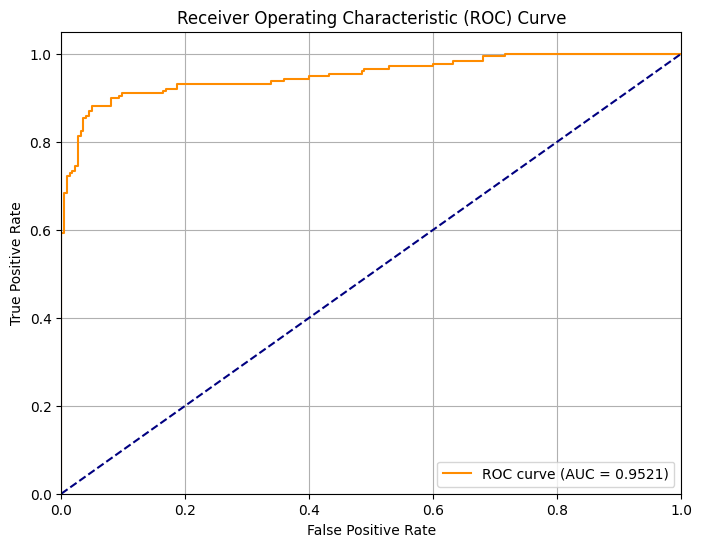

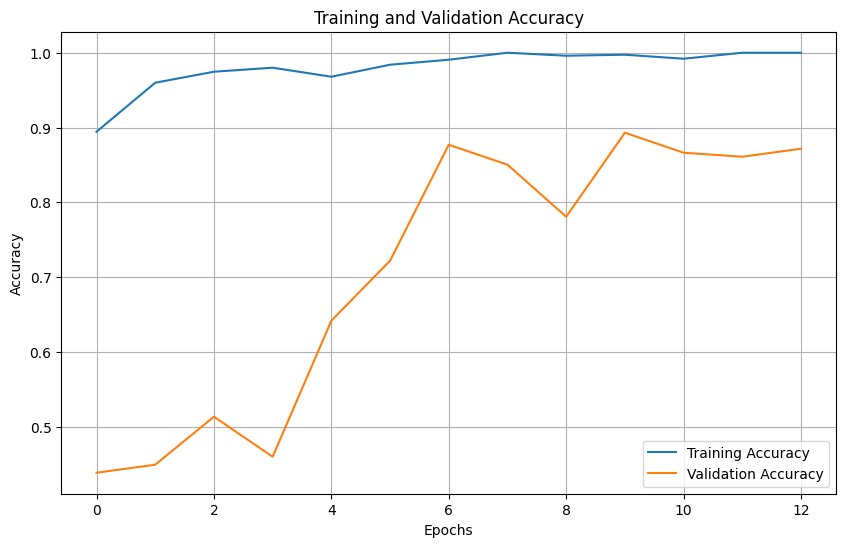

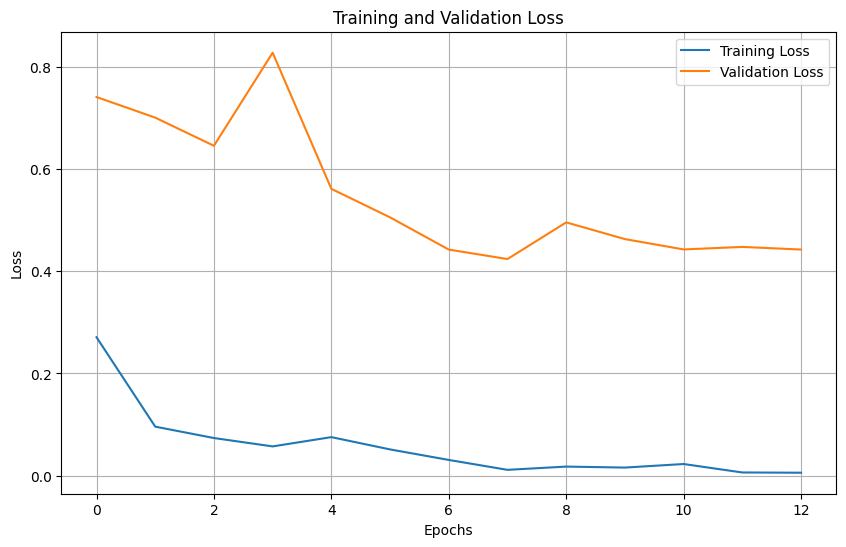

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Original_MobileNetV2.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'MobileNetV2 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[190  35]
 [ 16 161]]
              precision    recall  f1-score   support

       clear     0.9223    0.8444    0.8817       225
      cloudy     0.8214    0.9096    0.8633       177

    accuracy                         0.8731       402
   macro avg     0.8719    0.8770    0.8725       402
weighted avg     0.8779    0.8731    0.8736       402



### NasNetMobile

19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.4414 - loss: 1.2545 - val_accuracy: 0.8235 - val_loss: 0.3324 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7966 - loss: 0.4722 - val_accuracy: 0.8503 - val_loss: 0.2882 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9029 - loss: 0.2812 - val_accuracy: 0.8663 - val_loss: 0.2769 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9032 - loss: 0.3231 - val_accuracy: 0.8663 - val_loss: 0.3209 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9142 - loss: 0.2260 - val_accuracy: 0.8663 - val_loss: 0.3124 - learning_rate: 1.0000e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9335 - loss: 0.2276 - val_accuracy: 0.8877 - val_loss: 0.2817 - learning_rate: 1.0000e-04
Epoch 7/25
24/24 ━━━

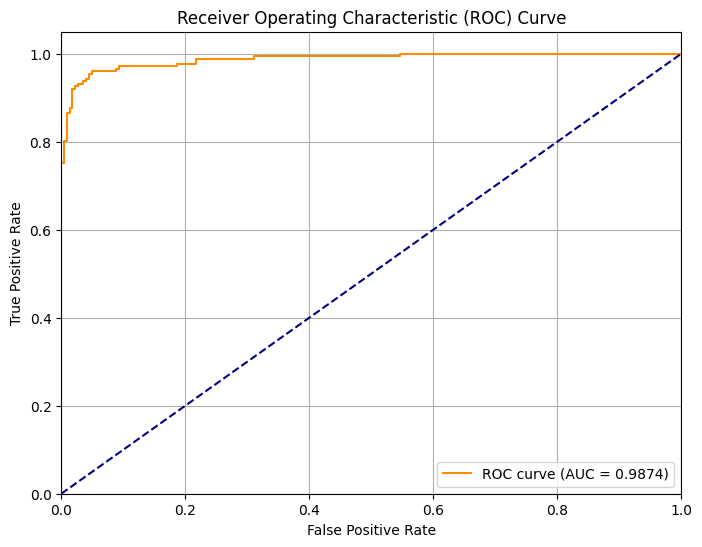

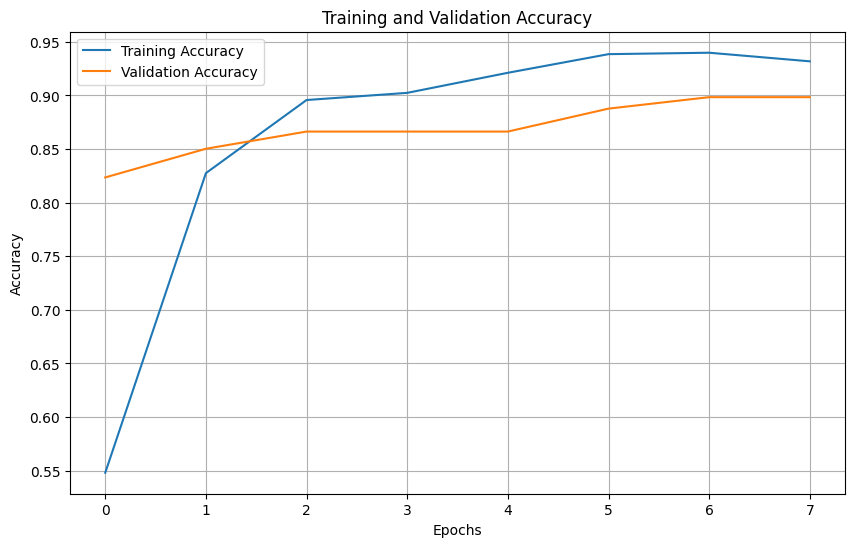

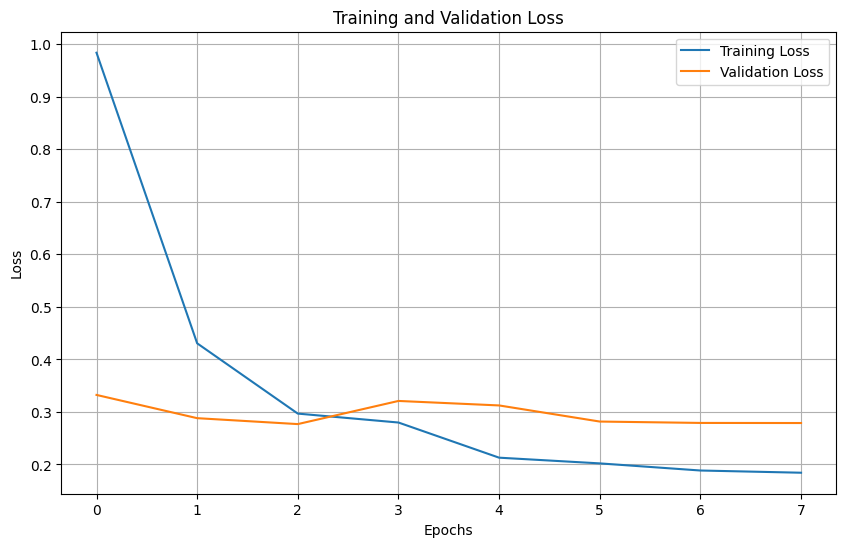

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, NASNetMobile
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Original_NasNetMobile.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'NasNetMobile Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[195  30]
 [  5 172]]
              precision    recall  f1-score   support

       clear     0.9750    0.8667    0.9176       225
      cloudy     0.8515    0.9718    0.9077       177

    accuracy                         0.9129       402
   macro avg     0.9132    0.9192    0.9126       402
weighted avg     0.9206    0.9129    0.9132       402



### VGG16

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 686ms/step - accuracy: 0.7914 - loss: 0.5476 - val_accuracy: 0.9144 - val_loss: 0.1690 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9364 - loss: 0.1929 - val_accuracy: 0.9037 - val_loss: 0.1911 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9431 - loss: 0.2025 - val_accuracy: 0.9144 - val_loss: 0.1812 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9544 - loss: 0.1517 - val_accuracy: 0.9198 - val_loss: 0.1811 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9191 - loss: 0.1864 - val_accuracy: 0.9091 - val_loss: 0.1581 - learning_rate: 1.0000e-05
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9465 - loss: 0.1401 - val_accuracy: 0.9198 - val_loss: 0.1644 - learning_rate: 1.0000e-05
Epoch 7/25
24/24 

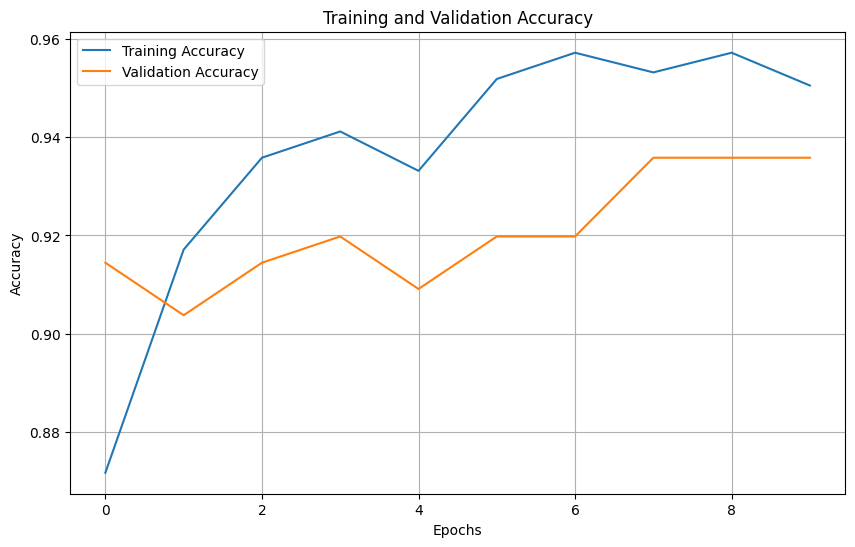

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Original_VGG16.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'VGG16 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[213  12]
 [  7 170]]
              precision    recall  f1-score   support

       clear     0.9682    0.9467    0.9573       225
      cloudy     0.9341    0.9605    0.9471       177

    accuracy                         0.9527       402
   macro avg     0.9511    0.9536    0.9522       402
weighted avg     0.9532    0.9527    0.9528       402



### VGG19

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 319ms/step - accuracy: 0.7049 - loss: 0.6059 - val_accuracy: 0.9358 - val_loss: 0.2858 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9085 - loss: 0.2589 - val_accuracy: 0.9465 - val_loss: 0.1890 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9260 - loss: 0.1810 - val_accuracy: 0.9144 - val_loss: 0.2089 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9339 - loss: 0.1951 - val_accuracy: 0.8984 - val_loss: 0.3167 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9551 - loss: 0.1313 - val_accuracy: 0.9465 - val_loss: 0.1814 - learning_rate: 1.0000e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9494 - loss: 0.1279 - val_accuracy: 0.9198 - val_loss: 0.2024 - learning_rate: 1.0000e-04
Epoch 7/25
24/24 

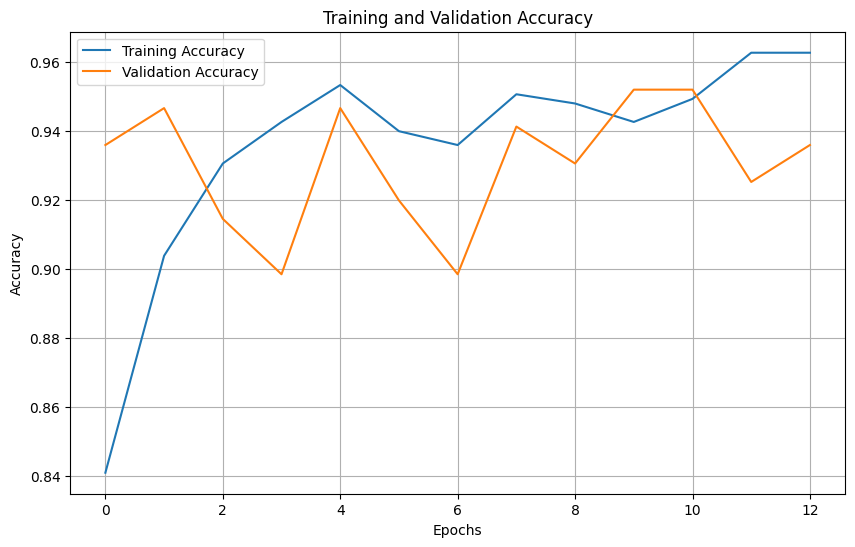

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Original_VGG19.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'VGG19 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[218   7]
 [ 10 167]]
              precision    recall  f1-score   support

       clear     0.9561    0.9689    0.9625       225
      cloudy     0.9598    0.9435    0.9516       177

    accuracy                         0.9577       402
   macro avg     0.9580    0.9562    0.9570       402
weighted avg     0.9577    0.9577    0.9577       402



### EfficientNetB0

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7557 - loss: 0.5100 - val_accuracy: 0.9305 - val_loss: 0.4821 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9404 - loss: 0.2115 - val_accuracy: 0.8877 - val_loss: 0.3586 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9527 - loss: 0.1395 - val_accuracy: 0.8610 - val_loss: 0.3222 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9662 - loss: 0.1221 - val_accuracy: 0.8930 - val_loss: 0.2735 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9455 - loss: 0.1288 - val_accuracy: 0.9091 - val_loss: 0.2420 - learning_rate: 1.0000e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9512 - loss: 0.1064 - val_accuracy: 0.9144 - val_loss: 0.2289 - learning_rate: 1.0000e-04
Epoch 7/25
24/24 ━━━

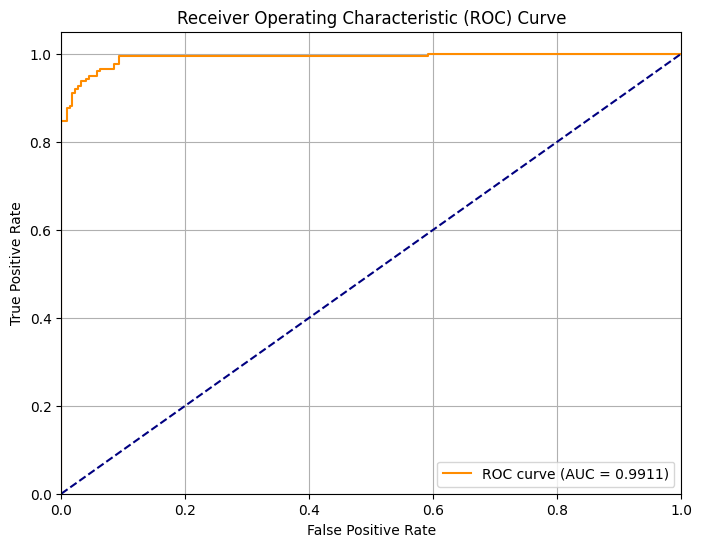

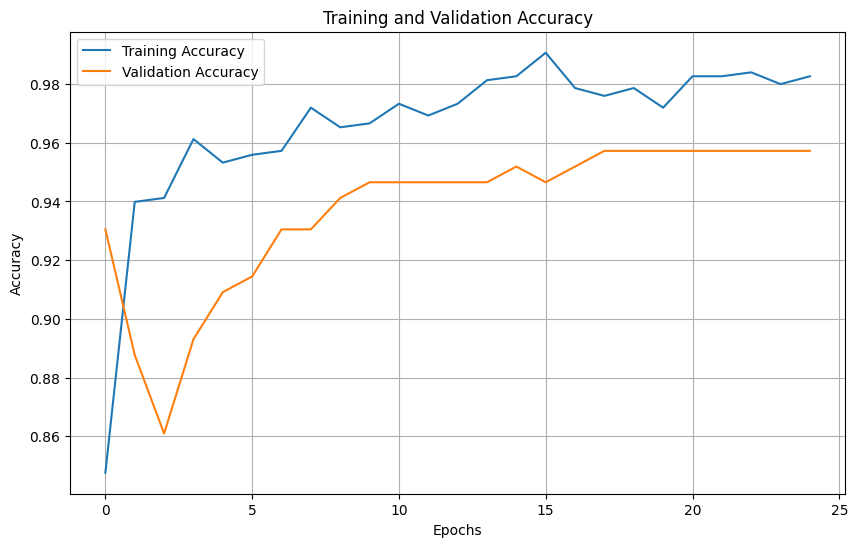

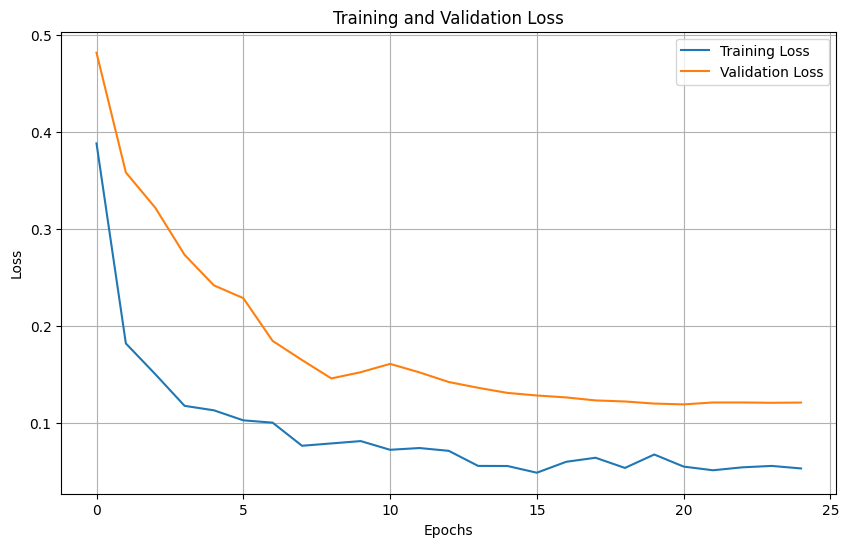

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Original_EfficientNetB0.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'EfficientNetB0 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[220   5]
 [ 14 163]]
              precision    recall  f1-score   support

       clear     0.9402    0.9778    0.9586       225
      cloudy     0.9702    0.9209    0.9449       177

    accuracy                         0.9527       402
   macro avg     0.9552    0.9493    0.9518       402
weighted avg     0.9534    0.9527    0.9526       402



### EfficientNetV2B0

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7129 - loss: 0.6061 - val_accuracy: 0.9358 - val_loss: 0.2661 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9343 - loss: 0.2611 - val_accuracy: 0.9358 - val_loss: 0.1538 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9544 - loss: 0.1661 - val_accuracy: 0.9358 - val_loss: 0.1388 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9427 - loss: 0.1525 - val_accuracy: 0.9305 - val_loss: 0.1306 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9633 - loss: 0.1194 - val_accuracy: 0.9358 - val_loss: 0.1266 - learning_rate: 1.0000e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9411 - loss: 0.1398 - val_accuracy: 0.9412 - val_loss: 0.1259 - learning_rate: 1.0000e-04
Epoch 7/25
24/24 ━━━

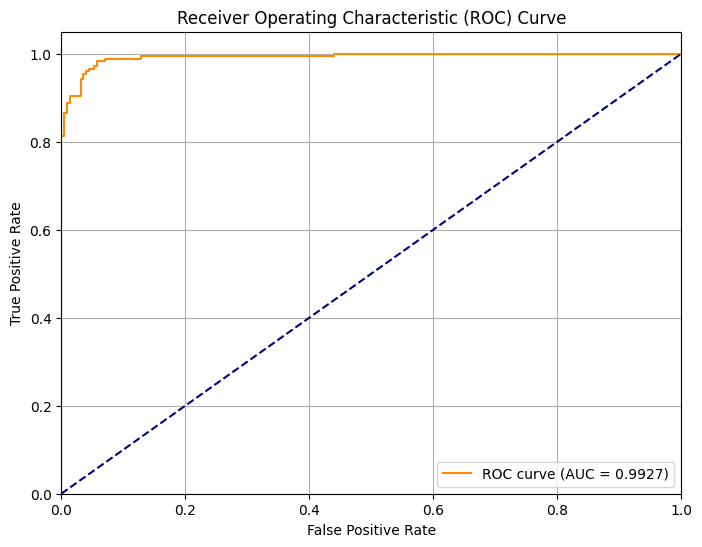

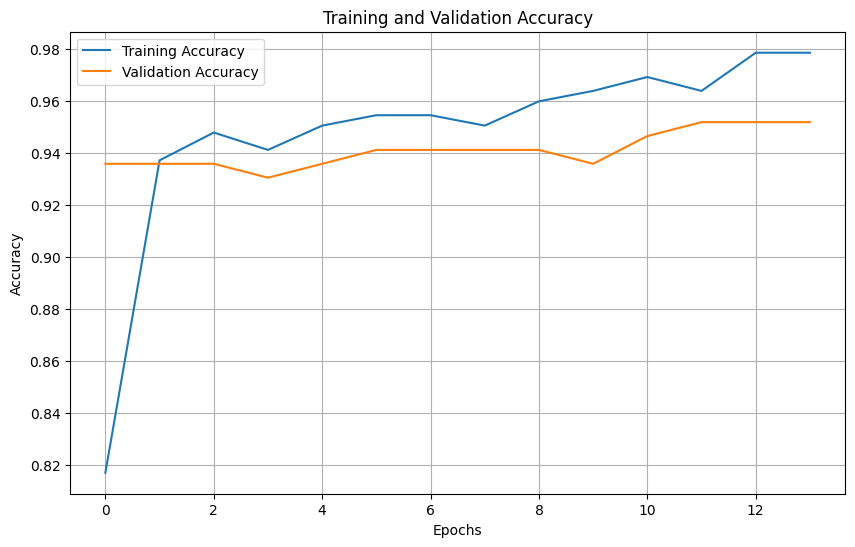

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, EfficientNetV2B0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Original_EfficientNetV2B0.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Original_EfficientNetV2B0 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[218   7]
 [ 14 163]]
              precision    recall  f1-score   support

       clear     0.9397    0.9689    0.9540       225
      cloudy     0.9588    0.9209    0.9395       177

    accuracy                         0.9478       402
   macro avg     0.9492    0.9449    0.9468       402
weighted avg     0.9481    0.9478    0.9476       402



### InceptionV3

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 913ms/step - accuracy: 0.8515 - loss: 0.3471 - val_accuracy: 0.9198 - val_loss: 0.2265 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9276 - loss: 0.1681 - val_accuracy: 0.9251 - val_loss: 0.1858 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9443 - loss: 0.1474 - val_accuracy: 0.9305 - val_loss: 0.2119 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9531 - loss: 0.1072 - val_accuracy: 0.9626 - val_loss: 0.1290 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9529 - loss: 0.1034 - val_accuracy: 0.9572 - val_loss: 0.1238 - learning_rate: 1.0000e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9595 - loss: 0.0852 - val_accuracy: 0.9572 - val_loss: 0.1390 - learning_rate: 1.0000e-04
Epoch 7/25
24/24 

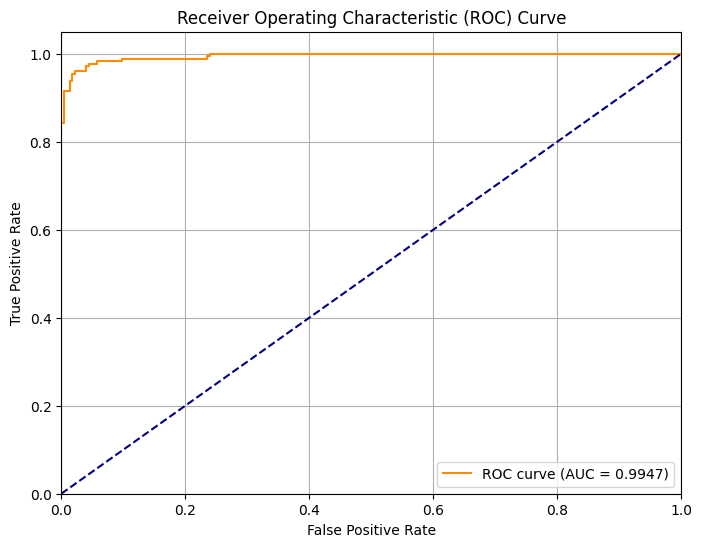

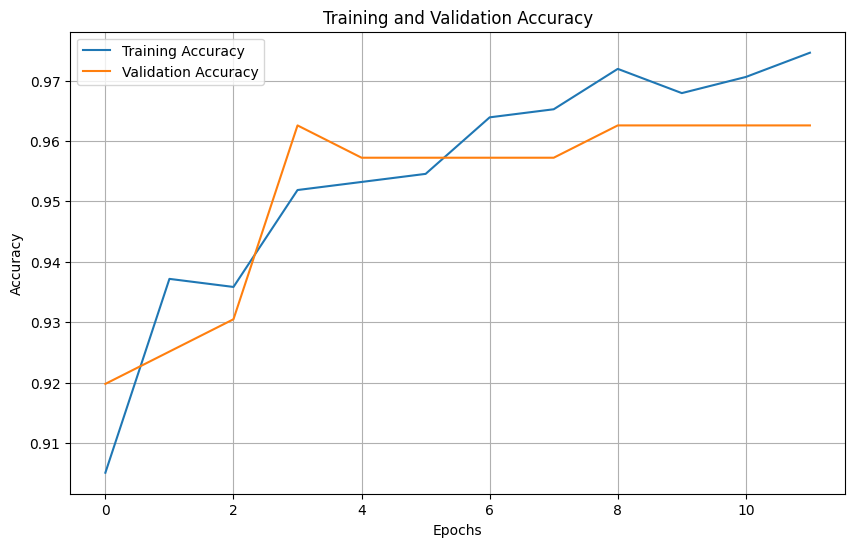

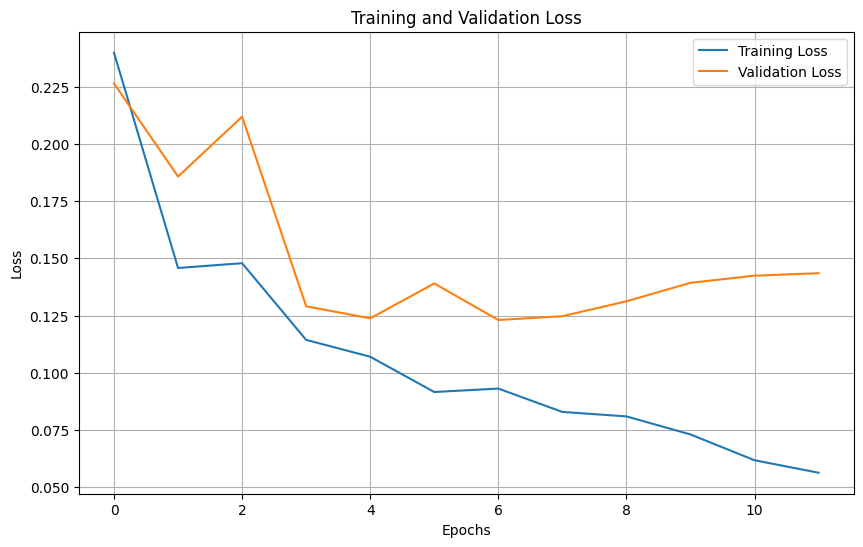

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Original_InceptionV3.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'InceptionV3 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[224   1]
 [ 19 158]]
              precision    recall  f1-score   support

       clear     0.9218    0.9956    0.9573       225
      cloudy     0.9937    0.8927    0.9405       177

    accuracy                         0.9502       402
   macro avg     0.9578    0.9441    0.9489       402
weighted avg     0.9535    0.9502    0.9499       402



### InceptionResNetV2

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8620 - loss: 0.3783 - val_accuracy: 0.7968 - val_loss: 0.4164 - learning_rate: 1.0000e-04
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9231 - loss: 0.2455 - val_accuracy: 0.9626 - val_loss: 0.2795 - learning_rate: 1.0000e-04
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9185 - loss: 0.2545 - val_accuracy: 0.9572 - val_loss: 0.1859 - learning_rate: 1.0000e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9332 - loss: 0.1836 - val_accuracy: 0.9572 - val_loss: 0.1558 - learning_rate: 1.0000e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9134 - loss: 0.2354 - val_accuracy: 0.9572 - val_loss: 0.1548 - learning_rate: 1.0000e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9466 - loss: 0.1822 - val_accuracy: 0.9572 - val_loss: 0.1604 - learning_rate: 1.0000e-04
Epoch 7/25
24/24 

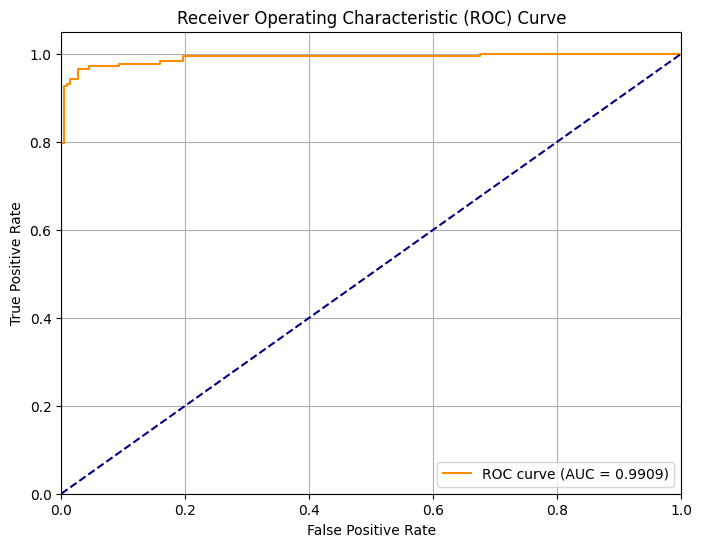

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Original_InceptionResNetV2.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'InceptionResNetV2 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[224   1]
 [ 14 163]]
              precision    recall  f1-score   support

       clear     0.9412    0.9956    0.9676       225
      cloudy     0.9939    0.9209    0.9560       177

    accuracy                         0.9627       402
   macro avg     0.9675    0.9582    0.9618       402
weighted avg     0.9644    0.9627    0.9625       402



## Level 1

### Preparing Dataset

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Concatenate, Dense, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.applications.xception import Xception, preprocess_input as preprocess_input_xception
from keras.applications.densenet import DenseNet121, preprocess_input as preprocess_input_densenet121

In [ ]:
trdataset_dir = "/content/Level1"

def get_dataCategories(dataset_dir):
    import glob

    categories = []
    for folder_name in os.listdir(trdataset_dir):
        if os.path.isdir(os.path.join(trdataset_dir, folder_name)):
            nbr_files = len(
                glob.glob(os.path.join(trdataset_dir, folder_name) + "/*.png")
            )
            categories.append(np.array([folder_name, nbr_files]))

    categories.sort(key=lambda a: a[0])
    cat = np.array(categories)

    return list(cat[:, 0]), list(cat[:, 1])

categories, nbr_files = get_dataCategories(trdataset_dir)

# Create DataFrame
trdf = pd.DataFrame({"categorie": categories, "numbre of files": nbr_files})
print("Train number of categories: ", len(categories))
trdf.head()

Train number of categories:  2


categorie numbre of files
0     Clear            1616
1    Cloudy            1210

In [ ]:
tsdataset_dir = "/content/test"

def get_dataCategories(dataset_dir):
    import glob

    categories = []
    for folder_name in os.listdir(tsdataset_dir):
        if os.path.isdir(os.path.join(tsdataset_dir, folder_name)):
            nbr_files = len(
                glob.glob(os.path.join(tsdataset_dir, folder_name) + "/*.png")
            )
            categories.append(np.array([folder_name, nbr_files]))

    categories.sort(key=lambda a: a[0])
    cat = np.array(categories)

    return list(cat[:, 0]), list(cat[:, 1])

categories, nbr_files = get_dataCategories(tsdataset_dir)

# Create DataFrame
tsdf = pd.DataFrame({"categorie": categories, "numbre of files": nbr_files})
print("Train number of categories: ", len(categories))
tsdf.head()

Train number of categories:  2


categorie numbre of files
0     Clear             225
1    Cloudy             177

In [ ]:
def create_dataset(datadir, categories, img_wid, img_high):
    X, y = [], []
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                ima_resize_rgb = cv2.resize(img_array, (img_wid, img_high))

                X.append(ima_resize_rgb)
                y.append(class_num)

            except Exception as e:
                pass

    y = np.array(y)
    X = np.array(X).reshape(y.shape[0], img_wid, img_wid, 3)
    return X, y

img_wid, img_high = 224, 224
tr_X, tr_y = create_dataset(trdataset_dir, categories, img_wid, img_high)

print(f"train X: {tr_X.shape}")
print(f"train y: {tr_y.shape}")

train X: (2826, 224, 224, 3)
train y: (2826,)


In [ ]:
def create_dataset(datadir, categories, img_wid, img_high):
    X, y = [], []
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                ima_resize_rgb = cv2.resize(img_array, (img_wid, img_high))

                X.append(ima_resize_rgb)
                y.append(class_num)

            except Exception as e:
                pass

    y = np.array(y)
    X = np.array(X).reshape(y.shape[0], img_wid, img_wid, 3)
    return X, y

img_wid, img_high = 224, 224
ts_X, ts_y = create_dataset(tsdataset_dir, categories, img_wid, img_high)

print(f"Test X: {ts_X.shape}")
print(f"Test y: {ts_y.shape}")

Test X: (402, 224, 224, 3)
Test y: (402,)


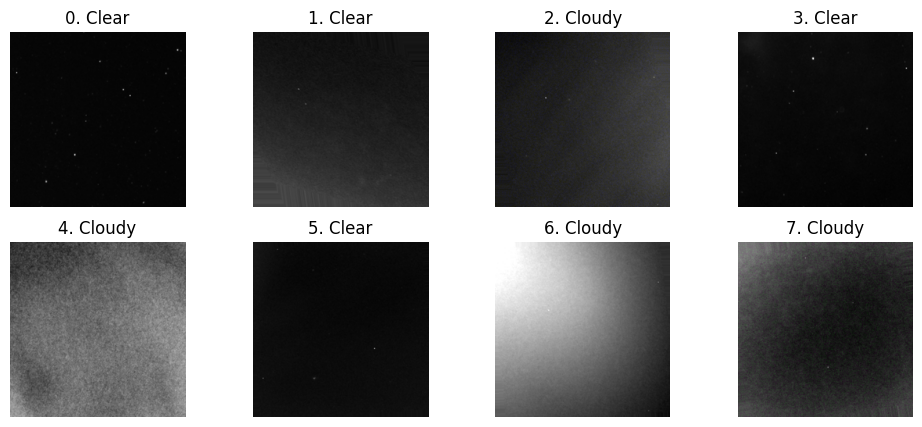

In [ ]:
plt.figure(figsize=(12, 5))
indices = np.random.choice(len(tr_X), 8, replace=False)  # 8 farklı rastgele indeks seç

for i, idx in enumerate(indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(tr_X[idx][:, :, ::-1])
    plt.title(f"{i}. {categories[tr_y[idx]]}")
    plt.axis("off")

plt.show()


In [ ]:
# en convertie y en format scaler
tr_Y = np.reshape(tr_y, (len(tr_y), 1))
ts_Y = np.reshape(ts_y, (len(ts_y), 1))

# split dataset to train and test set
x_train, x_val, y_train, y_val = train_test_split(
    tr_X,tr_Y, train_size=0.8, random_state=42
)
x_test,y_test = ts_X,ts_y
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_val: {x_val.shape}")
print(f"y_val: {y_val.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (2260, 224, 224, 3)
y_train: (2260, 1)
x_val: (566, 224, 224, 3)
y_val: (566, 1)
x_test: (402, 224, 224, 3)
y_test: (402,)


In [ ]:
# Image Data Augmentation
train_generator = ImageDataGenerator(
    horizontal_flip=False
)

val_generator = ImageDataGenerator(
    horizontal_flip=False
)

test_generator = ImageDataGenerator(
    horizontal_flip=False
)

# Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

train_ds = train_generator.flow(x_train, y_train, batch_size= 32)
val_ds = val_generator.flow(x_val, y_val, batch_size=32)
test_ds = test_generator.flow(x_test, y_test, batch_size=32)

### ResNet50

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 294ms/step - accuracy: 0.8938 - loss: 0.2296 - val_accuracy: 0.9435 - val_loss: 0.1617 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9749 - loss: 0.0604 - val_accuracy: 0.9470 - val_loss: 0.2070 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9822 - loss: 0.0375 - val_accuracy: 0.9488 - val_loss: 0.2331 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9842 - loss: 0.0528 - val_accuracy: 0.9435 - val_loss: 0.1676 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9993 - loss: 0.0088 - val_accuracy: 0.9505 - val_loss: 0.1605 - learning_rate: 1.0000e-05
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9987 - loss: 0.0074 - val_accuracy: 0.9488 - val_loss: 0.1697 - learning_rate: 1.0000e-05
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 1.0000 - loss: 0

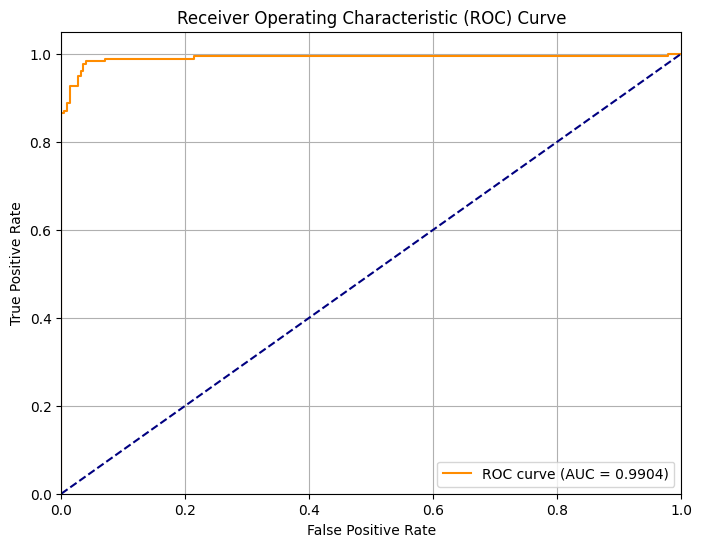

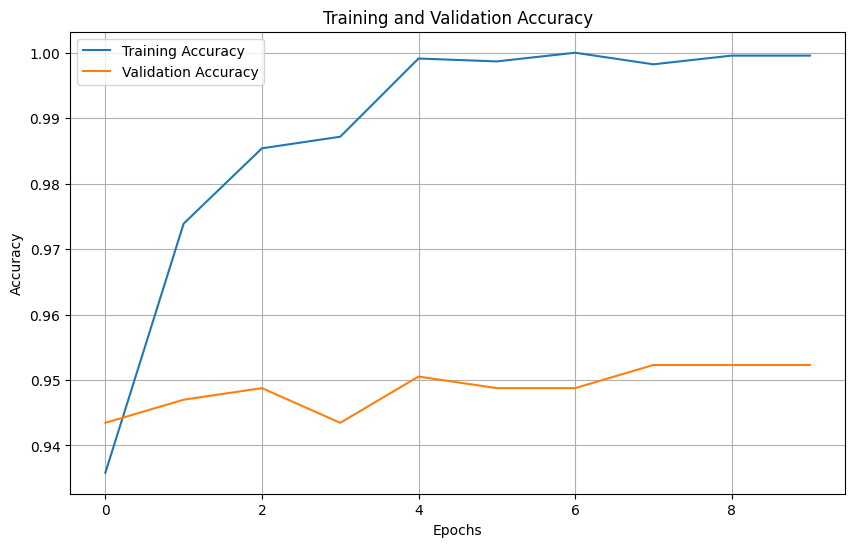

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds

base_model1 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)

initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level1_ResNet50.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Test Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[222   3]
 [ 15 162]]
              precision    recall  f1-score   support

       clear     0.9367    0.9867    0.9610       225
      cloudy     0.9818    0.9153    0.9474       177

    accuracy                         0.9552       402
   macro avg     0.9593    0.9510    0.9542       402
weighted avg     0.9566    0.9552    0.9550       402



### Xception

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 53s 518ms/step - accuracy: 0.8615 - loss: 0.3909 - val_accuracy: 0.8357 - val_loss: 0.8243 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9313 - loss: 0.1823 - val_accuracy: 0.8993 - val_loss: 0.2545 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9471 - loss: 0.1386 - val_accuracy: 0.9240 - val_loss: 0.1794 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9471 - loss: 0.1396 - val_accuracy: 0.9223 - val_loss: 0.1819 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9532 - loss: 0.1226 - val_accuracy: 0.9311 - val_loss: 0.1698 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9557 - loss: 0.1130 - val_accuracy: 0.9382 - val_loss: 0.1579 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.951

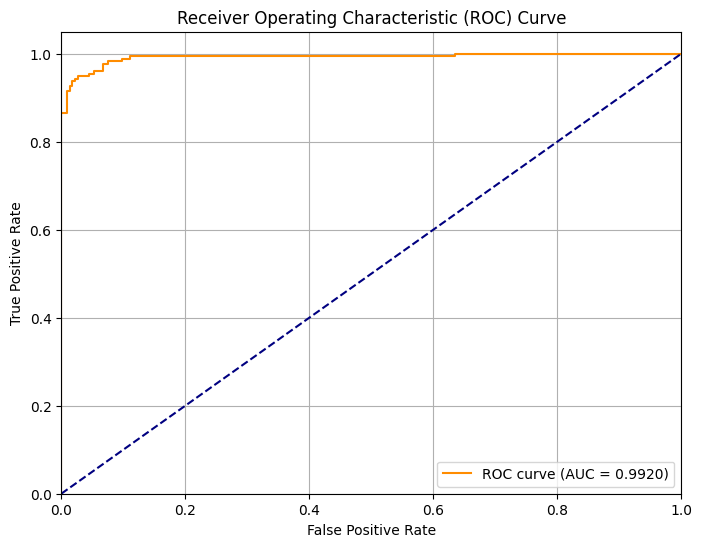

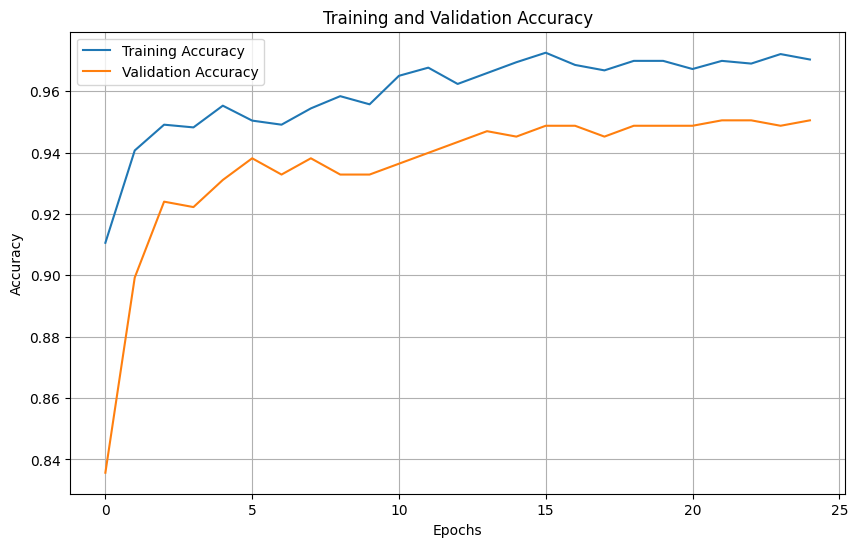

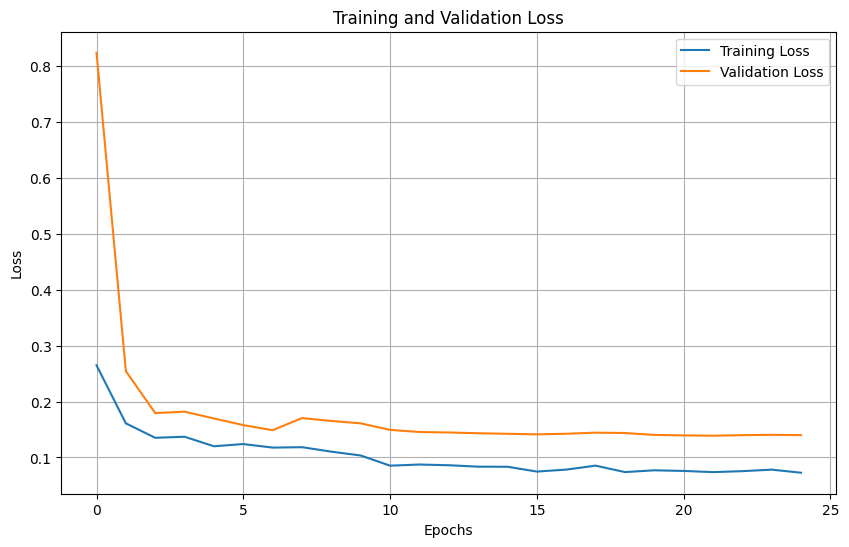

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level1_Xception.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Level1_Xception Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[223   2]
 [ 24 153]]
              precision    recall  f1-score   support

       clear     0.9028    0.9911    0.9449       225
      cloudy     0.9871    0.8644    0.9217       177

    accuracy                         0.9353       402
   macro avg     0.9450    0.9278    0.9333       402
weighted avg     0.9399    0.9353    0.9347       402



### DenseNet121

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 73s 604ms/step - accuracy: 0.8401 - loss: 0.3505 - val_accuracy: 0.9346 - val_loss: 0.1714 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9535 - loss: 0.1271 - val_accuracy: 0.9346 - val_loss: 0.1620 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9562 - loss: 0.1249 - val_accuracy: 0.9399 - val_loss: 0.1524 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9595 - loss: 0.1156 - val_accuracy: 0.9382 - val_loss: 0.1370 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9701 - loss: 0.0897 - val_accuracy: 0.9452 - val_loss: 0.1280 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9705 - loss: 0.0748 - val_accuracy: 0.9452 - val_loss: 0.1201 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.976

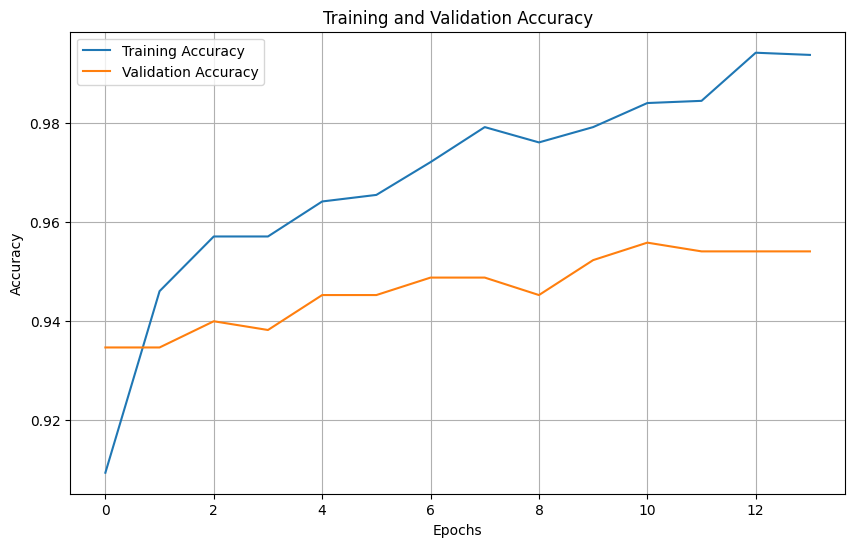

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level1_DenseNet121.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Level1_DenseNet121 Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[221   4]
 [  9 168]]
              precision    recall  f1-score   support

       clear     0.9609    0.9822    0.9714       225
      cloudy     0.9767    0.9492    0.9628       177

    accuracy                         0.9677       402
   macro avg     0.9688    0.9657    0.9671       402
weighted avg     0.9679    0.9677    0.9676       402



### ResNet50V2

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 33s 226ms/step - accuracy: 0.8886 - loss: 0.3434 - val_accuracy: 0.8975 - val_loss: 0.2687 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9370 - loss: 0.1569 - val_accuracy: 0.9346 - val_loss: 0.2069 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9419 - loss: 0.1424 - val_accuracy: 0.9399 - val_loss: 0.1525 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9490 - loss: 0.1273 - val_accuracy: 0.9435 - val_loss: 0.1369 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9521 - loss: 0.1213 - val_accuracy: 0.9452 - val_loss: 0.1367 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9566 - loss: 0.1001 - val_accuracy: 0.9470 - val_loss: 0.1209 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.962

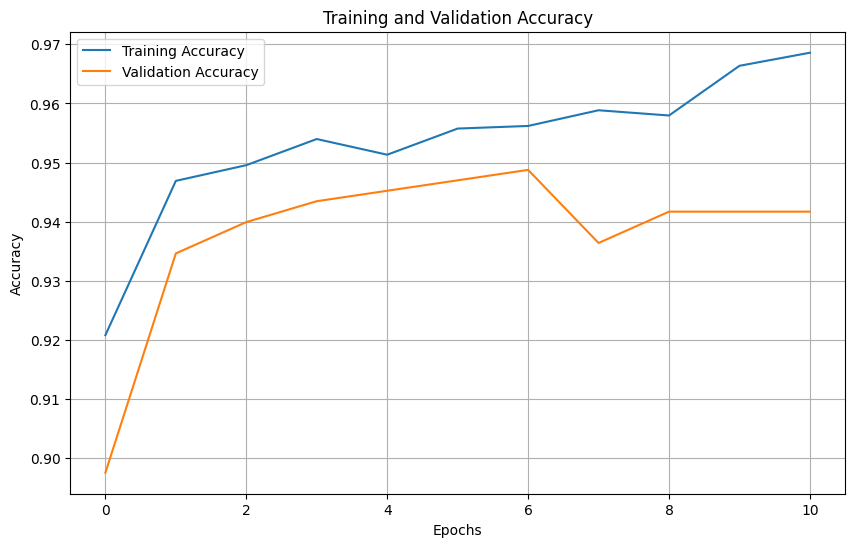

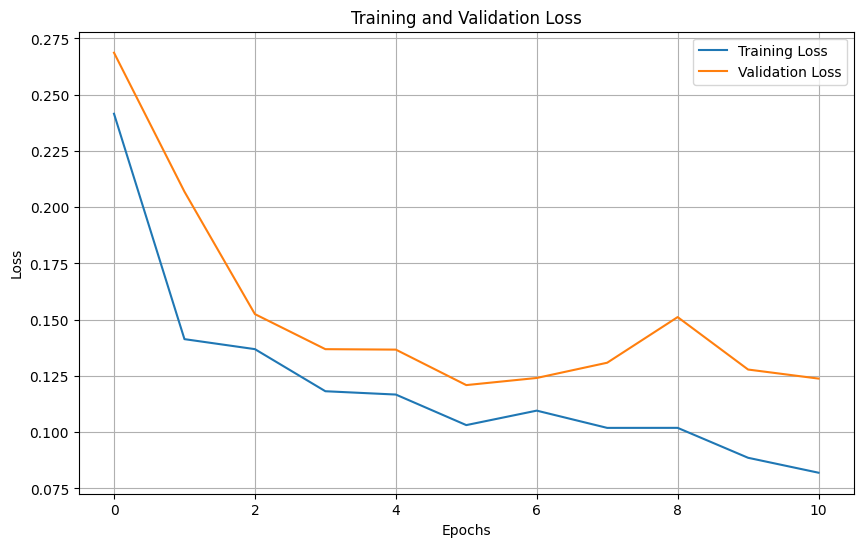

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 =ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level1_ResNet50V2.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Level1_ResNet50V2 Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[223   2]
 [ 18 159]]
              precision    recall  f1-score   support

       clear     0.9253    0.9911    0.9571       225
      cloudy     0.9876    0.8983    0.9408       177

    accuracy                         0.9502       402
   macro avg     0.9564    0.9447    0.9490       402
weighted avg     0.9527    0.9502    0.9499       402



### MobileNetV2

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 45s 408ms/step - accuracy: 0.8209 - loss: 0.3842 - val_accuracy: 0.7332 - val_loss: 0.4915 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9309 - loss: 0.1705 - val_accuracy: 0.6325 - val_loss: 0.5989 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9569 - loss: 0.1109 - val_accuracy: 0.6201 - val_loss: 0.6962 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9534 - loss: 0.1124 - val_accuracy: 0.5830 - val_loss: 1.1858 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9710 - loss: 0.0844 - val_accuracy: 0.6219 - val_loss: 0.7282 - learning_rate: 1.0000e-05
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9838 - loss: 0.0576 - val_accuracy: 0.6502 - val_loss: 0.7002 - learning_rate: 1.0000e-05
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step
Level1_MobileNetV2 Accuracy

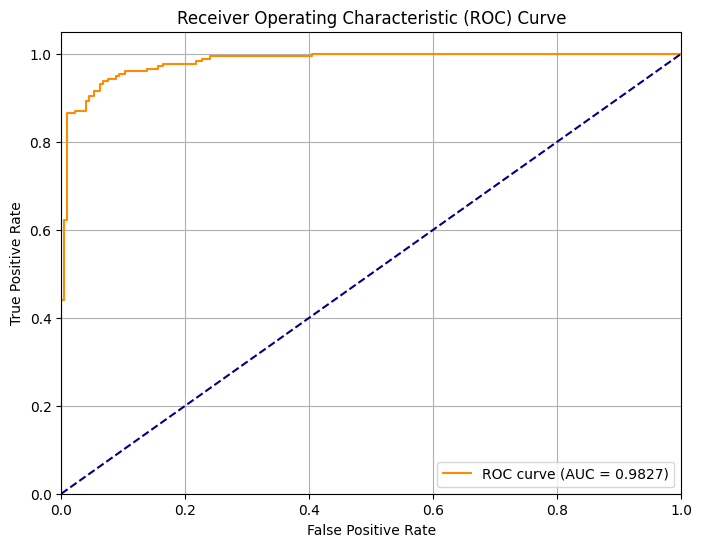

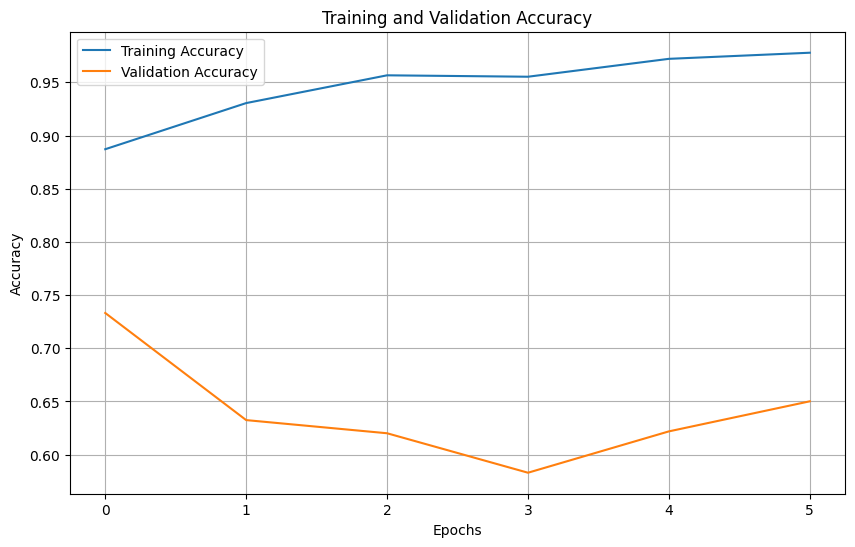

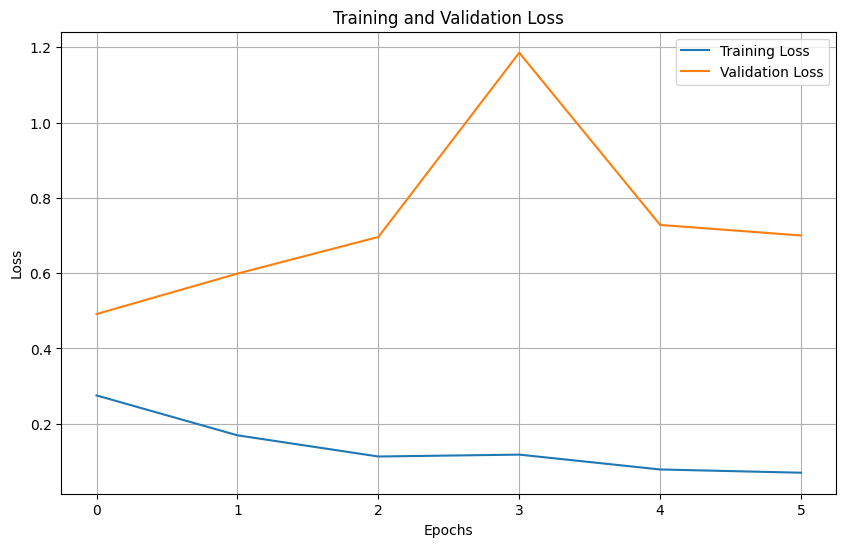

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level1_MobileNetV2.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Level1_MobileNetV2 Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[224   1]
 [ 84  93]]
              precision    recall  f1-score   support

       clear     0.7273    0.9956    0.8405       225
      cloudy     0.9894    0.5254    0.6863       177

    accuracy                         0.7886       402
   macro avg     0.8583    0.7605    0.7634       402
weighted avg     0.8427    0.7886    0.7726       402



### NasNetMobile

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 83s 629ms/step - accuracy: 0.7302 - loss: 1.1186 - val_accuracy: 0.7880 - val_loss: 1.2247 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9004 - loss: 0.2844 - val_accuracy: 0.8110 - val_loss: 1.1860 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9042 - loss: 0.2660 - val_accuracy: 0.8057 - val_loss: 1.2622 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9427 - loss: 0.1852 - val_accuracy: 0.8110 - val_loss: 1.2341 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9335 - loss: 0.1913 - val_accuracy: 0.8163 - val_loss: 1.1768 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9460 - loss: 0.1527 - val_accuracy: 0.8392 - val_loss: 0.8848 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.934

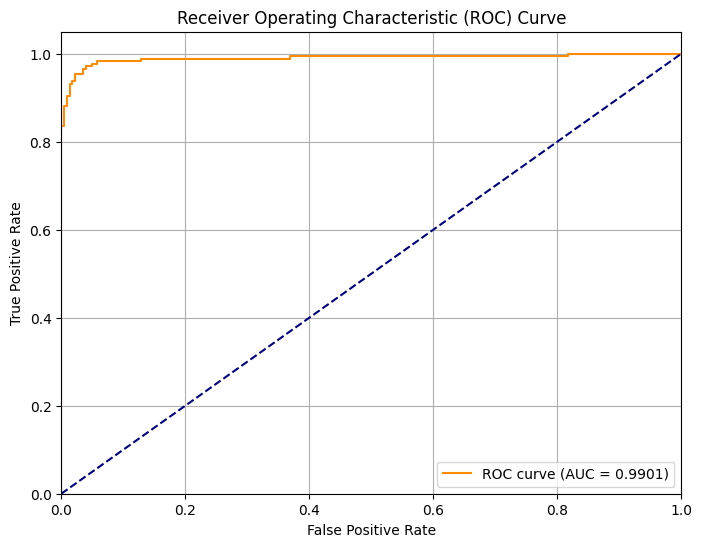

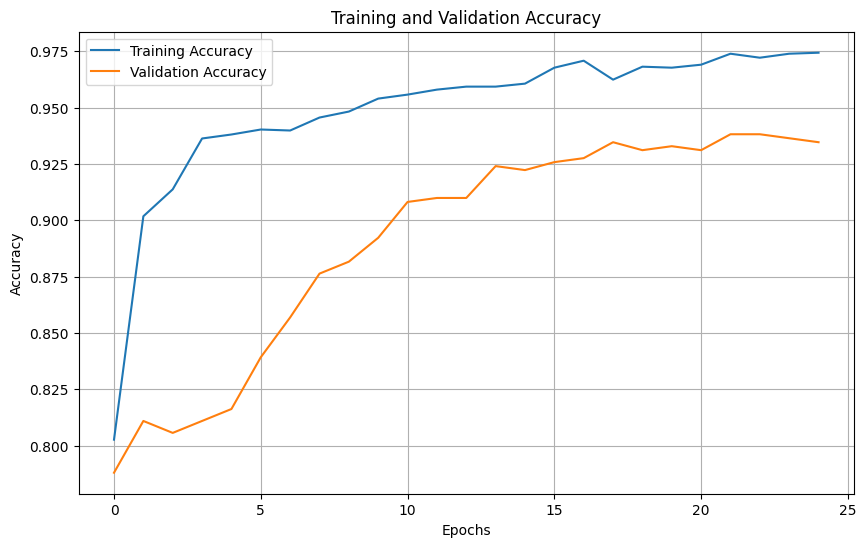

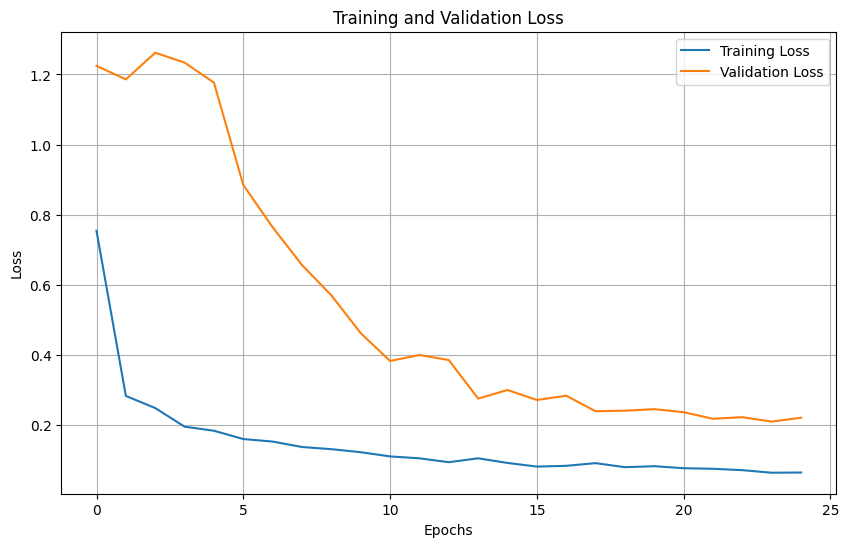

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, NASNetMobile
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level1_NasNetMobile.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Level1_NasNetMobile Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[222   3]
 [ 14 163]]
              precision    recall  f1-score   support

       clear     0.9407    0.9867    0.9631       225
      cloudy     0.9819    0.9209    0.9504       177

    accuracy                         0.9577       402
   macro avg     0.9613    0.9538    0.9568       402
weighted avg     0.9588    0.9577    0.9575       402



### VGG16

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 27s 293ms/step - accuracy: 0.8857 - loss: 0.3168 - val_accuracy: 0.9329 - val_loss: 0.1687 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9485 - loss: 0.1461 - val_accuracy: 0.9488 - val_loss: 0.1568 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9588 - loss: 0.1243 - val_accuracy: 0.9223 - val_loss: 0.2021 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9514 - loss: 0.1405 - val_accuracy: 0.9258 - val_loss: 0.1835 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9458 - loss: 0.1489 - val_accuracy: 0.9470 - val_loss: 0.1539 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9643 - loss: 0.1139 - val_accuracy: 0.9470 - val_loss: 0.1520 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.971

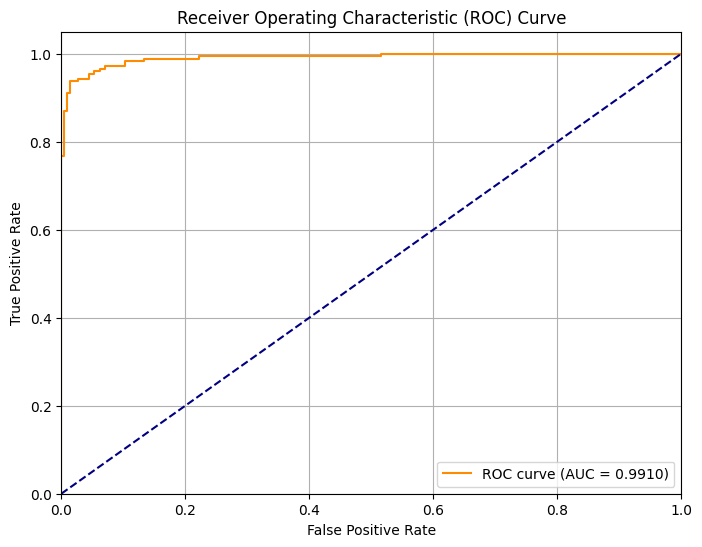

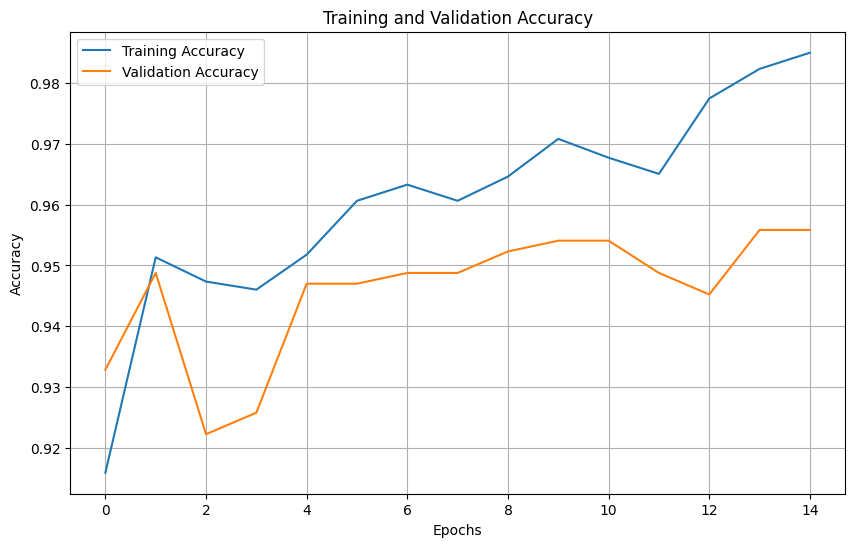

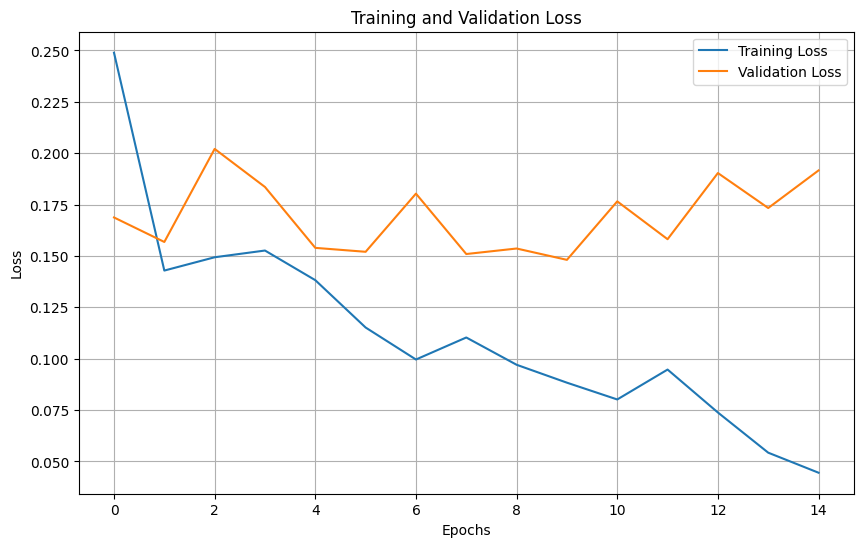

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level1_VGG16.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Level1_VGG16 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[223   2]
 [ 22 155]]
              precision    recall  f1-score   support

       clear     0.9102    0.9911    0.9489       225
      cloudy     0.9873    0.8757    0.9281       177

    accuracy                         0.9403       402
   macro avg     0.9487    0.9334    0.9385       402
weighted avg     0.9441    0.9403    0.9398       402



### VGG19

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.8381 - loss: 0.4188 - val_accuracy: 0.9258 - val_loss: 0.2710 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9363 - loss: 0.1876 - val_accuracy: 0.9152 - val_loss: 0.2481 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9362 - loss: 0.1624 - val_accuracy: 0.9523 - val_loss: 0.1516 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9548 - loss: 0.1463 - val_accuracy: 0.9311 - val_loss: 0.1756 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9470 - loss: 0.1389 - val_accuracy: 0.9558 - val_loss: 0.1365 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9568 - loss: 0.1220 - val_accuracy: 0.9399 - val_loss: 0.1634 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.966

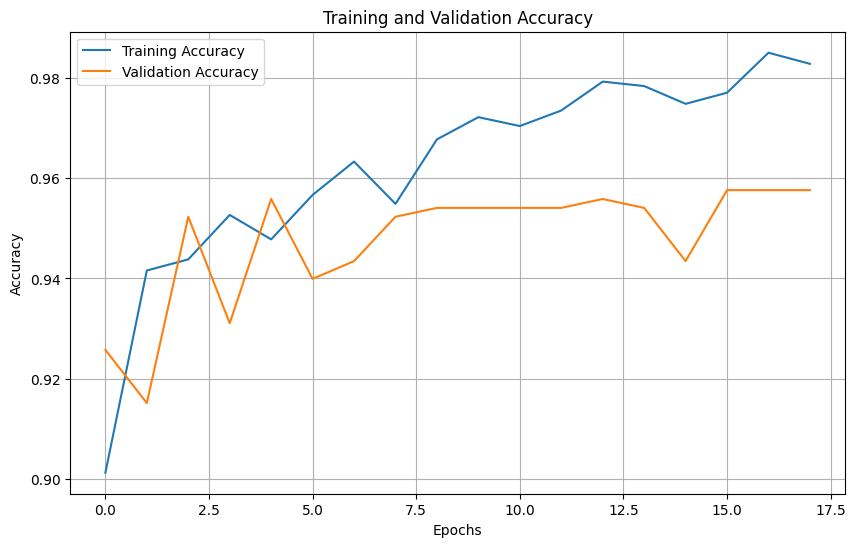

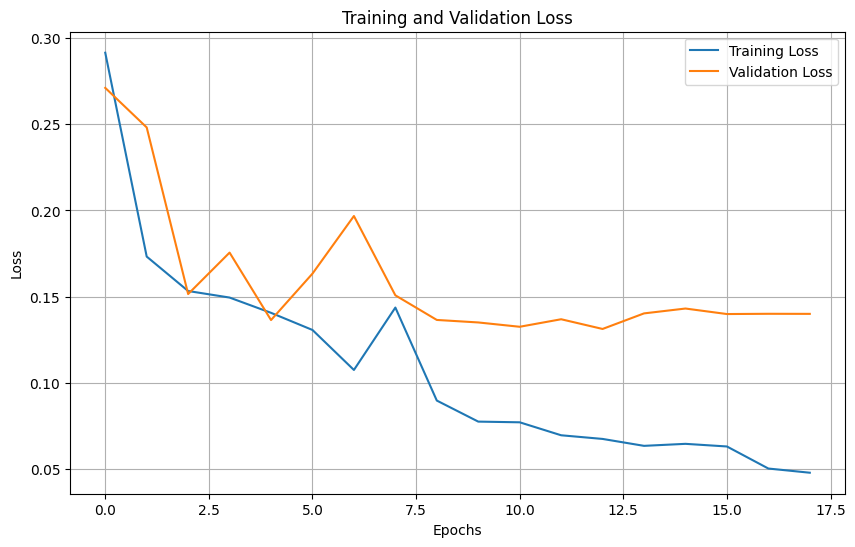

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level1_VGG19.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Level1_VGG19 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[221   4]
 [ 14 163]]
              precision    recall  f1-score   support

       clear     0.9404    0.9822    0.9609       225
      cloudy     0.9760    0.9209    0.9477       177

    accuracy                         0.9552       402
   macro avg     0.9582    0.9516    0.9543       402
weighted avg     0.9561    0.9552    0.9551       402



### EfficientNetB0

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 65s 541ms/step - accuracy: 0.8604 - loss: 0.3864 - val_accuracy: 0.8958 - val_loss: 0.3125 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9576 - loss: 0.1203 - val_accuracy: 0.9223 - val_loss: 0.2123 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9648 - loss: 0.0997 - val_accuracy: 0.9364 - val_loss: 0.1708 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9605 - loss: 0.0957 - val_accuracy: 0.9417 - val_loss: 0.1572 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9765 - loss: 0.0672 - val_accuracy: 0.9488 - val_loss: 0.1321 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9746 - loss: 0.0687 - val_accuracy: 0.9505 - val_loss: 0.1455 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.982

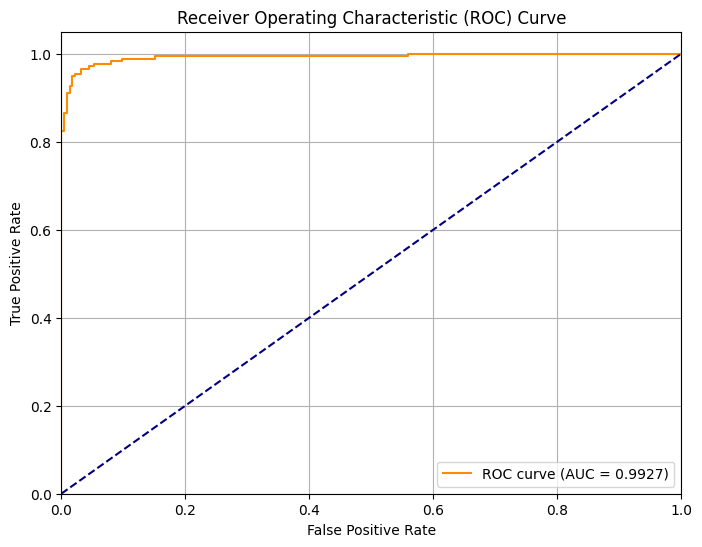

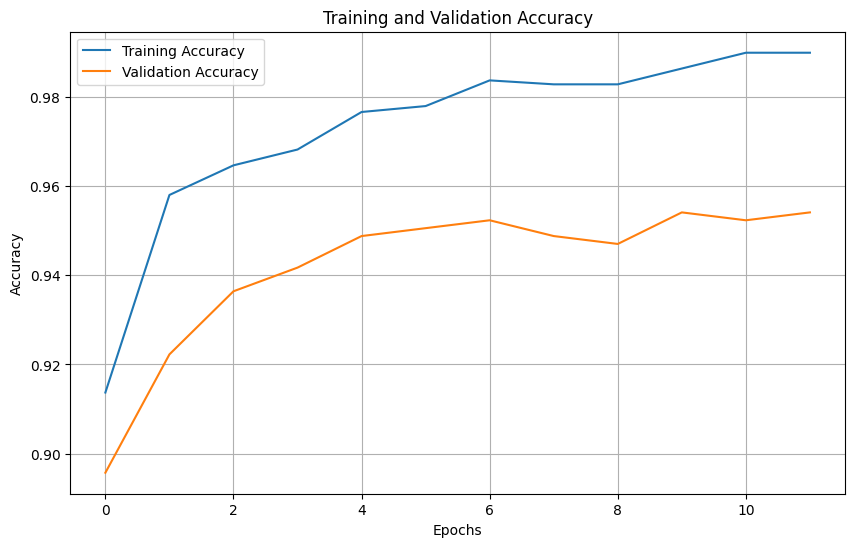

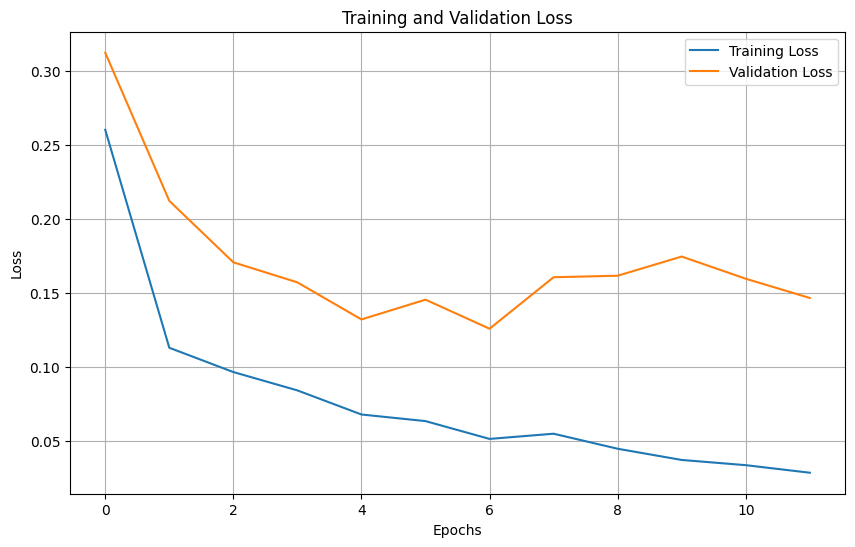

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level1_EfficeintNetB0.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Level1_EfficeintNetB0 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[221   4]
 [ 10 167]]
              precision    recall  f1-score   support

       clear     0.9567    0.9822    0.9693       225
      cloudy     0.9766    0.9435    0.9598       177

    accuracy                         0.9652       402
   macro avg     0.9667    0.9629    0.9645       402
weighted avg     0.9655    0.9652    0.9651       402



### EfficientNetV2B0

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 60s 415ms/step - accuracy: 0.8255 - loss: 0.4366 - val_accuracy: 0.9311 - val_loss: 0.1631 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9532 - loss: 0.1417 - val_accuracy: 0.9382 - val_loss: 0.1471 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9550 - loss: 0.1203 - val_accuracy: 0.9435 - val_loss: 0.1435 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9675 - loss: 0.0902 - val_accuracy: 0.9452 - val_loss: 0.1362 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9631 - loss: 0.0910 - val_accuracy: 0.9488 - val_loss: 0.1390 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9774 - loss: 0.0695 - val_accuracy: 0.9505 - val_loss: 0.1319 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.972

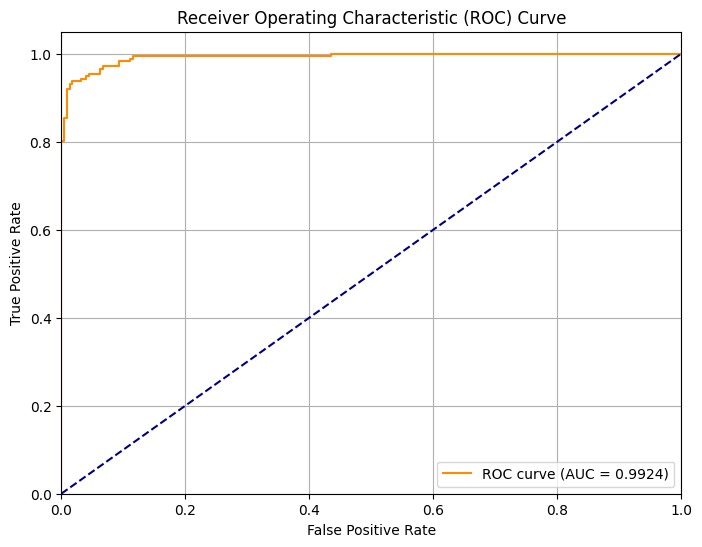

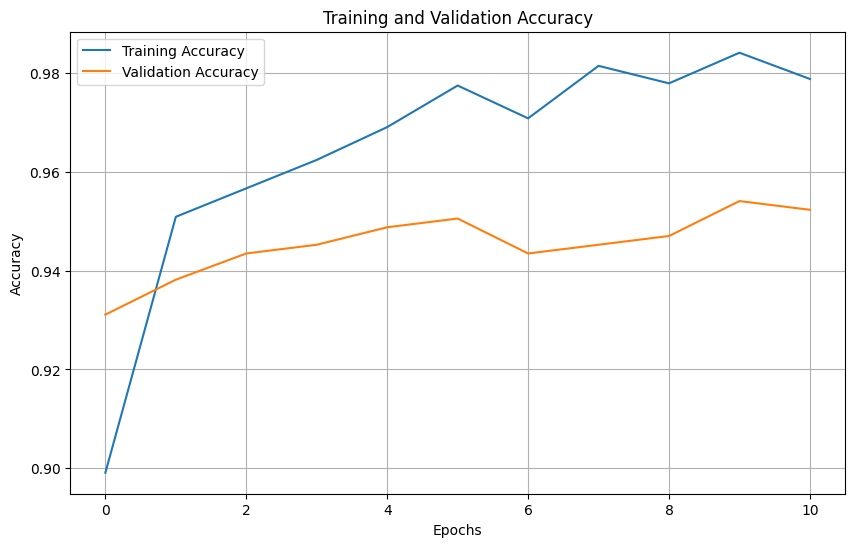

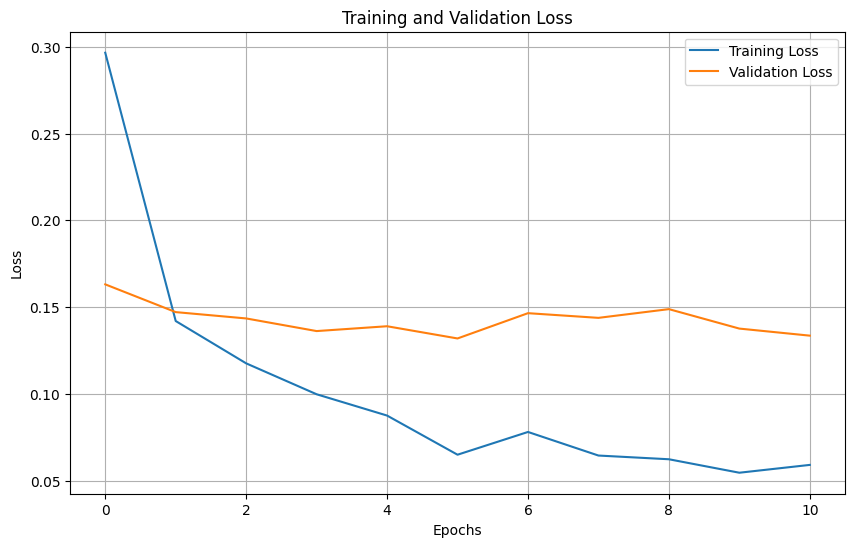

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, EfficientNetV2B0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level1_EfficeintNetV2B0.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Level1_EfficeintNetV2B0 Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[218   7]
 [ 11 166]]
              precision    recall  f1-score   support

       clear     0.9520    0.9689    0.9604       225
      cloudy     0.9595    0.9379    0.9486       177

    accuracy                         0.9552       402
   macro avg     0.9558    0.9534    0.9545       402
weighted avg     0.9553    0.9552    0.9552       402



### InceptionV3

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 310ms/step - accuracy: 0.8617 - loss: 0.2982 - val_accuracy: 0.9311 - val_loss: 0.1789 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9406 - loss: 0.1516 - val_accuracy: 0.9470 - val_loss: 0.1435 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9535 - loss: 0.1218 - val_accuracy: 0.9364 - val_loss: 0.1701 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9568 - loss: 0.1140 - val_accuracy: 0.9346 - val_loss: 0.1689 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9657 - loss: 0.1076 - val_accuracy: 0.9452 - val_loss: 0.1385 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9670 - loss: 0.0976 - val_accuracy: 0.9470 - val_loss: 0.1458 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.978

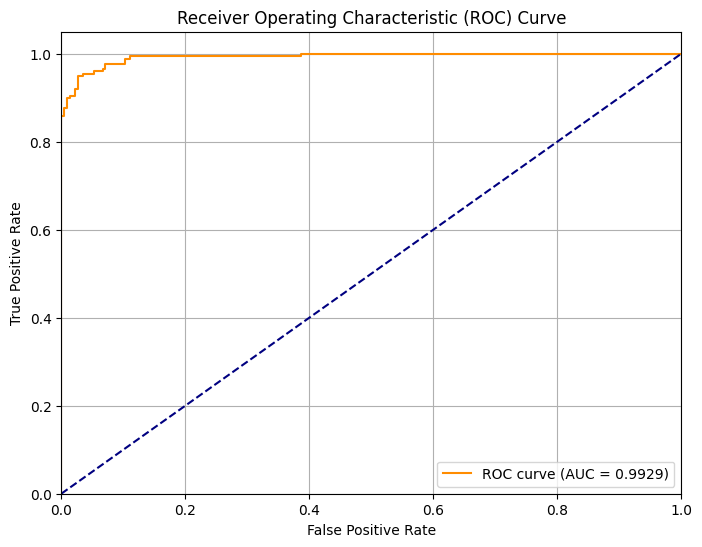

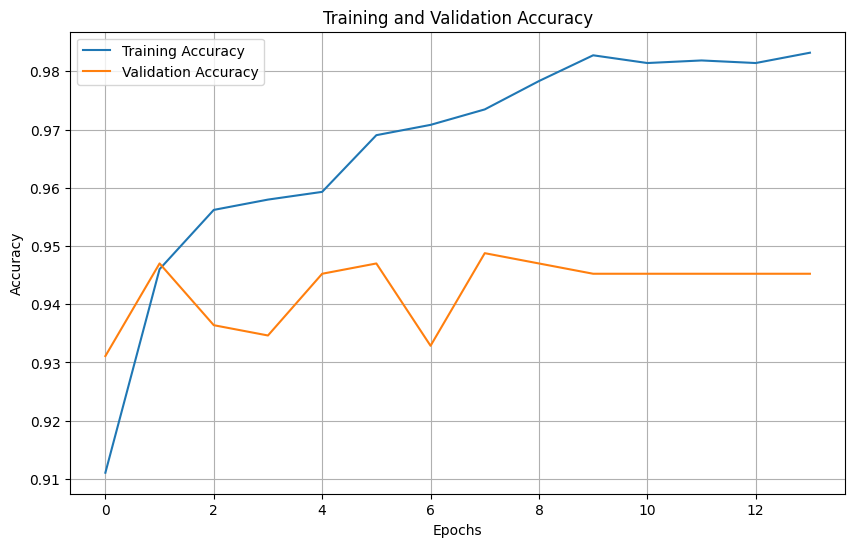

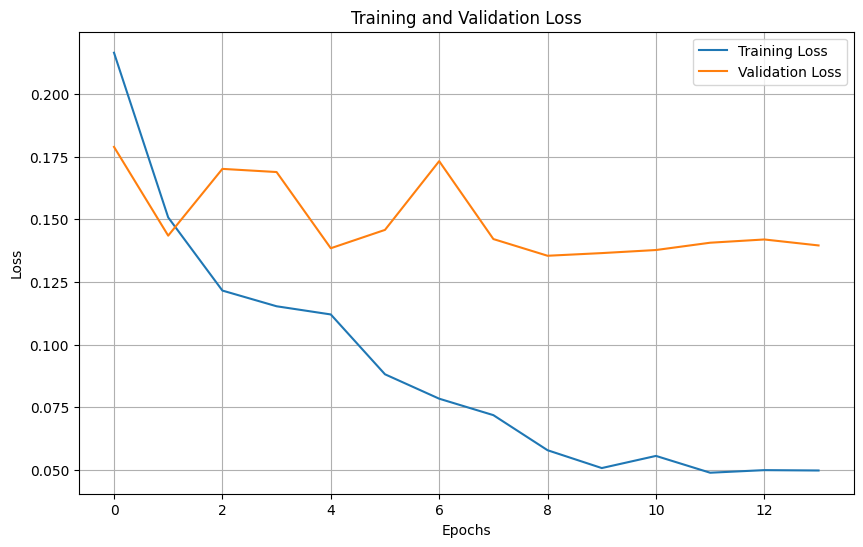

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level1_InceptionV3.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Level1_InceptionV3 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[222   3]
 [ 18 159]]
              precision    recall  f1-score   support

       clear     0.9250    0.9867    0.9548       225
      cloudy     0.9815    0.8983    0.9381       177

    accuracy                         0.9478       402
   macro avg     0.9532    0.9425    0.9464       402
weighted avg     0.9499    0.9478    0.9474       402



### InceptionResNetV2

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 72s 534ms/step - accuracy: 0.8522 - loss: 0.3561 - val_accuracy: 0.8746 - val_loss: 0.2986 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8935 - loss: 0.2773 - val_accuracy: 0.8763 - val_loss: 0.2867 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9092 - loss: 0.2519 - val_accuracy: 0.8799 - val_loss: 0.2841 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9113 - loss: 0.2396 - val_accuracy: 0.8746 - val_loss: 0.2777 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9122 - loss: 0.2327 - val_accuracy: 0.8816 - val_loss: 0.2677 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9215 - loss: 0.2090 - val_accuracy: 0.8922 - val_loss: 0.2592 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.921

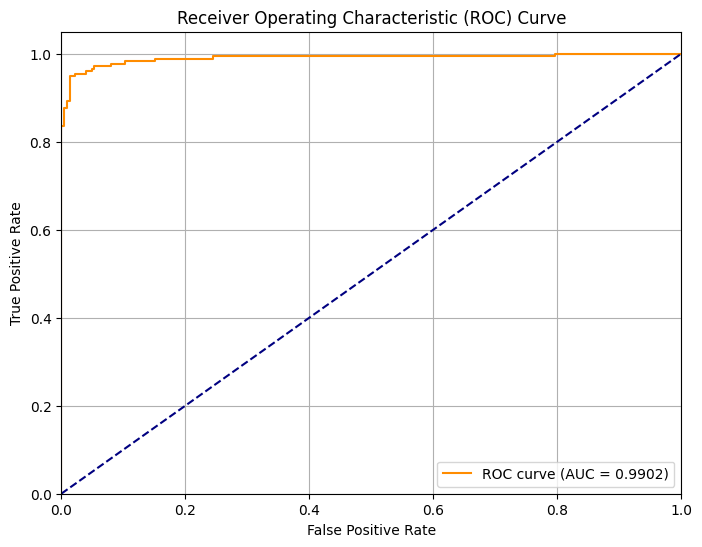

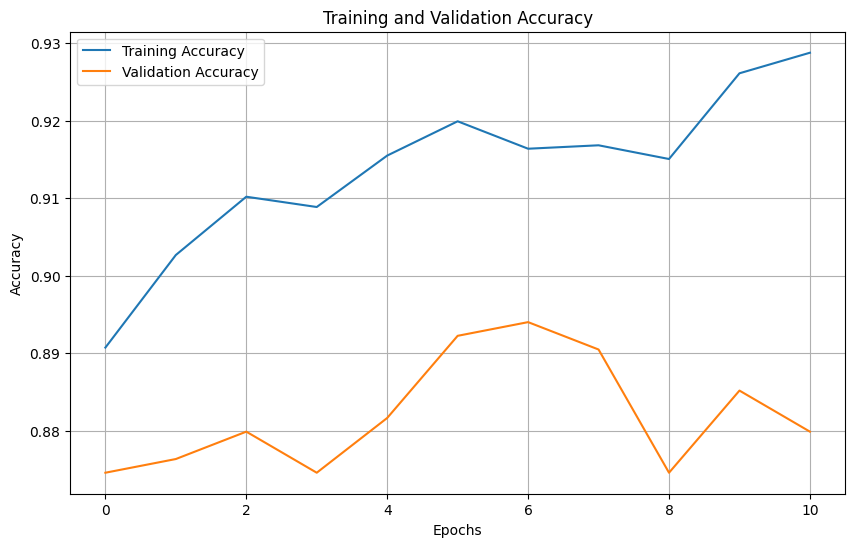

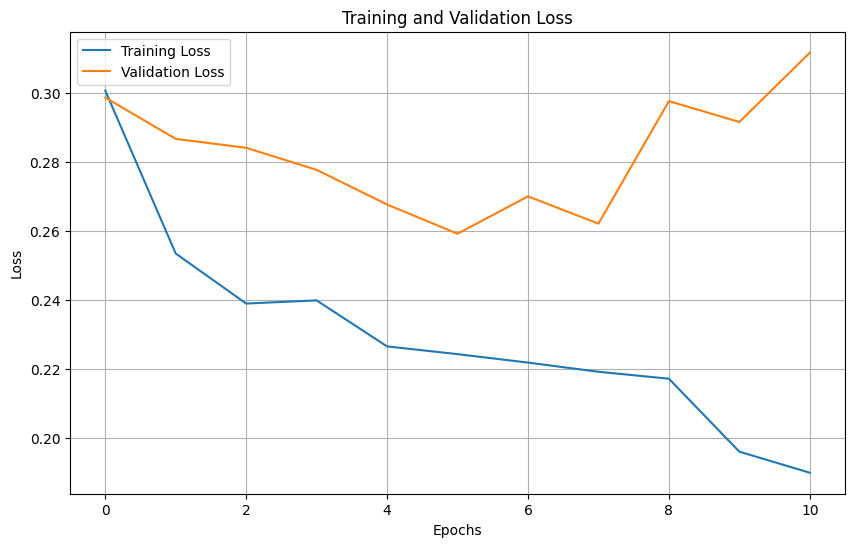

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level1_InceptionResNetV2.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Level1_InceptionResNetV2 Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[223   2]
 [ 21 156]]
              precision    recall  f1-score   support

       clear     0.9139    0.9911    0.9510       225
      cloudy     0.9873    0.8814    0.9313       177

    accuracy                         0.9428       402
   macro avg     0.9506    0.9362    0.9412       402
weighted avg     0.9463    0.9428    0.9423       402



## Level 2

### Preparing Dataset

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Concatenate, Dense, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.applications.xception import Xception, preprocess_input as preprocess_input_xception
from keras.applications.densenet import DenseNet121, preprocess_input as preprocess_input_densenet121

In [ ]:
trdataset_dir = "/content/Level2"

def get_dataCategories(dataset_dir):
    import glob

    categories = []
    for folder_name in os.listdir(trdataset_dir):
        if os.path.isdir(os.path.join(trdataset_dir, folder_name)):
            nbr_files = len(
                glob.glob(os.path.join(trdataset_dir, folder_name) + "/*.png")
            )
            categories.append(np.array([folder_name, nbr_files]))

    categories.sort(key=lambda a: a[0])
    cat = np.array(categories)

    return list(cat[:, 0]), list(cat[:, 1])

categories, nbr_files = get_dataCategories(trdataset_dir)

# Create DataFrame
trdf = pd.DataFrame({"categorie": categories, "numbre of files": nbr_files})
print("Train number of categories: ", len(categories))
trdf.head()

Train number of categories:  2


categorie numbre of files
0     Clear            1621
1    Cloudy            1194

In [ ]:
tsdataset_dir = "/content/test"

def get_dataCategories(dataset_dir):
    import glob

    categories = []
    for folder_name in os.listdir(tsdataset_dir):
        if os.path.isdir(os.path.join(tsdataset_dir, folder_name)):
            nbr_files = len(
                glob.glob(os.path.join(tsdataset_dir, folder_name) + "/*.png")
            )
            categories.append(np.array([folder_name, nbr_files]))

    categories.sort(key=lambda a: a[0])
    cat = np.array(categories)

    return list(cat[:, 0]), list(cat[:, 1])

categories, nbr_files = get_dataCategories(tsdataset_dir)

# Create DataFrame
tsdf = pd.DataFrame({"categorie": categories, "numbre of files": nbr_files})
print("Train number of categories: ", len(categories))
tsdf.head()

Train number of categories:  2


categorie numbre of files
0     Clear             225
1    Cloudy             177

In [ ]:
def create_dataset(datadir, categories, img_wid, img_high):
    X, y = [], []
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                ima_resize_rgb = cv2.resize(img_array, (img_wid, img_high))

                X.append(ima_resize_rgb)
                y.append(class_num)

            except Exception as e:
                pass

    y = np.array(y)
    X = np.array(X).reshape(y.shape[0], img_wid, img_wid, 3)
    return X, y

img_wid, img_high = 224, 224
tr_X, tr_y = create_dataset(trdataset_dir, categories, img_wid, img_high)

print(f"train X: {tr_X.shape}")
print(f"train y: {tr_y.shape}")

train X: (2815, 224, 224, 3)
train y: (2815,)


In [ ]:
def create_dataset(datadir, categories, img_wid, img_high):
    X, y = [], []
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                ima_resize_rgb = cv2.resize(img_array, (img_wid, img_high))

                X.append(ima_resize_rgb)
                y.append(class_num)

            except Exception as e:
                pass

    y = np.array(y)
    X = np.array(X).reshape(y.shape[0], img_wid, img_wid, 3)
    return X, y

img_wid, img_high = 224, 224
ts_X, ts_y = create_dataset(tsdataset_dir, categories, img_wid, img_high)

print(f"Test X: {ts_X.shape}")
print(f"Test y: {ts_y.shape}")

Test X: (402, 224, 224, 3)
Test y: (402,)


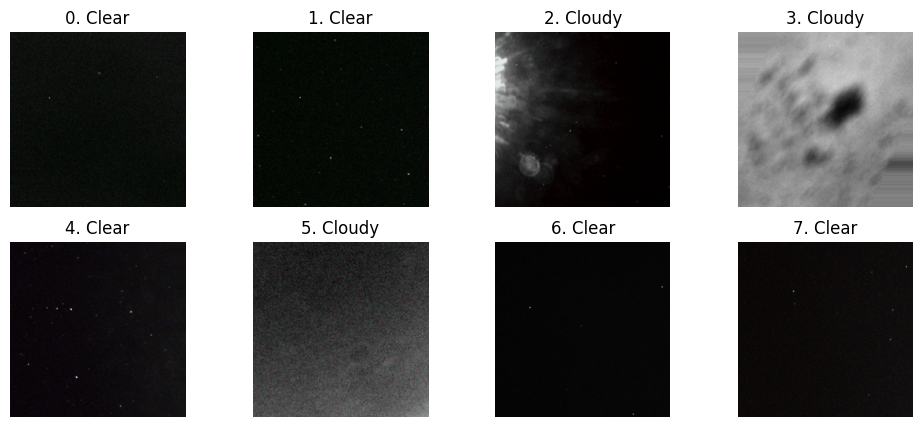

In [ ]:
plt.figure(figsize=(12, 5))
indices = np.random.choice(len(tr_X), 8, replace=False)  # 8 farklı rastgele indeks seç

for i, idx in enumerate(indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(tr_X[idx][:, :, ::-1])
    plt.title(f"{i}. {categories[tr_y[idx]]}")
    plt.axis("off")

plt.show()


In [ ]:
# en convertie y en format scaler
tr_Y = np.reshape(tr_y, (len(tr_y), 1))
ts_Y = np.reshape(ts_y, (len(ts_y), 1))

# split dataset to train and test set
x_train, x_val, y_train, y_val = train_test_split(
    tr_X,tr_Y, train_size=0.8, random_state=42
)
x_test,y_test = ts_X,ts_y
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_val: {x_val.shape}")
print(f"y_val: {y_val.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (2252, 224, 224, 3)
y_train: (2252, 1)
x_val: (563, 224, 224, 3)
y_val: (563, 1)
x_test: (402, 224, 224, 3)
y_test: (402,)


In [ ]:
# Image Data Augmentation
train_generator = ImageDataGenerator(
    horizontal_flip=False
)

val_generator = ImageDataGenerator(
    horizontal_flip=False
)

test_generator = ImageDataGenerator(
    horizontal_flip=False
)

# Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

train_ds = train_generator.flow(x_train, y_train, batch_size= 32)
val_ds = val_generator.flow(x_val, y_val, batch_size=32)
test_ds = test_generator.flow(x_test, y_test, batch_size=32)

### ResNet50

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 37s 246ms/step - accuracy: 0.8932 - loss: 0.2447 - val_accuracy: 0.9449 - val_loss: 0.2089 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9716 - loss: 0.0742 - val_accuracy: 0.9556 - val_loss: 0.1865 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9859 - loss: 0.0422 - val_accuracy: 0.9574 - val_loss: 0.1816 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9942 - loss: 0.0287 - val_accuracy: 0.9378 - val_loss: 0.5728 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9853 - loss: 0.0439 - val_accuracy: 0.9538 - val_loss: 0.2164 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9989 - loss: 0.0118 - val_accuracy: 0.9574 - val_loss: 0.1748 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9965 - loss: 0

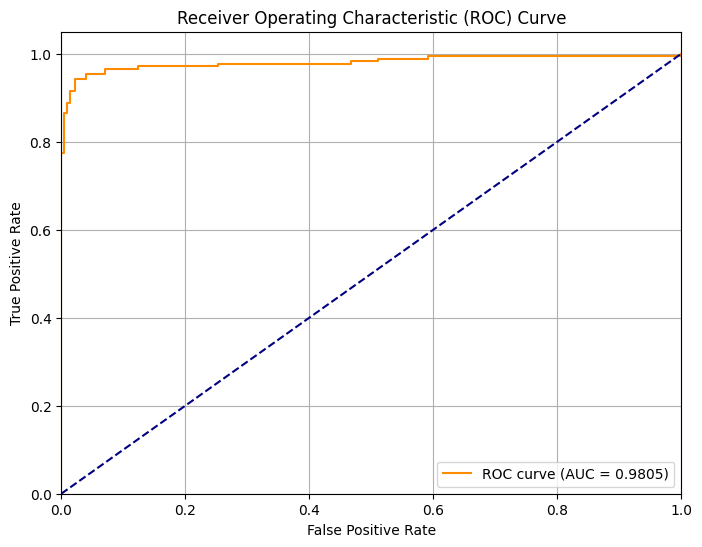

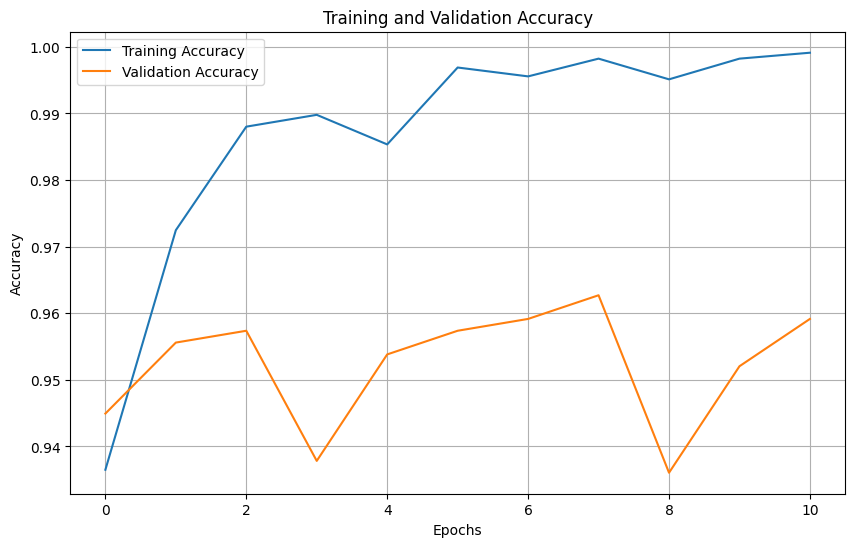

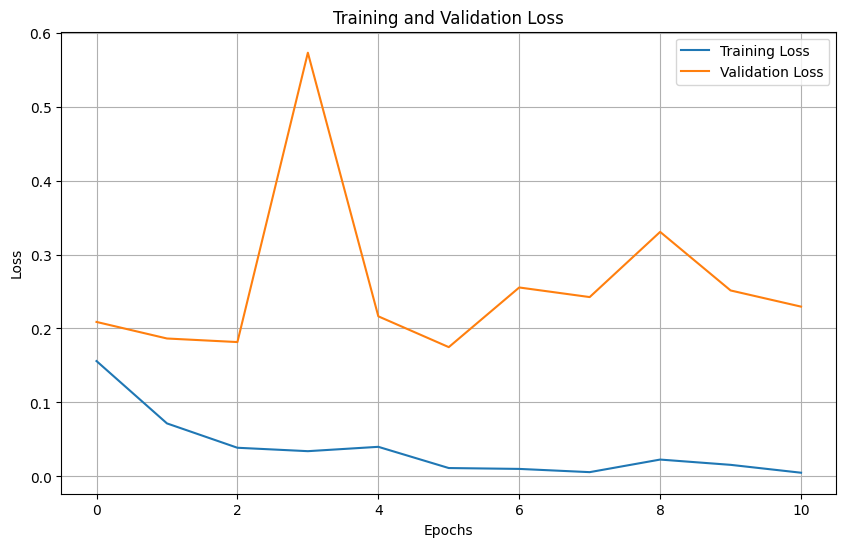

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds

base_model1 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
        layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)

initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)


history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level2_ResNet50.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Test Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[222   3]
 [ 20 157]]
              precision    recall  f1-score   support

       clear     0.9174    0.9867    0.9507       225
      cloudy     0.9812    0.8870    0.9318       177

    accuracy                         0.9428       402
   macro avg     0.9493    0.9368    0.9413       402
weighted avg     0.9455    0.9428    0.9424       402



### Xception

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 38s 316ms/step - accuracy: 0.8266 - loss: 0.4140 - val_accuracy: 0.8544 - val_loss: 0.6704 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9358 - loss: 0.1586 - val_accuracy: 0.9165 - val_loss: 0.2340 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9480 - loss: 0.1534 - val_accuracy: 0.9449 - val_loss: 0.1888 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9408 - loss: 0.1621 - val_accuracy: 0.9449 - val_loss: 0.1872 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9465 - loss: 0.1499 - val_accuracy: 0.9432 - val_loss: 0.1880 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9489 - loss: 0.1302 - val_accuracy: 0.9449 - val_loss: 0.1647 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.951

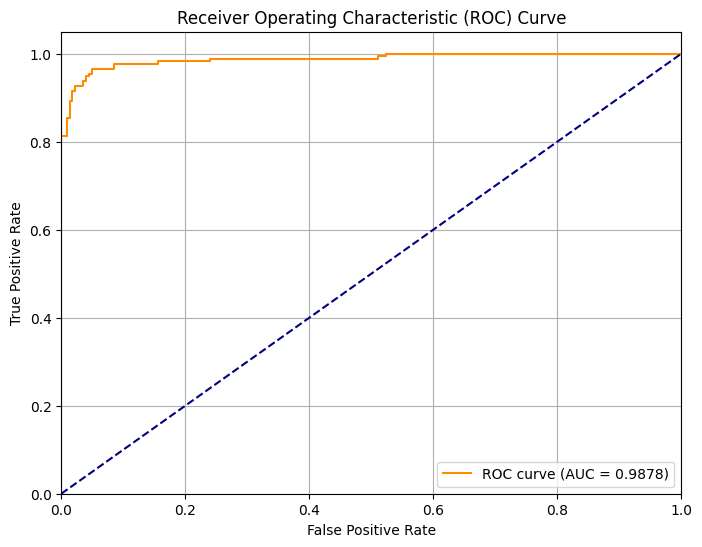

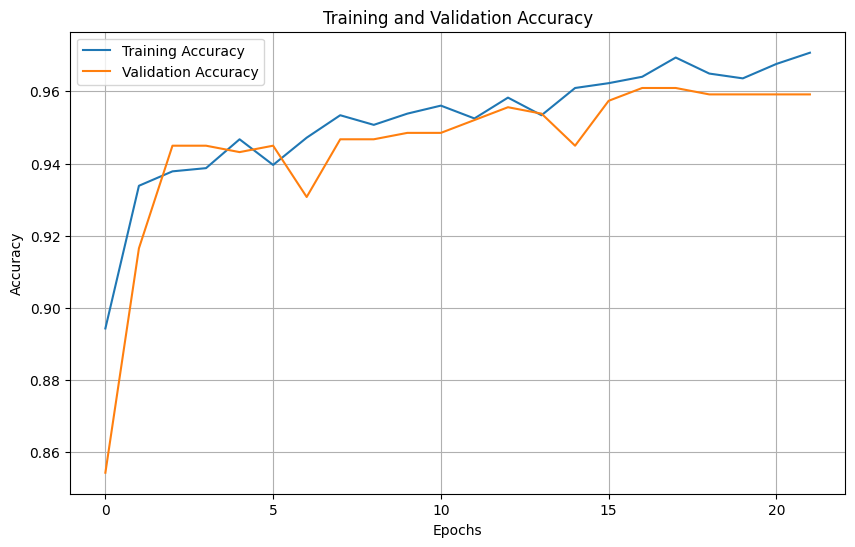

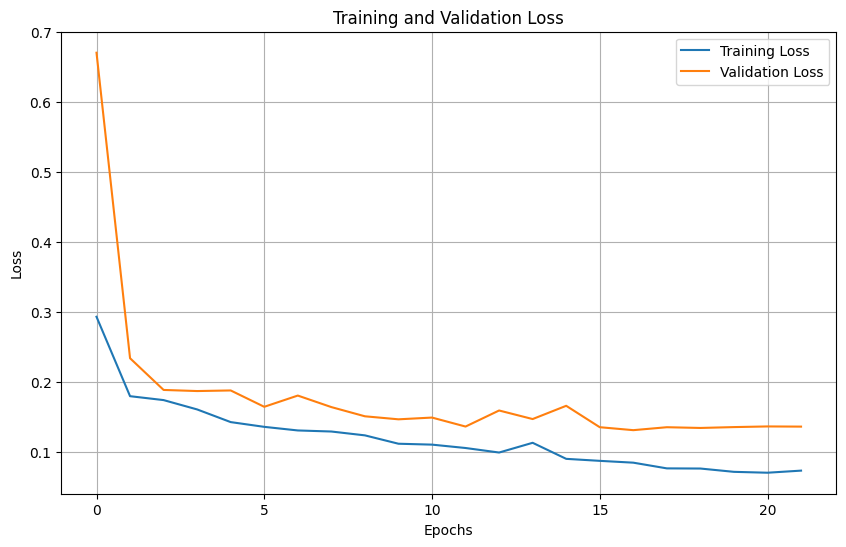

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level2_Xception.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[223   2]
 [ 29 148]]
              precision    recall  f1-score   support

       clear     0.8849    0.9911    0.9350       225
      cloudy     0.9867    0.8362    0.9052       177

    accuracy                         0.9229       402
   macro avg     0.9358    0.9136    0.9201       402
weighted avg     0.9297    0.9229    0.9219       402



### DenseNet121

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 67s 525ms/step - accuracy: 0.8043 - loss: 0.4110 - val_accuracy: 0.9503 - val_loss: 0.1556 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9459 - loss: 0.1591 - val_accuracy: 0.9556 - val_loss: 0.1360 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9530 - loss: 0.1388 - val_accuracy: 0.9627 - val_loss: 0.1271 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9546 - loss: 0.1141 - val_accuracy: 0.9609 - val_loss: 0.1199 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9542 - loss: 0.1171 - val_accuracy: 0.9609 - val_loss: 0.1217 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9657 - loss: 0.0972 - val_accuracy: 0.9591 - val_loss: 0.1144 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.966

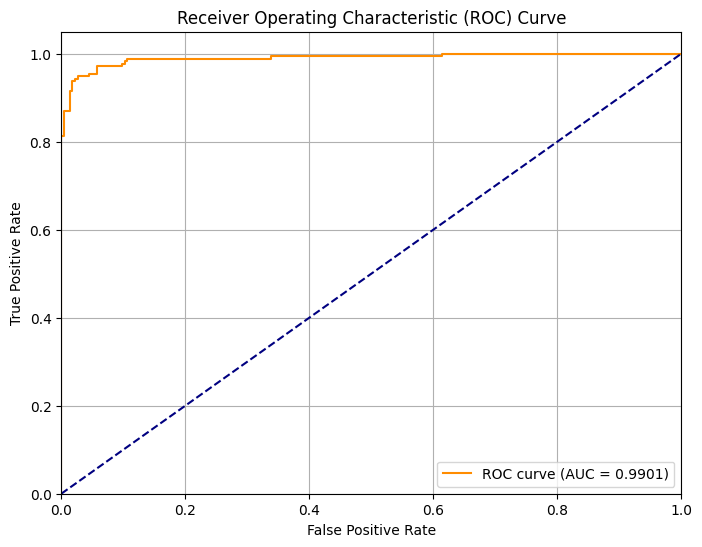

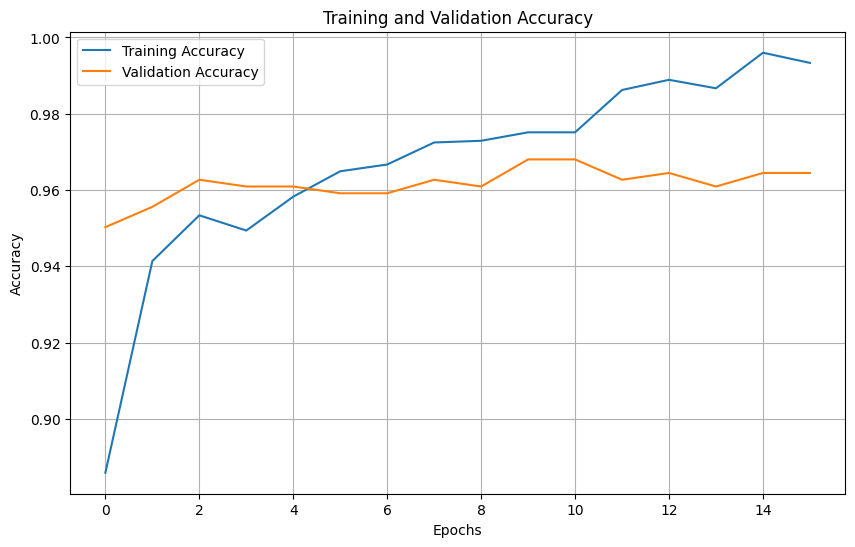

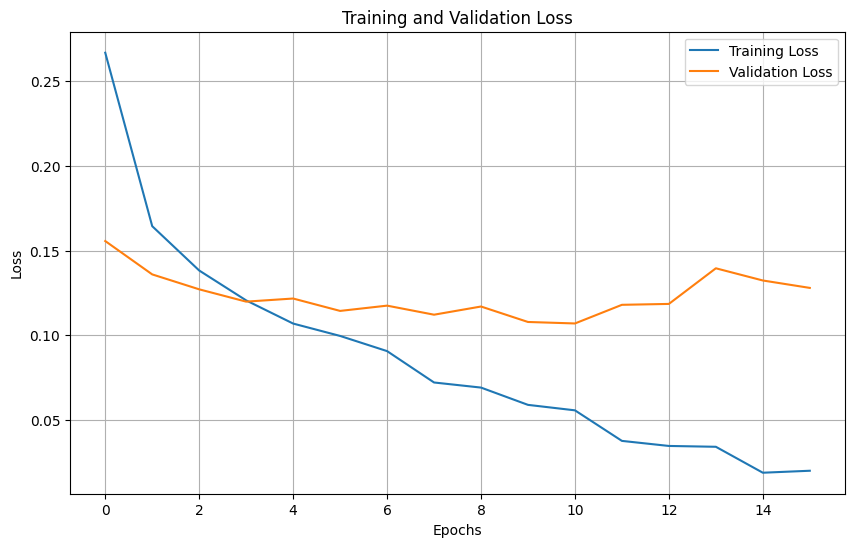

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level2_DenseNet121.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f' Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[221   4]
 [ 13 164]]
              precision    recall  f1-score   support

       clear     0.9444    0.9822    0.9630       225
      cloudy     0.9762    0.9266    0.9507       177

    accuracy                         0.9577       402
   macro avg     0.9603    0.9544    0.9568       402
weighted avg     0.9584    0.9577    0.9576       402



### ResNet50V2

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 32s 212ms/step - accuracy: 0.8742 - loss: 0.3630 - val_accuracy: 0.9147 - val_loss: 0.2524 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9419 - loss: 0.1463 - val_accuracy: 0.8970 - val_loss: 0.2934 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9410 - loss: 0.1418 - val_accuracy: 0.9485 - val_loss: 0.2002 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9496 - loss: 0.1244 - val_accuracy: 0.9556 - val_loss: 0.1599 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9481 - loss: 0.1379 - val_accuracy: 0.9538 - val_loss: 0.1636 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9582 - loss: 0.1178 - val_accuracy: 0.9574 - val_loss: 0.1434 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.945

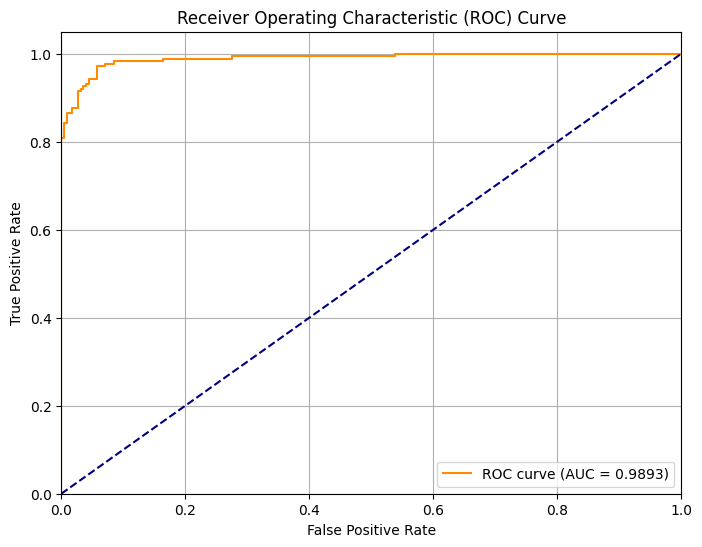

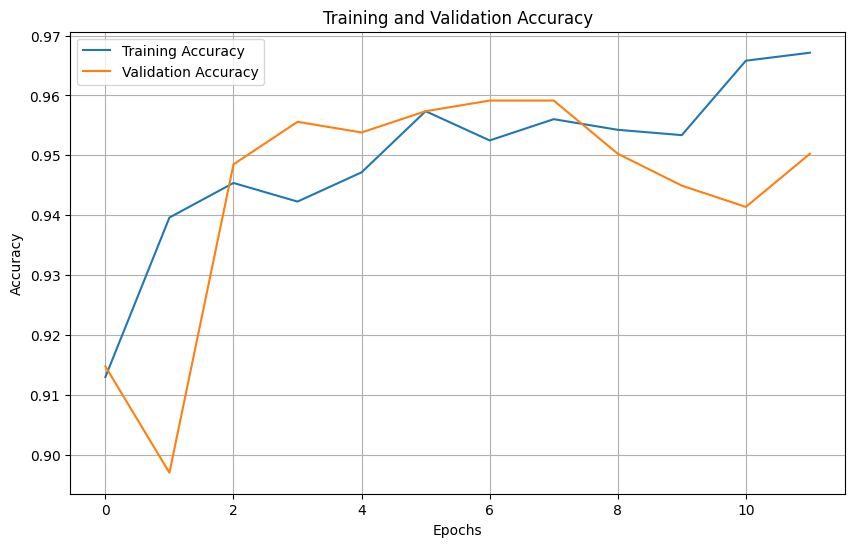

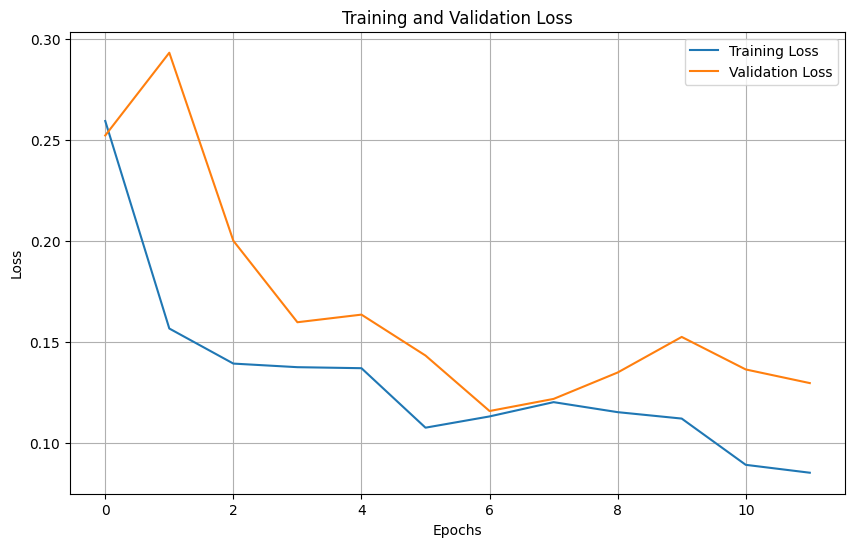

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 =ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level2_ResNet50V2.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[221   4]
 [ 24 153]]
              precision    recall  f1-score   support

       clear     0.9020    0.9822    0.9404       225
      cloudy     0.9745    0.8644    0.9162       177

    accuracy                         0.9303       402
   macro avg     0.9383    0.9233    0.9283       402
weighted avg     0.9340    0.9303    0.9297       402



### MobileNetV2

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 35s 269ms/step - accuracy: 0.7968 - loss: 0.4318 - val_accuracy: 0.5471 - val_loss: 0.6727 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8964 - loss: 0.2279 - val_accuracy: 0.6554 - val_loss: 0.5888 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9360 - loss: 0.1551 - val_accuracy: 0.7140 - val_loss: 0.5136 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9355 - loss: 0.1441 - val_accuracy: 0.7034 - val_loss: 0.4996 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9639 - loss: 0.0972 - val_accuracy: 0.6199 - val_loss: 0.6215 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9633 - loss: 0.0879 - val_accuracy: 0.7442 - val_loss: 0.4411 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.980

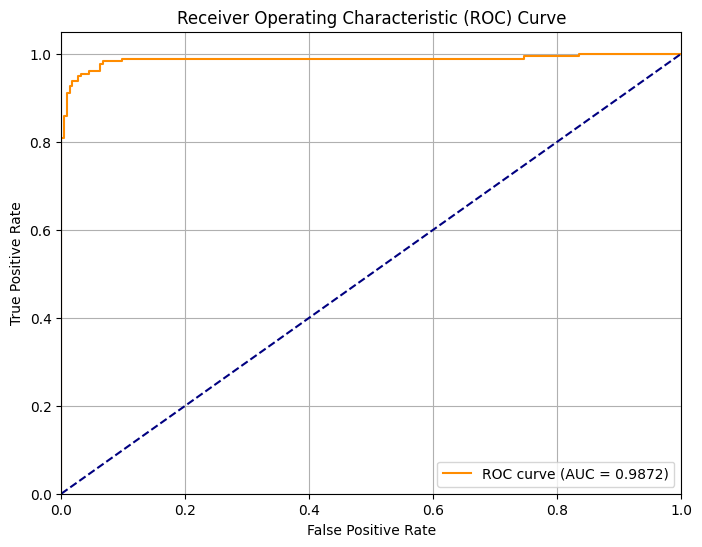

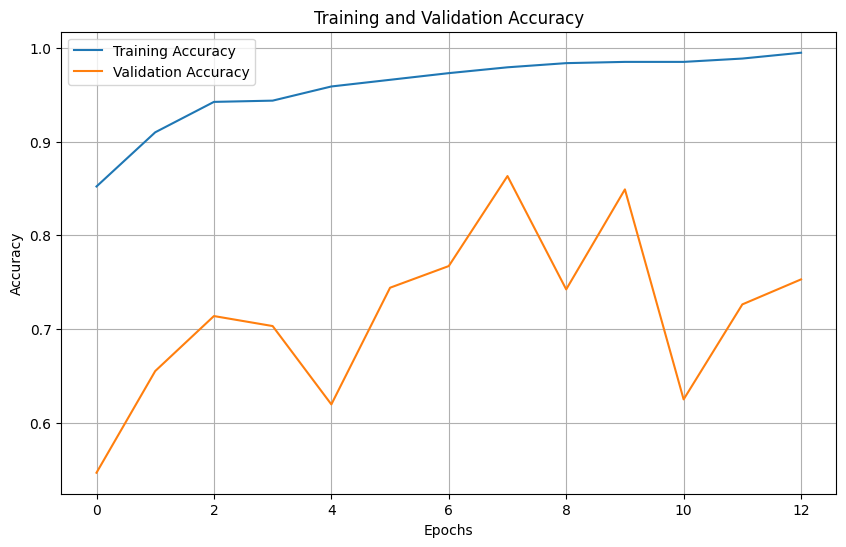

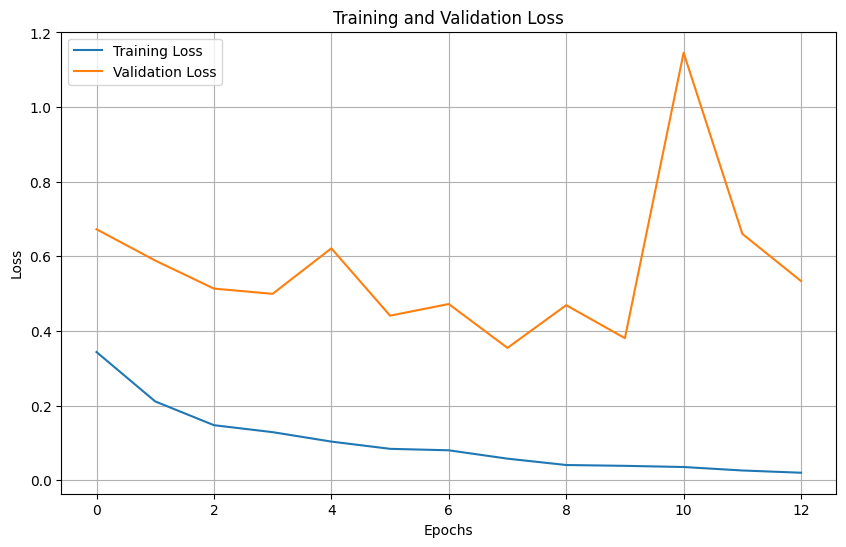

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level2_MobileNetV2.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f' Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[222   3]
 [ 16 161]]
              precision    recall  f1-score   support

       clear     0.9328    0.9867    0.9590       225
      cloudy     0.9817    0.9096    0.9443       177

    accuracy                         0.9527       402
   macro avg     0.9572    0.9481    0.9516       402
weighted avg     0.9543    0.9527    0.9525       402



### NasNetMobile

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 75s 544ms/step - accuracy: 0.6956 - loss: 0.7564 - val_accuracy: 0.8330 - val_loss: 0.5036 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8816 - loss: 0.3330 - val_accuracy: 0.8579 - val_loss: 0.5126 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9146 - loss: 0.2455 - val_accuracy: 0.8544 - val_loss: 0.5204 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9228 - loss: 0.2152 - val_accuracy: 0.8544 - val_loss: 0.4548 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9252 - loss: 0.1800 - val_accuracy: 0.8881 - val_loss: 0.3133 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9296 - loss: 0.1710 - val_accuracy: 0.8863 - val_loss: 0.3289 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.946

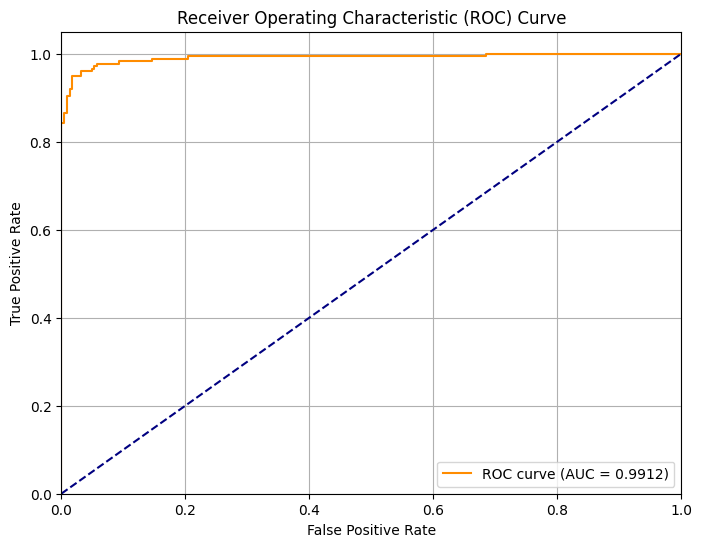

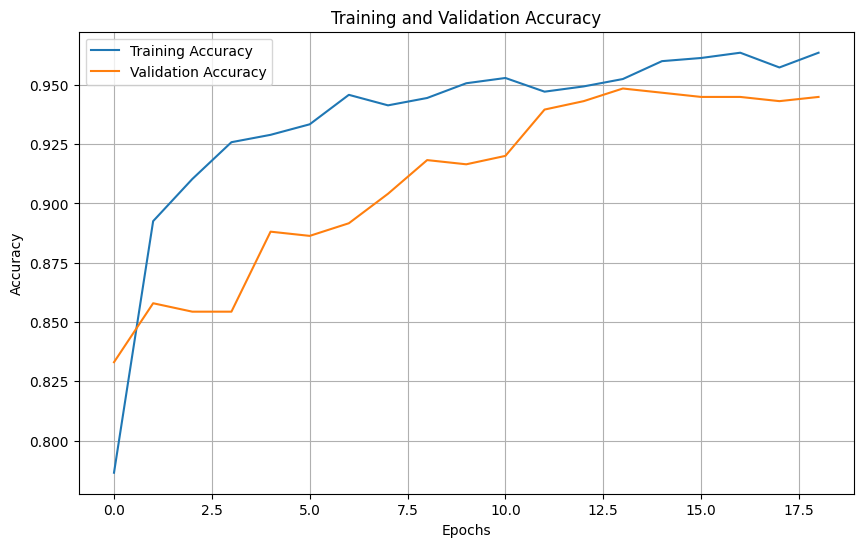

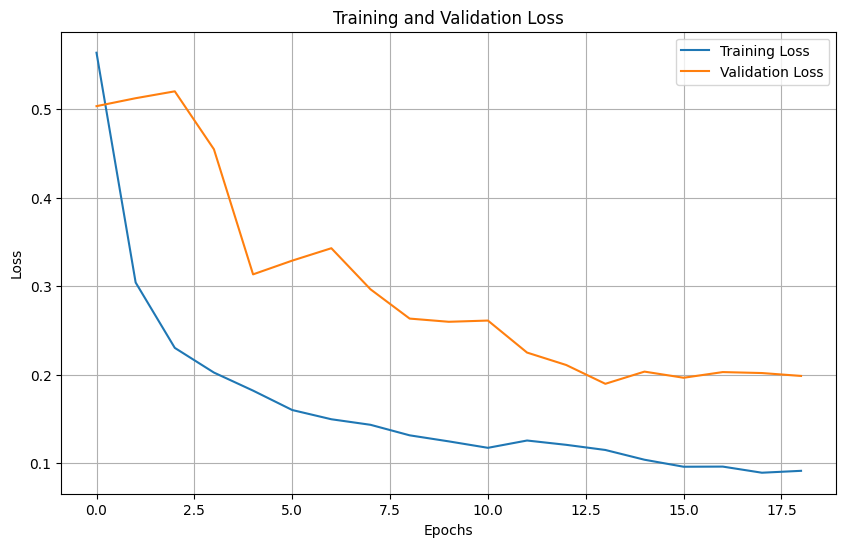

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, NASNetMobile
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level2_NasNetMobile.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f' Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[222   3]
 [ 14 163]]
              precision    recall  f1-score   support

       clear     0.9407    0.9867    0.9631       225
      cloudy     0.9819    0.9209    0.9504       177

    accuracy                         0.9577       402
   macro avg     0.9613    0.9538    0.9568       402
weighted avg     0.9588    0.9577    0.9575       402



### VGG16

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - accuracy: 0.8644 - loss: 0.3652 - val_accuracy: 0.9520 - val_loss: 0.1826 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9362 - loss: 0.1896 - val_accuracy: 0.9467 - val_loss: 0.1599 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9468 - loss: 0.1438 - val_accuracy: 0.9538 - val_loss: 0.1513 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9523 - loss: 0.1394 - val_accuracy: 0.9609 - val_loss: 0.1498 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9343 - loss: 0.1641 - val_accuracy: 0.9449 - val_loss: 0.1770 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9586 - loss: 0.1344 - val_accuracy: 0.9449 - val_loss: 0.1541 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.947

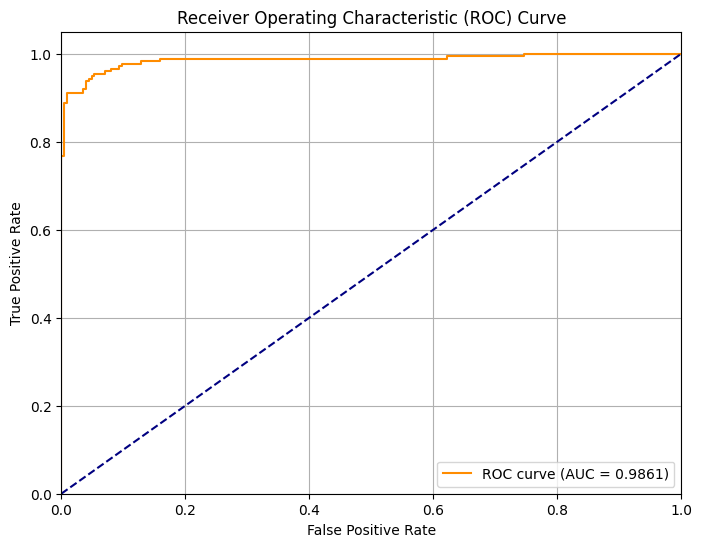

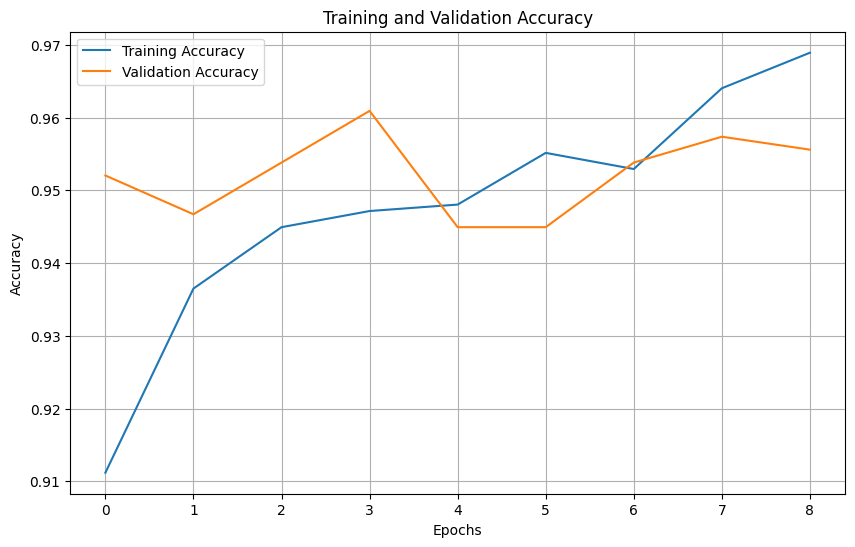

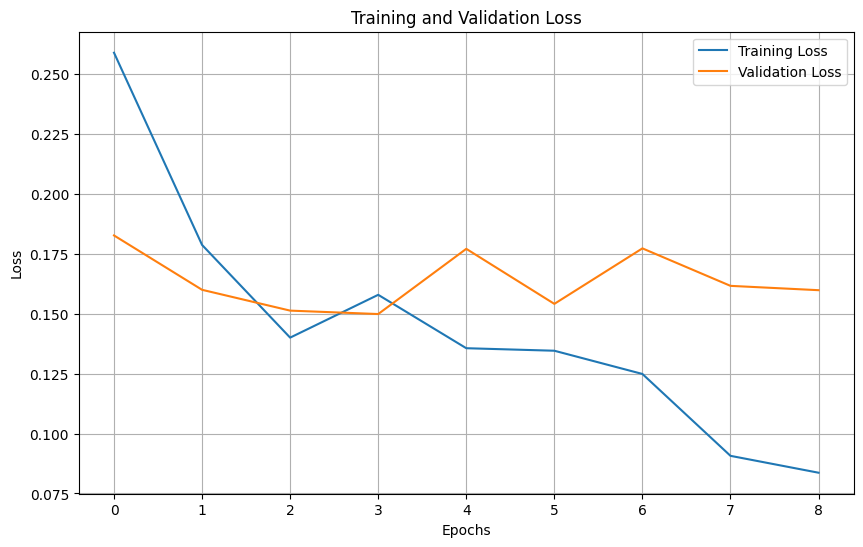

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level2_VGG16.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[220   5]
 [ 16 161]]
              precision    recall  f1-score   support

       clear     0.9322    0.9778    0.9544       225
      cloudy     0.9699    0.9096    0.9388       177

    accuracy                         0.9478       402
   macro avg     0.9510    0.9437    0.9466       402
weighted avg     0.9488    0.9478    0.9475       402



### VGG19

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.8415 - loss: 0.3920 - val_accuracy: 0.9396 - val_loss: 0.2222 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9330 - loss: 0.1980 - val_accuracy: 0.9361 - val_loss: 0.2080 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9245 - loss: 0.1827 - val_accuracy: 0.9325 - val_loss: 0.1799 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9582 - loss: 0.1283 - val_accuracy: 0.9591 - val_loss: 0.1607 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9511 - loss: 0.1525 - val_accuracy: 0.9361 - val_loss: 0.1911 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9453 - loss: 0.1537 - val_accuracy: 0.9538 - val_loss: 0.1484 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.952

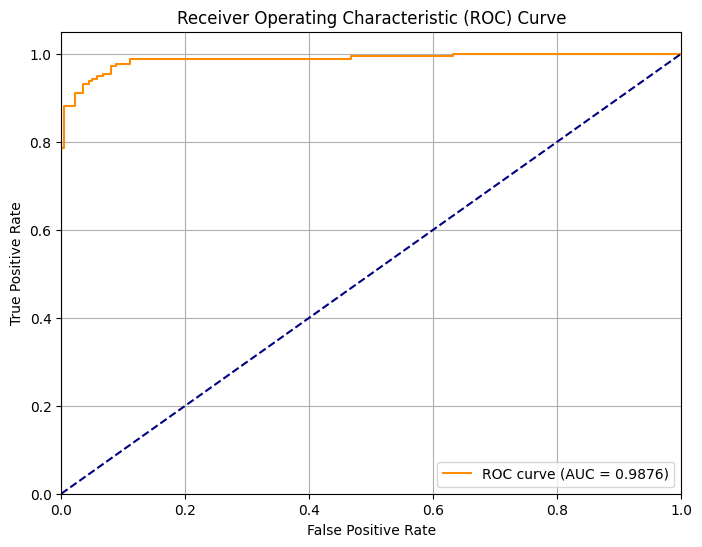

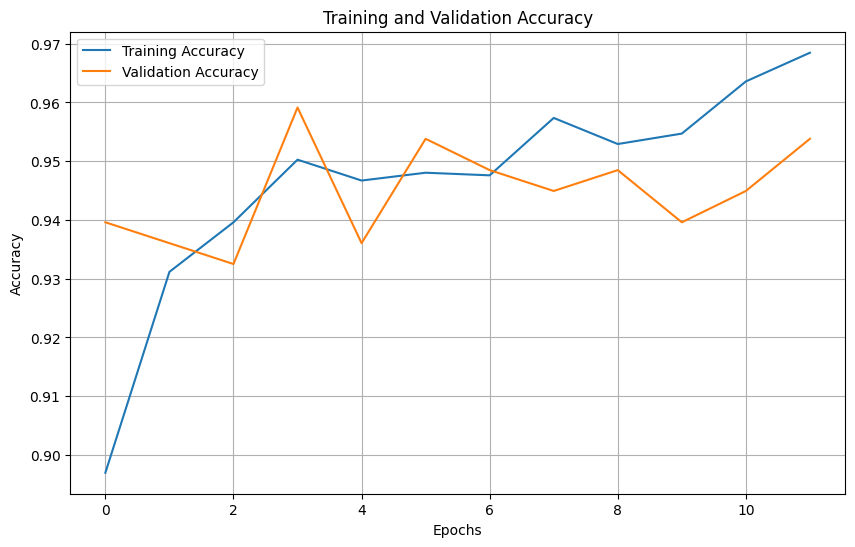

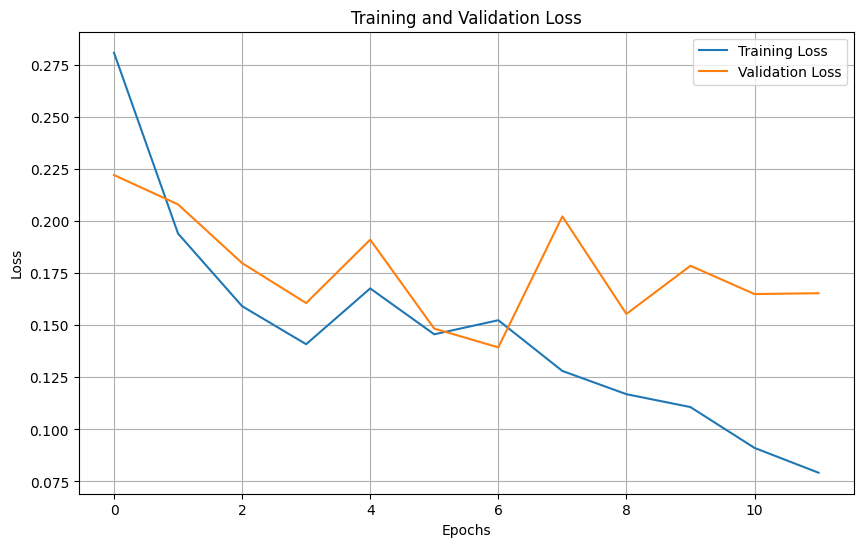

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level2_VGG19.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'SE Block Hybrid Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[224   1]
 [ 22 155]]
              precision    recall  f1-score   support

       clear     0.9106    0.9956    0.9512       225
      cloudy     0.9936    0.8757    0.9309       177

    accuracy                         0.9428       402
   macro avg     0.9521    0.9356    0.9410       402
weighted avg     0.9471    0.9428    0.9423       402



### EfficientNetB0

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 57s 421ms/step - accuracy: 0.8094 - loss: 0.4296 - val_accuracy: 0.9414 - val_loss: 0.2193 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9467 - loss: 0.1465 - val_accuracy: 0.9485 - val_loss: 0.1435 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9584 - loss: 0.0975 - val_accuracy: 0.9574 - val_loss: 0.1240 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9571 - loss: 0.1006 - val_accuracy: 0.9627 - val_loss: 0.1221 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9648 - loss: 0.0763 - val_accuracy: 0.9645 - val_loss: 0.1215 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9681 - loss: 0.0806 - val_accuracy: 0.9591 - val_loss: 0.1348 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.978

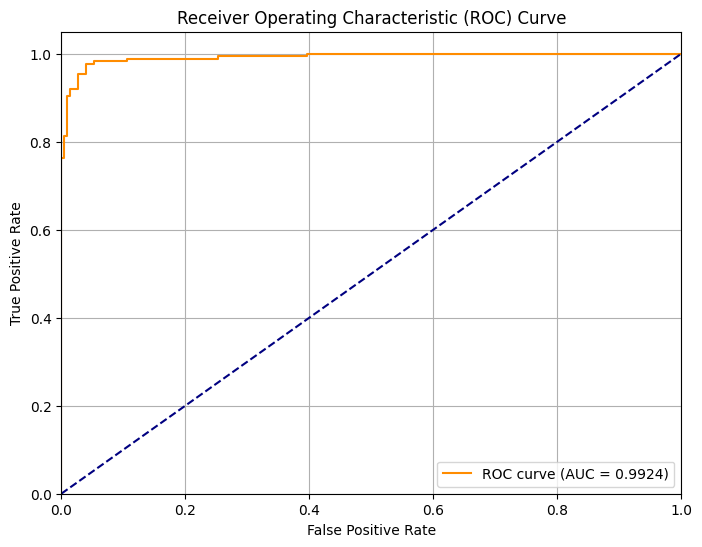

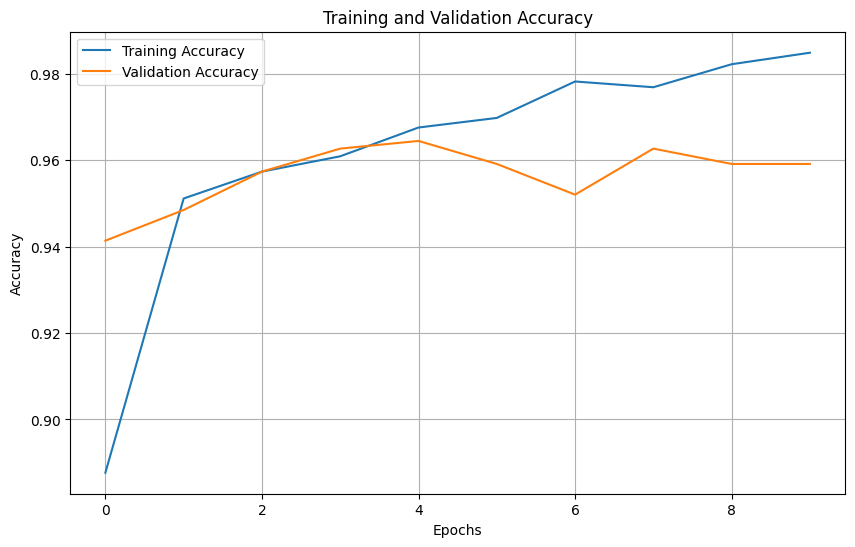

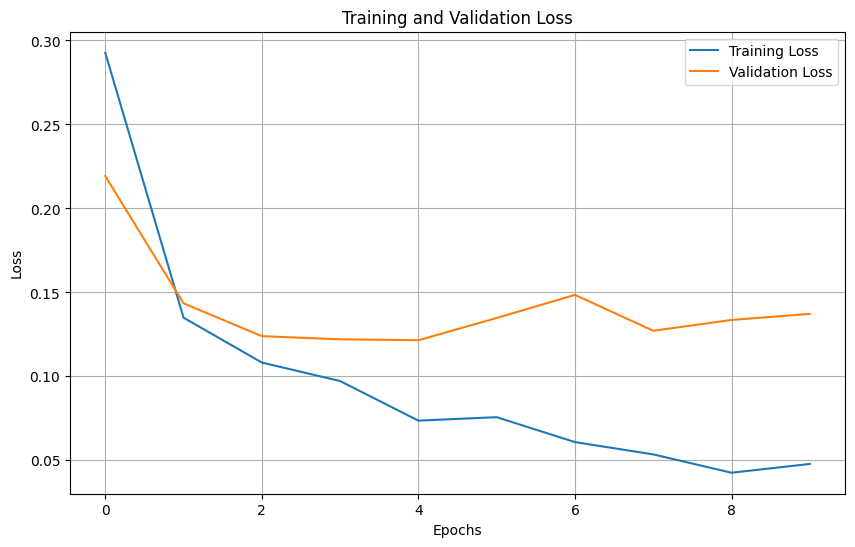

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level2_EfficientNetB0.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f' Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[219   6]
 [ 11 166]]
              precision    recall  f1-score   support

       clear     0.9522    0.9733    0.9626       225
      cloudy     0.9651    0.9379    0.9513       177

    accuracy                         0.9577       402
   macro avg     0.9586    0.9556    0.9570       402
weighted avg     0.9579    0.9577    0.9576       402



### EfficientNetV2B0

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 57s 375ms/step - accuracy: 0.8403 - loss: 0.4269 - val_accuracy: 0.9396 - val_loss: 0.1588 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9419 - loss: 0.1578 - val_accuracy: 0.9449 - val_loss: 0.1359 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9514 - loss: 0.1202 - val_accuracy: 0.9556 - val_loss: 0.1309 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9611 - loss: 0.1105 - val_accuracy: 0.9538 - val_loss: 0.1172 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9637 - loss: 0.0901 - val_accuracy: 0.9574 - val_loss: 0.1233 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9617 - loss: 0.0963 - val_accuracy: 0.9574 - val_loss: 0.1189 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.968

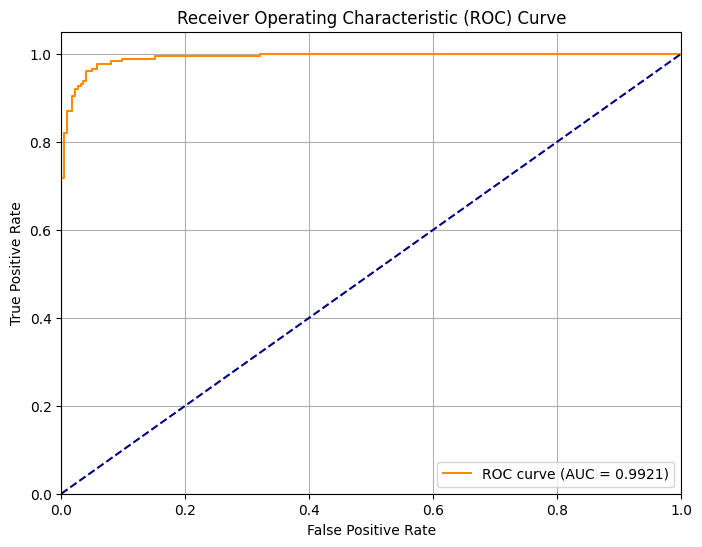

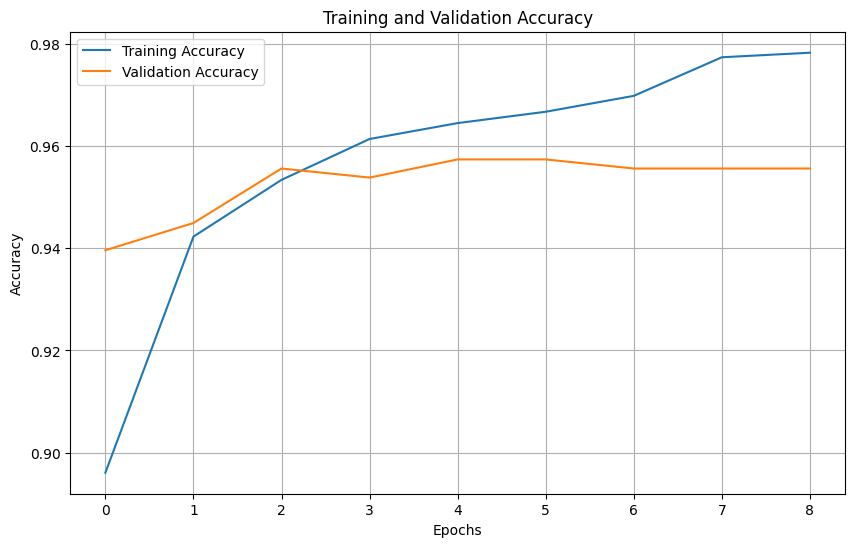

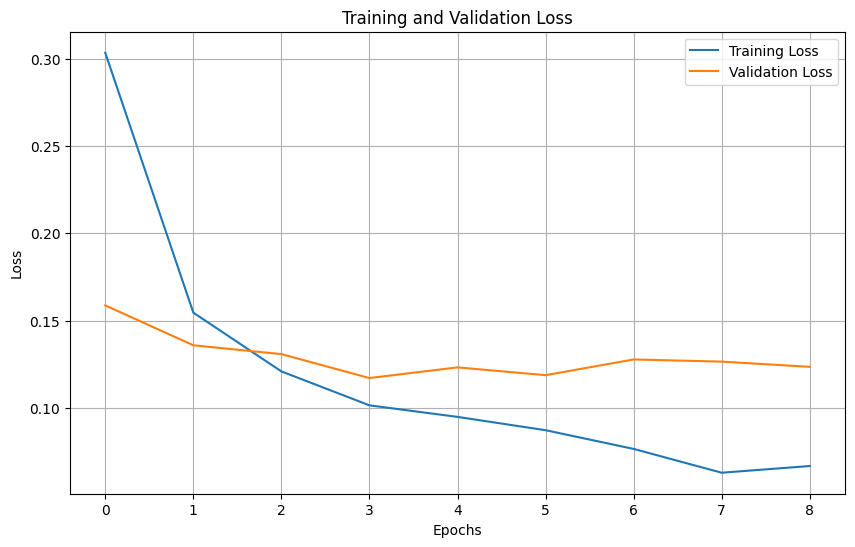

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, EfficientNetV2B0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level2_EfficientNetV2B0.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[217   8]
 [ 12 165]]
              precision    recall  f1-score   support

       clear     0.9476    0.9644    0.9559       225
      cloudy     0.9538    0.9322    0.9429       177

    accuracy                         0.9502       402
   macro avg     0.9507    0.9483    0.9494       402
weighted avg     0.9503    0.9502    0.9502       402



### InceptionV3

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 37s 274ms/step - accuracy: 0.8676 - loss: 0.3175 - val_accuracy: 0.9361 - val_loss: 0.2040 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9318 - loss: 0.1718 - val_accuracy: 0.9378 - val_loss: 0.1665 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9441 - loss: 0.1433 - val_accuracy: 0.9432 - val_loss: 0.1556 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9486 - loss: 0.1237 - val_accuracy: 0.9467 - val_loss: 0.1457 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9550 - loss: 0.1159 - val_accuracy: 0.9378 - val_loss: 0.1664 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9650 - loss: 0.0942 - val_accuracy: 0.9503 - val_loss: 0.1628 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.959

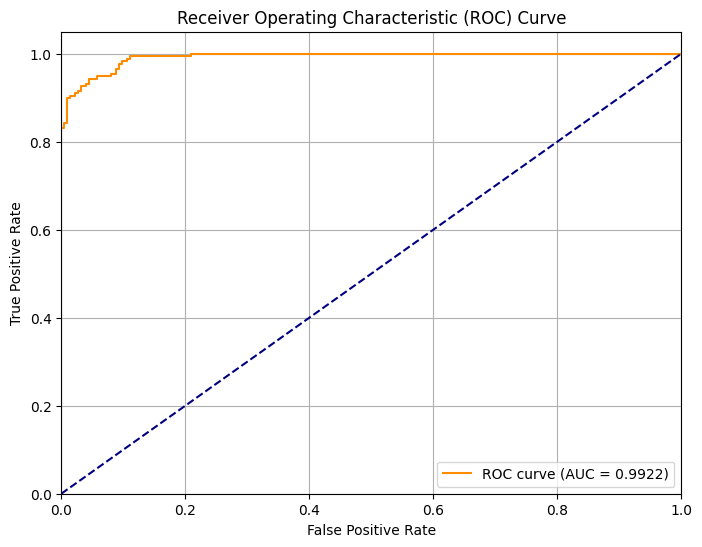

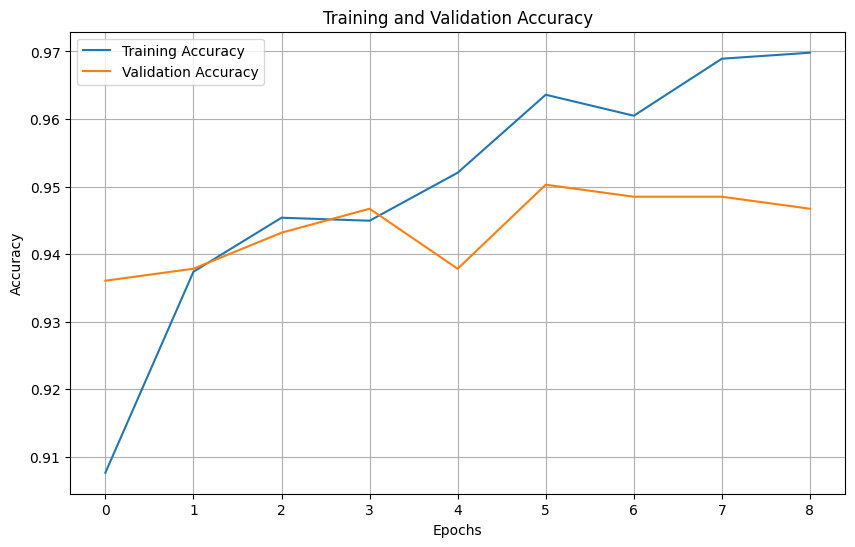

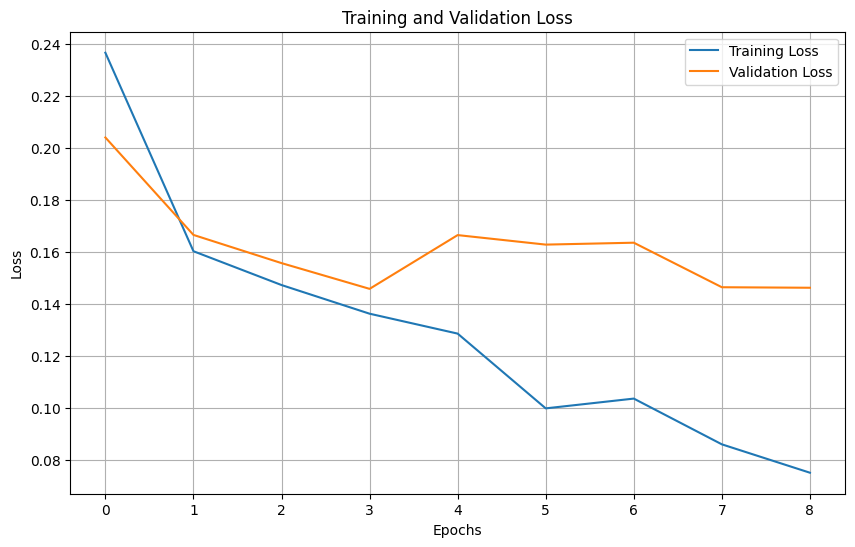

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level2_InceptionV3.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'SE Block Hybrid Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[223   2]
 [ 26 151]]
              precision    recall  f1-score   support

       clear     0.8956    0.9911    0.9409       225
      cloudy     0.9869    0.8531    0.9152       177

    accuracy                         0.9303       402
   macro avg     0.9413    0.9221    0.9280       402
weighted avg     0.9358    0.9303    0.9296       402



### InceptionResNetV2

Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 68s 525ms/step - accuracy: 0.8182 - loss: 0.4321 - val_accuracy: 0.8650 - val_loss: 0.3115 - learning_rate: 1.0000e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8726 - loss: 0.3105 - val_accuracy: 0.8703 - val_loss: 0.3984 - learning_rate: 1.0000e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.8738 - loss: 0.3203 - val_accuracy: 0.8668 - val_loss: 0.2891 - learning_rate: 1.0000e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8791 - loss: 0.2839 - val_accuracy: 0.8650 - val_loss: 0.2996 - learning_rate: 1.0000e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8939 - loss: 0.2735 - val_accuracy: 0.8703 - val_loss: 0.2774 - learning_rate: 1.0000e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.8857 - loss: 0.2863 - val_accuracy: 0.8686 - val_loss: 0.2707 - learning_rate: 1.0000e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.893

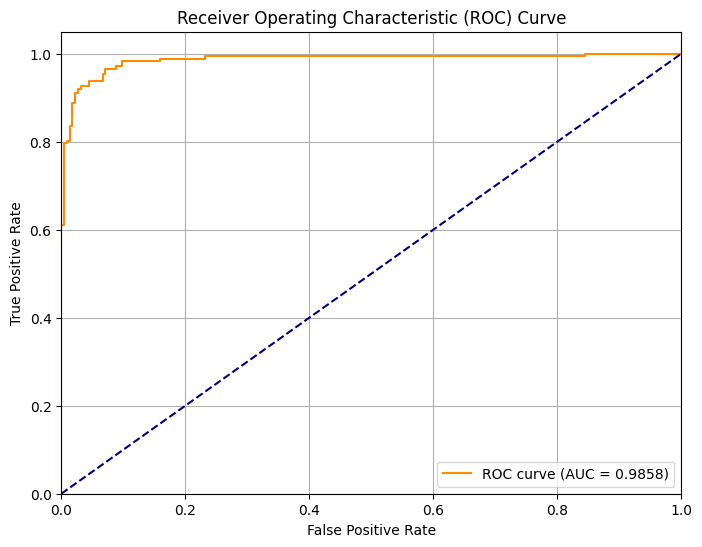

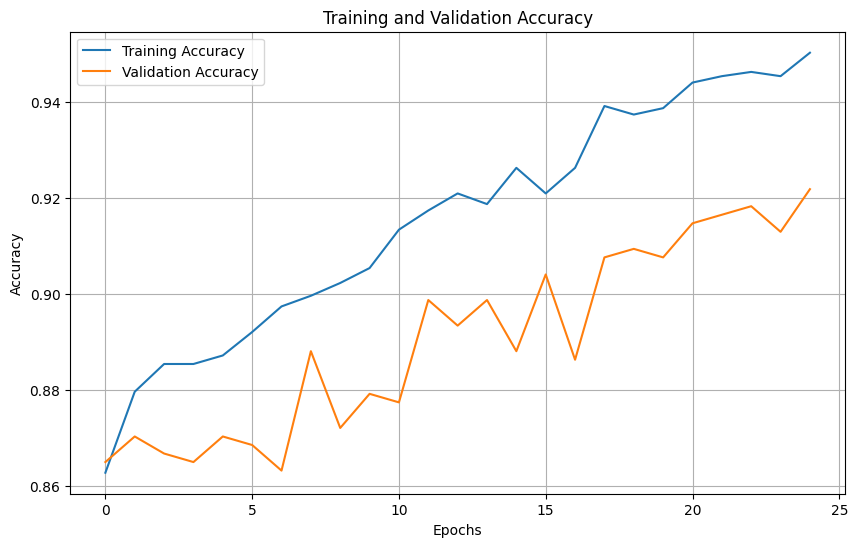

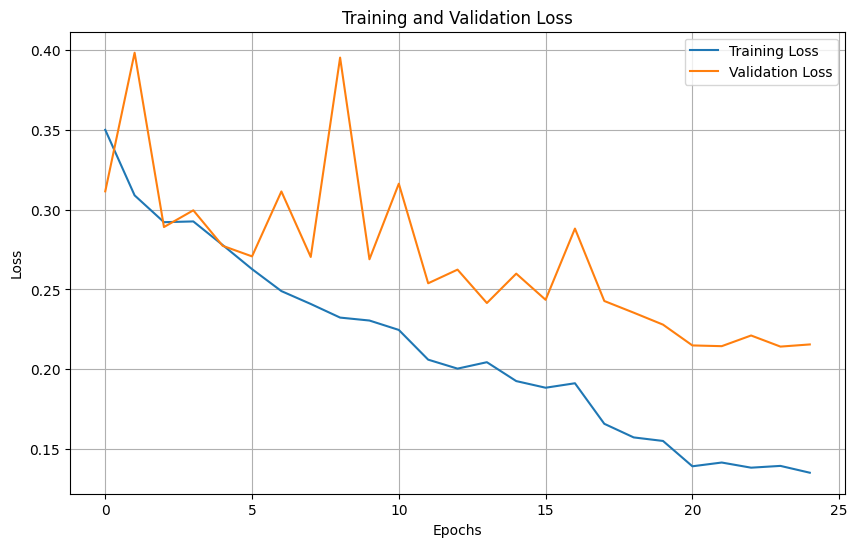

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0, Xception, DenseNet121, MobileNetV2, InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input, Dropout, BatchNormalization, Multiply, Activation, Reshape
from tensorflow.keras import Model, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

train_generator, val_generator = train_ds, val_ds
base_model1 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model1.layers[-40:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
features1 = base_model1(input_layer, training=True)
gap1 = GlobalAveragePooling2D()(features1)
x= Dense(128, activation='relu')(gap1)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)
initial_lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
hybrid_model = Model(inputs=input_layer, outputs=out)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = hybrid_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)
hybrid_model.save('/content/Level2_InceptionResNetV2.keras')

predictions = hybrid_model.predict(x_test)
final_preds = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_preds)
print(f'Model Accuracy: {accuracy * 100:.4f}%')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, final_preds))
class_names = ['clear', 'cloudy']
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

[[220   5]
 [ 20 157]]
              precision    recall  f1-score   support

       clear     0.9167    0.9778    0.9462       225
      cloudy     0.9691    0.8870    0.9263       177

    accuracy                         0.9378       402
   macro avg     0.9429    0.9324    0.9362       402
weighted avg     0.9398    0.9378    0.9374       402



## Voting

### ResNet50

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 324ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 324ms/step

=== Majority Voting Model Metrics ===
Accuracy: 95.52%
Precision: 0.9818
Recall: 0.9153
F1 Score: 0.9474


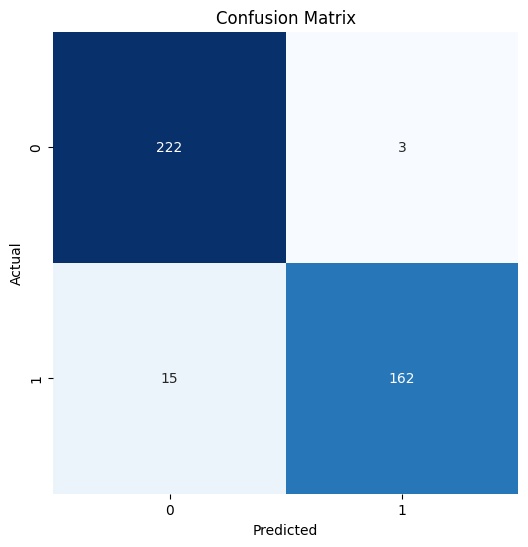

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


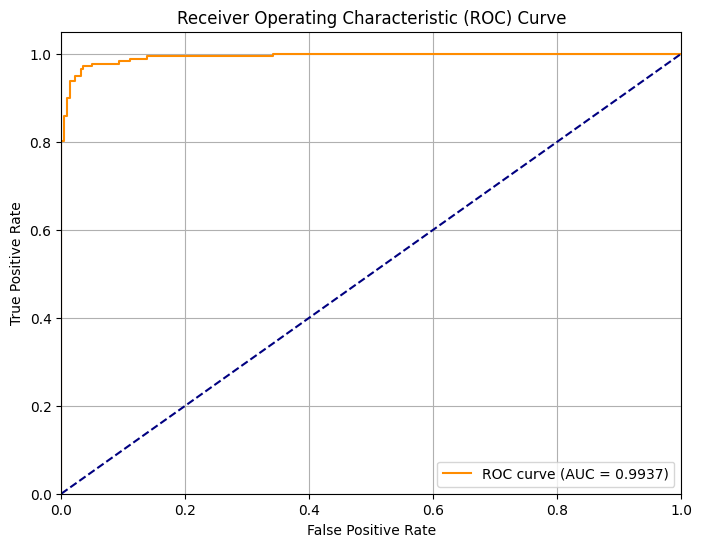

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Trained Models ===
original_model = keras.models.load_model('/content/Original_ResNet50.keras')
level1_model = keras.models.load_model('/content/Level1_ResNet50.keras')
level2_model = keras.models.load_model('/content/Level2_ResNet50.keras')

# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_preds = original_model.predict(x_test)
level1_preds = level1_model.predict(x_test)
level2_preds = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_preds > 0.5).astype(int)
level1_preds = (level1_preds > 0.5).astype(int)
level2_preds = (level2_preds > 0.5).astype(int)

# === Majority Voting ===
# Concatenate predictions and apply majority voting
predictions = np.concatenate([original_preds, level1_preds, level2_preds], axis=1)
final_preds = (np.sum(predictions, axis=1) > 1).astype(int)  # Majority voting logic 0 1 1 1

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Majority Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Average probabilities for ROC Curve
avg_probs = (original_model.predict(x_test) + level1_model.predict(x_test) + level2_model.predict(x_test)) / 3
fpr, tpr, thresholds = roc_curve(y_test, avg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import numpy as np
import pandas as pd

# Combine predictions and true labels for easier analysis
pred_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_preds': original_preds.flatten(),
    'level1_preds': level1_preds.flatten(),
    'level2_preds': level2_preds.flatten(),
    'ensemble_preds': final_preds.flatten()
})

# Get probability scores for soft voting analysis
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)
avg_probs = (original_probs + level1_probs + level2_probs) / 3

# Create DataFrames for probability scores
prob_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_probs': original_probs.flatten(),
    'level1_probs': level1_probs.flatten(),
    'level2_probs': level2_probs.flatten(),
    'ensemble_probs': avg_probs.flatten()
})

# Save predictions and probabilities to Excel with multiple sheets
with pd.ExcelWriter('/content/predictions_and_probabilities.xlsx', engine='openpyxl') as writer:
    pred_df.to_excel(writer, sheet_name='Predictions', index=False)
    prob_df.to_excel(writer, sheet_name='Probabilities', index=False)



#### Weighting Voting

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/step

=== Weighted Voting Model Metrics ===
Accuracy: 95.02%
Precision: 0.9758
Recall: 0.9096
F1 Score: 0.9415
              precision    recall  f1-score   support

       clear     0.9325    0.9822    0.9567       225
      cloudy     0.9758    0.9096    0.9415       177

    accuracy                         0.9502       402
   macro avg     0.9541    0.9459    0.9491       402
weighted avg     0.9515    0.9502    0.9500       402



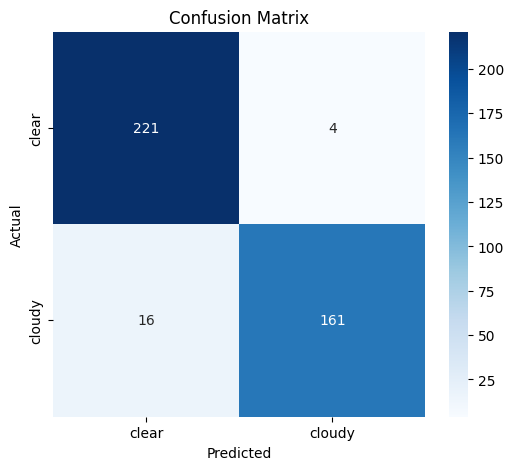

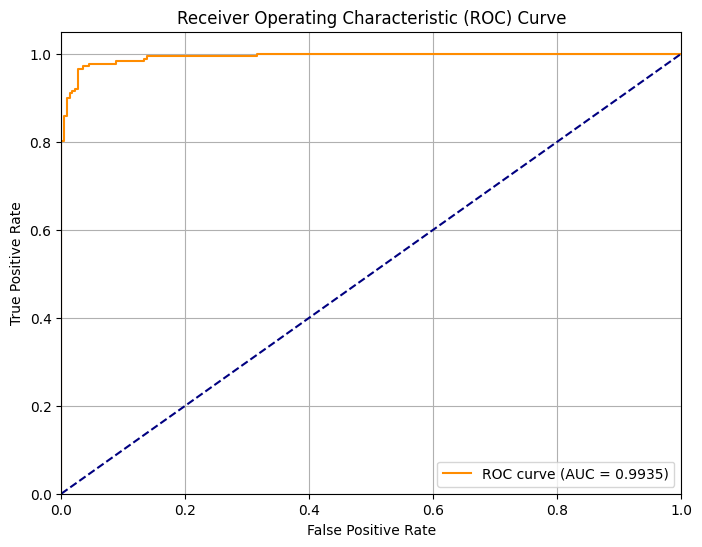

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
# === Load Trained Models ===
# === Load Trained Models ===
original_model = keras.models.load_model('/content/Original_ResNet50.keras')
level1_model = keras.models.load_model('/content/Level1_ResNet50.keras')
level2_model = keras.models.load_model('/content/Level2_ResNet50.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_probs > 0.5).astype(int)
level1_preds = (level1_probs > 0.5).astype(int)
level2_preds = (level2_probs > 0.5).astype(int)

# === Weighted Voting ===
weights = np.array([0.7, 0.2, 0.1])  # Assign more weight to the best-performing model

# Apply Weighted Voting
weighted_probs = (weights[0] * original_probs.flatten() +
                  weights[1] * level1_probs.flatten() +
                  weights[2] * level2_probs.flatten())

# Final Predictions with Threshold at 0.5
final_preds = (weighted_probs > 0.5).astype(int)

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Weighted Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
from sklearn.metrics import classification_report, confusion_matrix

# Define class names corresponding to numeric labels
class_names = ['clear', 'cloudy']

# Print classification report with class names
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

# Use numeric labels in confusion matrix and later map them to class names
cm = confusion_matrix(y_test, final_preds, labels=[0, 1])

# Optionally, visualize the confusion matrix with class names
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Weighted averaging of probabilities for ROC Curve
weighted_probs = (weights[0] * original_probs +
                  weights[1] * level1_probs +
                  weights[2] * level2_probs)

fpr, tpr, thresholds = roc_curve(y_test, weighted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Xception

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step

=== Majority Voting Model Metrics ===
Accuracy: 93.28%
Precision: 0.9870
Recall: 0.8588
F1 Score: 0.9184


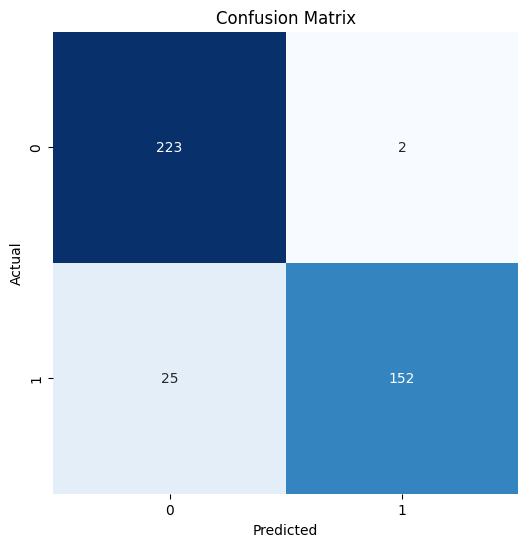

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


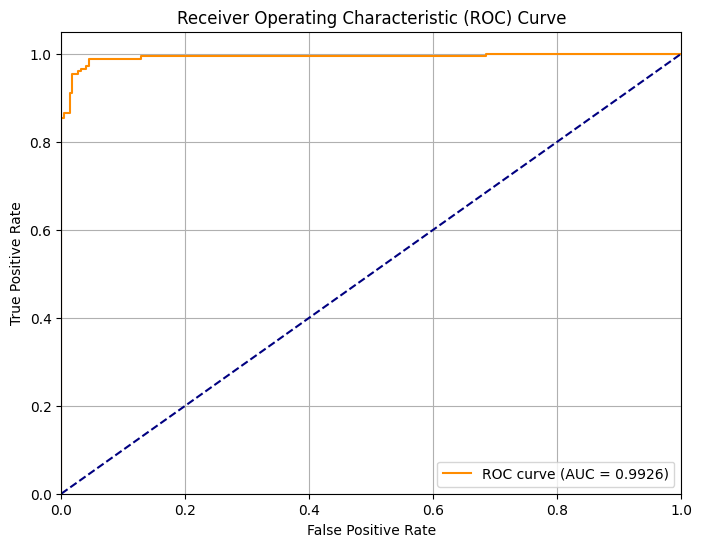

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Trained Models ===
# === Load Trained Models for Xception ===
# === Load Trained Models for Xception ===
# === Load Trained Models for Xception ===
original_model = keras.models.load_model('/content/Original_Xception.keras')
level1_model = keras.models.load_model('/content/Level1_Xception.keras')
level2_model = keras.models.load_model('/content/Level2_Xception.keras')

# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_preds = original_model.predict(x_test)
level1_preds = level1_model.predict(x_test)
level2_preds = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_preds > 0.5).astype(int)
level1_preds = (level1_preds > 0.5).astype(int)
level2_preds = (level2_preds > 0.5).astype(int)

# === Majority Voting ===
# Concatenate predictions and apply majority voting
predictions = np.concatenate([original_preds, level1_preds, level2_preds], axis=1)
final_preds = (np.sum(predictions, axis=1) > 1).astype(int)  # Majority voting logic 0 1 1 1

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Majority Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Average probabilities for ROC Curve
avg_probs = (original_model.predict(x_test) + level1_model.predict(x_test) + level2_model.predict(x_test)) / 3
fpr, tpr, thresholds = roc_curve(y_test, avg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import numpy as np
import pandas as pd

# Combine predictions and true labels for easier analysis
pred_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_preds': original_preds.flatten(),
    'level1_preds': level1_preds.flatten(),
    'level2_preds': level2_preds.flatten(),
    'ensemble_preds': final_preds.flatten()
})

# Get probability scores for soft voting analysis
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)
avg_probs = (original_probs + level1_probs + level2_probs) / 3

# Create DataFrames for probability scores
prob_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_probs': original_probs.flatten(),
    'level1_probs': level1_probs.flatten(),
    'level2_probs': level2_probs.flatten(),
    'ensemble_probs': avg_probs.flatten()
})

# Save predictions and probabilities to Excel with multiple sheets
with pd.ExcelWriter('/content/predictions_and_probabilities.xlsx', engine='openpyxl') as writer:
    pred_df.to_excel(writer, sheet_name='Predictions', index=False)
    prob_df.to_excel(writer, sheet_name='Probabilities', index=False)



#### Weighting Voting

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step

=== Weighted Voting Model Metrics ===
Accuracy: 96.02%
Precision: 0.9763
Recall: 0.9322
F1 Score: 0.9538
              precision    recall  f1-score   support

       clear     0.9485    0.9822    0.9651       225
      cloudy     0.9763    0.9322    0.9538       177

    accuracy                         0.9602       402
   macro avg     0.9624    0.9572    0.9594       402
weighted avg     0.9608    0.9602    0.9601       402



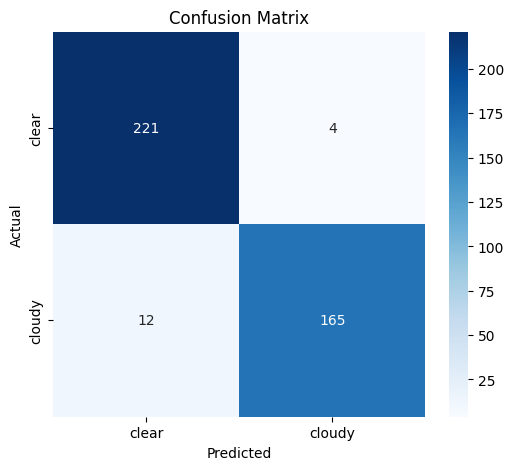

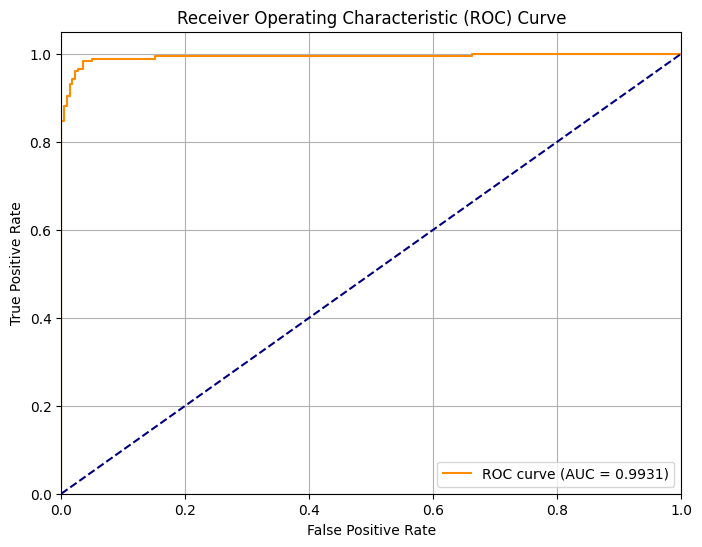

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

# === Load Trained Models for Xception ===
original_model = keras.models.load_model('/content/Original_Xception.keras')
level1_model = keras.models.load_model('/content/Level1_Xception.keras')
level2_model = keras.models.load_model('/content/Level2_Xception.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_probs > 0.5).astype(int)
level1_preds = (level1_probs > 0.5).astype(int)
level2_preds = (level2_probs > 0.5).astype(int)

# === Weighted Voting ===
weights = np.array([0.7, 0.2, 0.1])  # Assign more weight to the best-performing model

# Apply Weighted Voting
weighted_probs = (weights[0] * original_probs.flatten() +
                  weights[1] * level1_probs.flatten() +
                  weights[2] * level2_probs.flatten())

# Final Predictions with Threshold at 0.5
final_preds = (weighted_probs > 0.5).astype(int)

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Weighted Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
from sklearn.metrics import classification_report, confusion_matrix

# Define class names corresponding to numeric labels
class_names = ['clear', 'cloudy']

# Print classification report with class names
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

# Use numeric labels in confusion matrix and later map them to class names
cm = confusion_matrix(y_test, final_preds, labels=[0, 1])

# Optionally, visualize the confusion matrix with class names
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Weighted averaging of probabilities for ROC Curve
weighted_probs = (weights[0] * original_probs +
                  weights[1] * level1_probs +
                  weights[2] * level2_probs)

fpr, tpr, thresholds = roc_curve(y_test, weighted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### DenseNet121

13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 819ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 837ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 839ms/step

=== Majority Voting Model Metrics ===
Accuracy: 96.52%
Precision: 0.9822
Recall: 0.9379
F1 Score: 0.9595


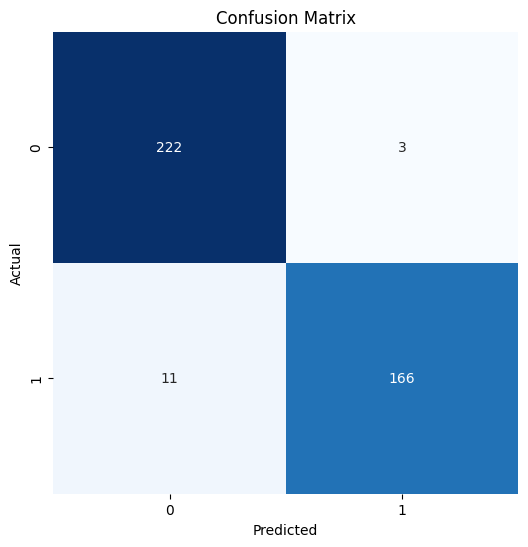

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


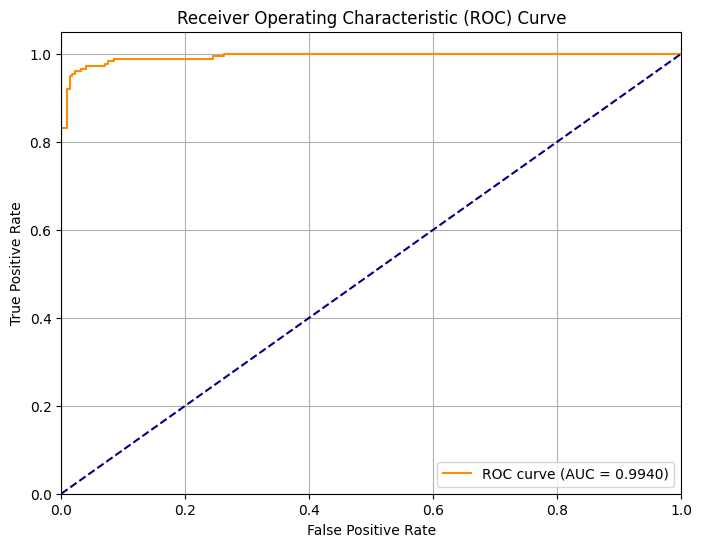

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Trained Models ===
# === Load Trained Models for DenseNet121 ===
original_model = keras.models.load_model('/content/Original_DenseNet121.keras')
level1_model = keras.models.load_model('/content/Level1_DenseNet121.keras')
level2_model = keras.models.load_model('/content/Level2_DenseNet121.keras')

# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_preds = original_model.predict(x_test)
level1_preds = level1_model.predict(x_test)
level2_preds = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_preds > 0.5).astype(int)
level1_preds = (level1_preds > 0.5).astype(int)
level2_preds = (level2_preds > 0.5).astype(int)

# === Majority Voting ===
# Concatenate predictions and apply majority voting
predictions = np.concatenate([original_preds, level1_preds, level2_preds], axis=1)
final_preds = (np.sum(predictions, axis=1) > 1).astype(int)  # Majority voting logic 0 1 1 1

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Majority Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Average probabilities for ROC Curve
avg_probs = (original_model.predict(x_test) + level1_model.predict(x_test) + level2_model.predict(x_test)) / 3
fpr, tpr, thresholds = roc_curve(y_test, avg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import numpy as np
import pandas as pd

# Combine predictions and true labels for easier analysis
pred_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_preds': original_preds.flatten(),
    'level1_preds': level1_preds.flatten(),
    'level2_preds': level2_preds.flatten(),
    'ensemble_preds': final_preds.flatten()
})

# Get probability scores for soft voting analysis
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)
avg_probs = (original_probs + level1_probs + level2_probs) / 3

# Create DataFrames for probability scores
prob_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_probs': original_probs.flatten(),
    'level1_probs': level1_probs.flatten(),
    'level2_probs': level2_probs.flatten(),
    'ensemble_probs': avg_probs.flatten()
})

# Save predictions and probabilities to Excel with multiple sheets
with pd.ExcelWriter('/content/predictions_and_probabilities.xlsx', engine='openpyxl') as writer:
    pred_df.to_excel(writer, sheet_name='Predictions', index=False)
    prob_df.to_excel(writer, sheet_name='Probabilities', index=False)



#### Weighting Voting

13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 863ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 840ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 835ms/step

=== Weighted Voting Model Metrics ===
Accuracy: 95.77%
Precision: 0.9878
Recall: 0.9153
F1 Score: 0.9501
              precision    recall  f1-score   support

       clear     0.9370    0.9911    0.9633       225
      cloudy     0.9878    0.9153    0.9501       177

    accuracy                         0.9577       402
   macro avg     0.9624    0.9532    0.9567       402
weighted avg     0.9594    0.9577    0.9575       402



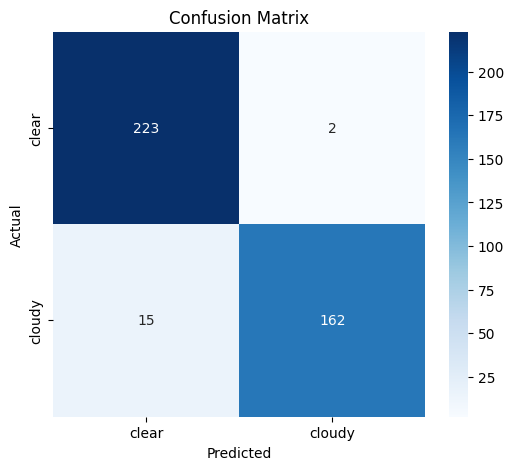

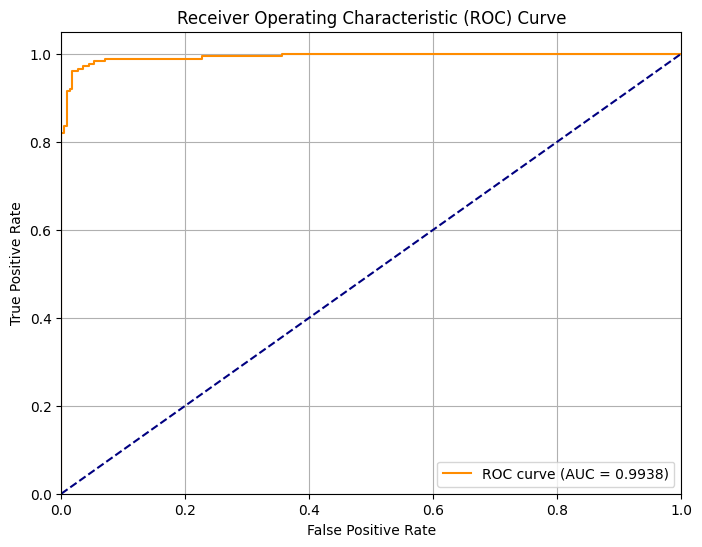

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
# === Load Trained Models ===
# === Load Trained Models ===
# === Load Trained Models for DenseNet121 ===
original_model = keras.models.load_model('/content/Original_DenseNet121.keras')
level1_model = keras.models.load_model('/content/Level1_DenseNet121.keras')
level2_model = keras.models.load_model('/content/Level2_DenseNet121.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_probs > 0.5).astype(int)
level1_preds = (level1_probs > 0.5).astype(int)
level2_preds = (level2_probs > 0.5).astype(int)

# === Weighted Voting ===
weights = np.array([0.7, 0.2, 0.1])  # Assign more weight to the best-performing model

# Apply Weighted Voting
weighted_probs = (weights[0] * original_probs.flatten() +
                  weights[1] * level1_probs.flatten() +
                  weights[2] * level2_probs.flatten())

# Final Predictions with Threshold at 0.5
final_preds = (weighted_probs > 0.5).astype(int)

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Weighted Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
from sklearn.metrics import classification_report, confusion_matrix

# Define class names corresponding to numeric labels
class_names = ['clear', 'cloudy']

# Print classification report with class names
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

# Use numeric labels in confusion matrix and later map them to class names
cm = confusion_matrix(y_test, final_preds, labels=[0, 1])

# Optionally, visualize the confusion matrix with class names
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Weighted averaging of probabilities for ROC Curve
weighted_probs = (weights[0] * original_probs +
                  weights[1] * level1_probs +
                  weights[2] * level2_probs)

fpr, tpr, thresholds = roc_curve(y_test, weighted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### ResNet50V2

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step

=== Majority Voting Model Metrics ===
Accuracy: 93.53%
Precision: 0.9871
Recall: 0.8644
F1 Score: 0.9217


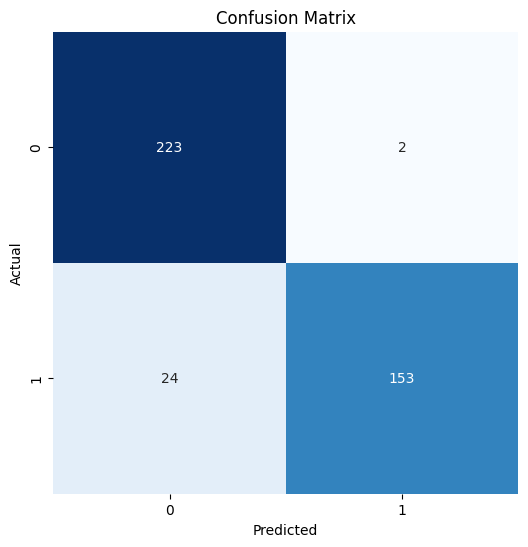

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


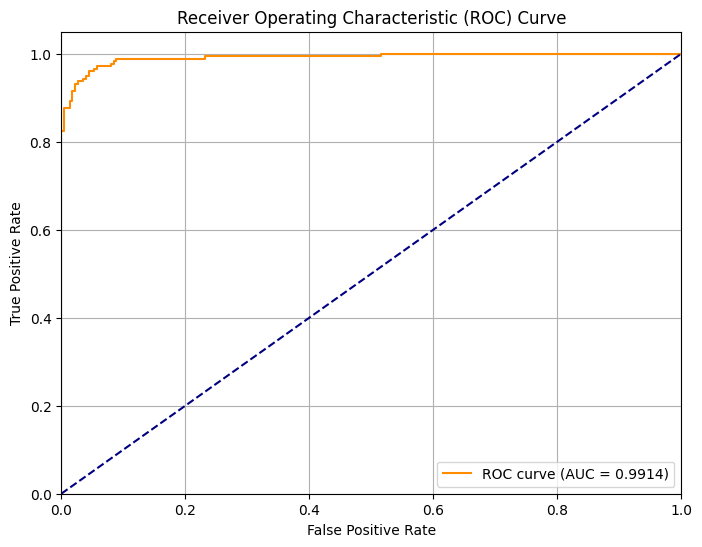

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Trained Models for ResNet50V2 ===
original_model = keras.models.load_model('/content/Original_ResNet50V2.keras')
level1_model = keras.models.load_model('/content/Level1_ResNet50V2.keras')
level2_model = keras.models.load_model('/content/Level2_ResNet50V2.keras')

# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_preds = original_model.predict(x_test)
level1_preds = level1_model.predict(x_test)
level2_preds = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_preds > 0.5).astype(int)
level1_preds = (level1_preds > 0.5).astype(int)
level2_preds = (level2_preds > 0.5).astype(int)

# === Majority Voting ===
# Concatenate predictions and apply majority voting
predictions = np.concatenate([original_preds, level1_preds, level2_preds], axis=1)
final_preds = (np.sum(predictions, axis=1) > 1).astype(int)  # Majority voting logic 0 1 1 1

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Majority Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Average probabilities for ROC Curve
avg_probs = (original_model.predict(x_test) + level1_model.predict(x_test) + level2_model.predict(x_test)) / 3
fpr, tpr, thresholds = roc_curve(y_test, avg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import numpy as np
import pandas as pd

# Combine predictions and true labels for easier analysis
pred_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_preds': original_preds.flatten(),
    'level1_preds': level1_preds.flatten(),
    'level2_preds': level2_preds.flatten(),
    'ensemble_preds': final_preds.flatten()
})

# Get probability scores for soft voting analysis
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)
avg_probs = (original_probs + level1_probs + level2_probs) / 3

# Create DataFrames for probability scores
prob_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_probs': original_probs.flatten(),
    'level1_probs': level1_probs.flatten(),
    'level2_probs': level2_probs.flatten(),
    'ensemble_probs': avg_probs.flatten()
})

# Save predictions and probabilities to Excel with multiple sheets
with pd.ExcelWriter('/content/predictions_and_probabilities.xlsx', engine='openpyxl') as writer:
    pred_df.to_excel(writer, sheet_name='Predictions', index=False)
    prob_df.to_excel(writer, sheet_name='Probabilities', index=False)



#### Weighting Voting

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 286ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step

=== Weighted Voting Model Metrics ===
Accuracy: 92.79%
Precision: 0.9805
Recall: 0.8531
F1 Score: 0.9124
              precision    recall  f1-score   support

       clear     0.8952    0.9867    0.9387       225
      cloudy     0.9805    0.8531    0.9124       177

    accuracy                         0.9279       402
   macro avg     0.9378    0.9199    0.9255       402
weighted avg     0.9327    0.9279    0.9271       402



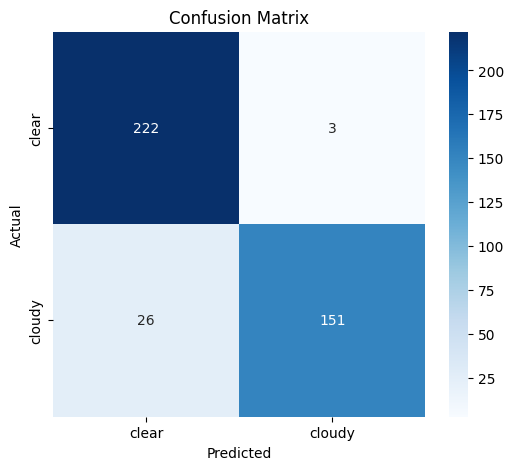

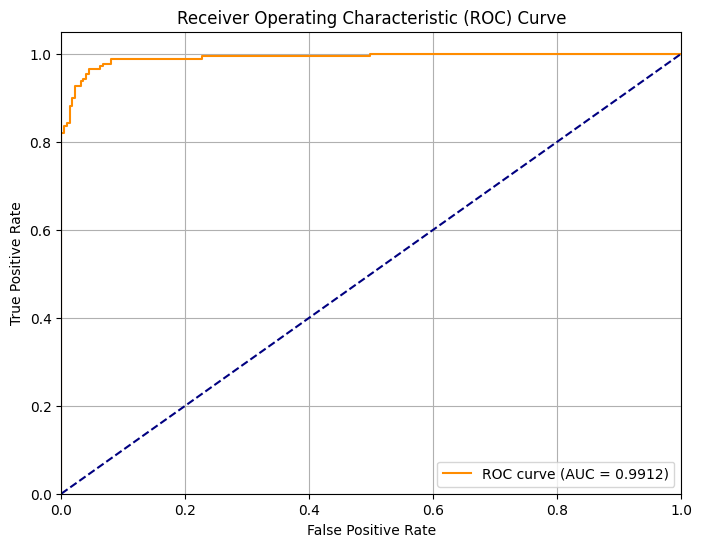

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
# === Load Trained Models ===
# === Load Trained Models for ResNet50V2 ===
original_model = keras.models.load_model('/content/Original_ResNet50V2.keras')
level1_model = keras.models.load_model('/content/Level1_ResNet50V2.keras')
level2_model = keras.models.load_model('/content/Level2_ResNet50V2.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_probs > 0.5).astype(int)
level1_preds = (level1_probs > 0.5).astype(int)
level2_preds = (level2_probs > 0.5).astype(int)

# === Weighted Voting ===
weights = np.array([0.7, 0.2, 0.1])  # Assign more weight to the best-performing model

# Apply Weighted Voting
weighted_probs = (weights[0] * original_probs.flatten() +
                  weights[1] * level1_probs.flatten() +
                  weights[2] * level2_probs.flatten())

# Final Predictions with Threshold at 0.5
final_preds = (weighted_probs > 0.5).astype(int)

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Weighted Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
from sklearn.metrics import classification_report, confusion_matrix

# Define class names corresponding to numeric labels
class_names = ['clear', 'cloudy']

# Print classification report with class names
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

# Use numeric labels in confusion matrix and later map them to class names
cm = confusion_matrix(y_test, final_preds, labels=[0, 1])

# Optionally, visualize the confusion matrix with class names
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Weighted averaging of probabilities for ROC Curve
weighted_probs = (weights[0] * original_probs +
                  weights[1] * level1_probs +
                  weights[2] * level2_probs)

fpr, tpr, thresholds = roc_curve(y_test, weighted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### MoibleNetV2

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step

=== Majority Voting Model Metrics ===
Accuracy: 92.04%
Precision: 0.9801
Recall: 0.8362
F1 Score: 0.9024


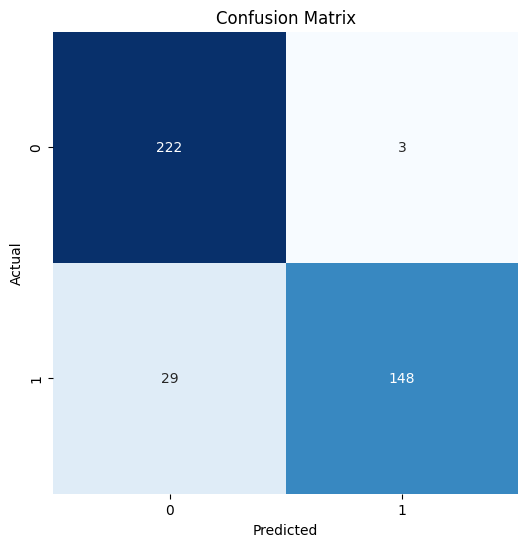

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


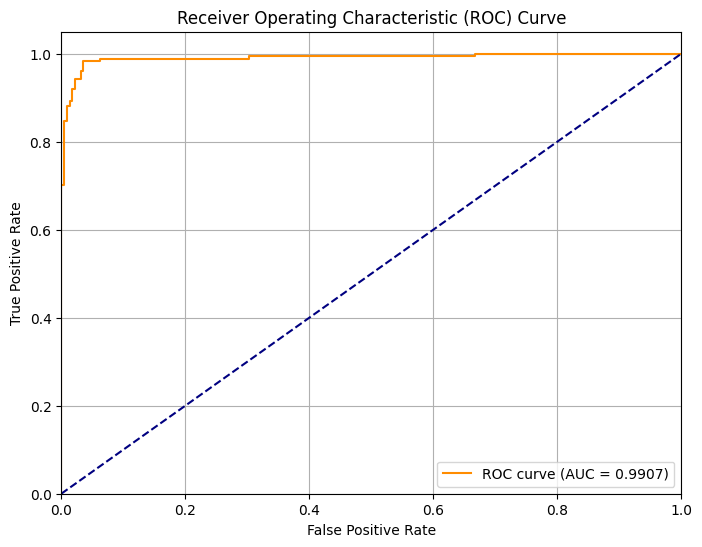

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Trained Models for MobileNetV2 ===
original_model = keras.models.load_model('/content/Original_MobileNetV2.keras')
level1_model = keras.models.load_model('/content/Level1_MobileNetV2.keras')
level2_model = keras.models.load_model('/content/Level2_MobileNetV2.keras')

# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_preds = original_model.predict(x_test)
level1_preds = level1_model.predict(x_test)
level2_preds = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_preds > 0.5).astype(int)
level1_preds = (level1_preds > 0.5).astype(int)
level2_preds = (level2_preds > 0.5).astype(int)

# === Majority Voting ===
# Concatenate predictions and apply majority voting
predictions = np.concatenate([original_preds, level1_preds, level2_preds], axis=1)
final_preds = (np.sum(predictions, axis=1) > 1).astype(int)  # Majority voting logic 0 1 1 1

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Majority Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Average probabilities for ROC Curve
avg_probs = (original_model.predict(x_test) + level1_model.predict(x_test) + level2_model.predict(x_test)) / 3
fpr, tpr, thresholds = roc_curve(y_test, avg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import numpy as np
import pandas as pd

# Combine predictions and true labels for easier analysis
pred_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_preds': original_preds.flatten(),
    'level1_preds': level1_preds.flatten(),
    'level2_preds': level2_preds.flatten(),
    'ensemble_preds': final_preds.flatten()
})

# Get probability scores for soft voting analysis
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)
avg_probs = (original_probs + level1_probs + level2_probs) / 3

# Create DataFrames for probability scores
prob_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_probs': original_probs.flatten(),
    'level1_probs': level1_probs.flatten(),
    'level2_probs': level2_probs.flatten(),
    'ensemble_probs': avg_probs.flatten()
})

# Save predictions and probabilities to Excel with multiple sheets
with pd.ExcelWriter('/content/predictions_and_probabilities.xlsx', engine='openpyxl') as writer:
    pred_df.to_excel(writer, sheet_name='Predictions', index=False)
    prob_df.to_excel(writer, sheet_name='Probabilities', index=False)



#### Weighting Voting

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step

=== Weighted Voting Model Metrics ===
Accuracy: 93.53%
Precision: 0.9415
Recall: 0.9096
F1 Score: 0.9253
              precision    recall  f1-score   support

       clear     0.9307    0.9556    0.9430       225
      cloudy     0.9415    0.9096    0.9253       177

    accuracy                         0.9353       402
   macro avg     0.9361    0.9326    0.9341       402
weighted avg     0.9355    0.9353    0.9352       402



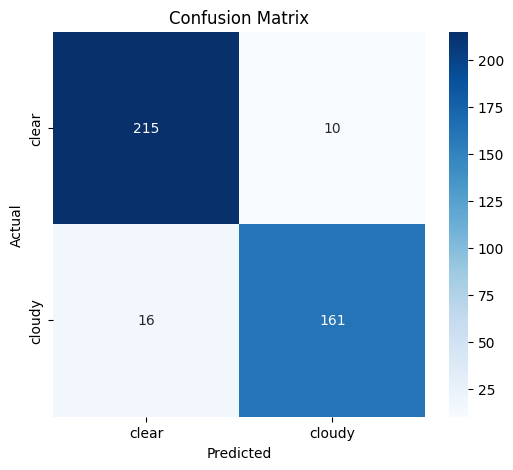

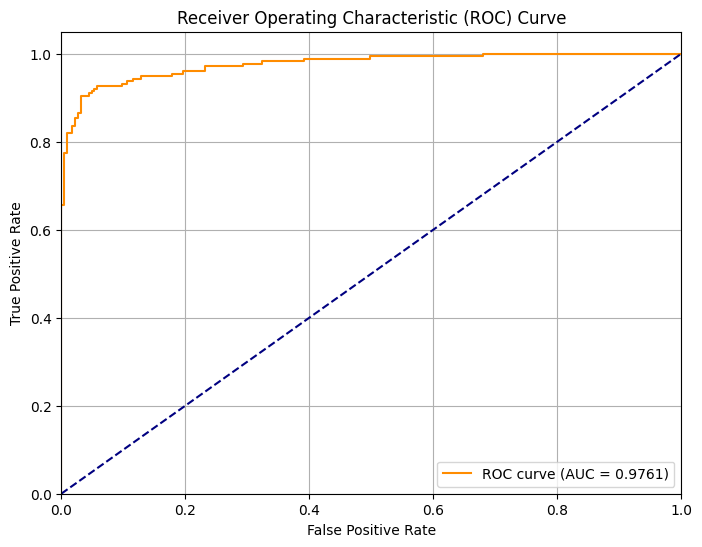

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
# === Load Trained Models ===
# === Load Trained Models for MobileNetV2 ===
original_model = keras.models.load_model('/content/Original_MobileNetV2.keras')
level1_model = keras.models.load_model('/content/Level1_MobileNetV2.keras')
level2_model = keras.models.load_model('/content/Level2_MobileNetV2.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_probs > 0.5).astype(int)
level1_preds = (level1_probs > 0.5).astype(int)
level2_preds = (level2_probs > 0.5).astype(int)

# === Weighted Voting ===
weights = np.array([0.7, 0.2, 0.1])  # Assign more weight to the best-performing model

# Apply Weighted Voting
weighted_probs = (weights[0] * original_probs.flatten() +
                  weights[1] * level1_probs.flatten() +
                  weights[2] * level2_probs.flatten())

# Final Predictions with Threshold at 0.5
final_preds = (weighted_probs > 0.5).astype(int)

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Weighted Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
from sklearn.metrics import classification_report, confusion_matrix

# Define class names corresponding to numeric labels
class_names = ['clear', 'cloudy']

# Print classification report with class names
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

# Use numeric labels in confusion matrix and later map them to class names
cm = confusion_matrix(y_test, final_preds, labels=[0, 1])

# Optionally, visualize the confusion matrix with class names
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Weighted averaging of probabilities for ROC Curve
weighted_probs = (weights[0] * original_probs +
                  weights[1] * level1_probs +
                  weights[2] * level2_probs)

fpr, tpr, thresholds = roc_curve(y_test, weighted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### NasNetMobile

13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step

=== Majority Voting Model Metrics ===
Accuracy: 96.27%
Precision: 0.9821
Recall: 0.9322
F1 Score: 0.9565


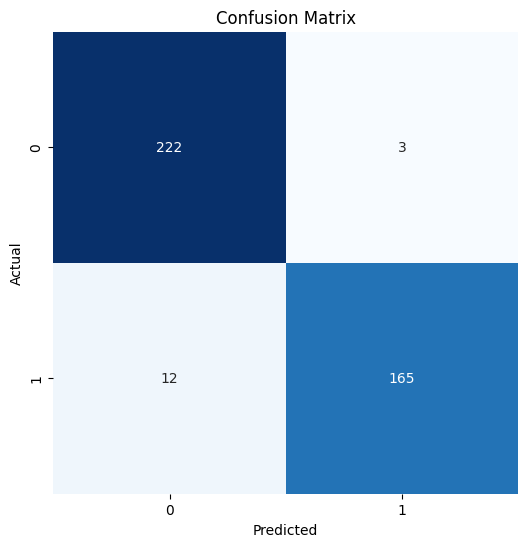

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


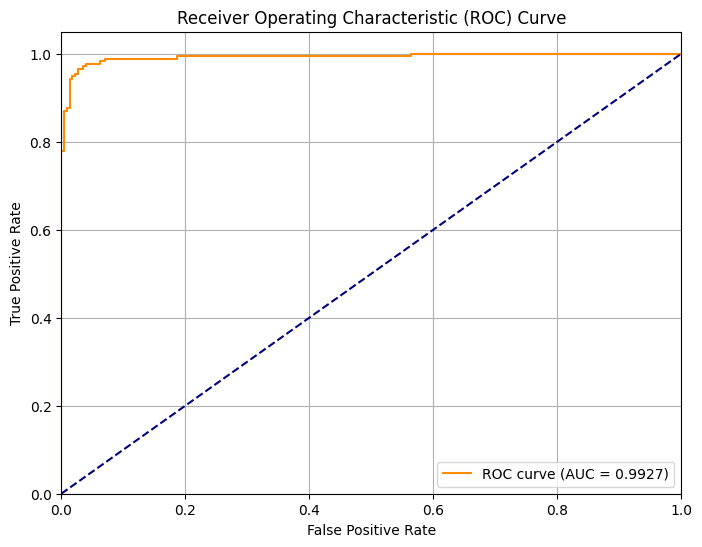

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Trained Models ===
# === Load Trained Models for NasNetMobile ===
original_model = keras.models.load_model('/content/Original_NasNetMobile.keras')
level1_model = keras.models.load_model('/content/Level1_NasNetMobile.keras')
level2_model = keras.models.load_model('/content/Level2_NasNetMobile.keras')

# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_preds = original_model.predict(x_test)
level1_preds = level1_model.predict(x_test)
level2_preds = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_preds > 0.5).astype(int)
level1_preds = (level1_preds > 0.5).astype(int)
level2_preds = (level2_preds > 0.5).astype(int)

# === Majority Voting ===
# Concatenate predictions and apply majority voting
predictions = np.concatenate([original_preds, level1_preds, level2_preds], axis=1)
final_preds = (np.sum(predictions, axis=1) > 1).astype(int)  # Majority voting logic 0 1 1 1

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Majority Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Average probabilities for ROC Curve
avg_probs = (original_model.predict(x_test) + level1_model.predict(x_test) + level2_model.predict(x_test)) / 3
fpr, tpr, thresholds = roc_curve(y_test, avg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import numpy as np
import pandas as pd

# Combine predictions and true labels for easier analysis
pred_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_preds': original_preds.flatten(),
    'level1_preds': level1_preds.flatten(),
    'level2_preds': level2_preds.flatten(),
    'ensemble_preds': final_preds.flatten()
})

# Get probability scores for soft voting analysis
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)
avg_probs = (original_probs + level1_probs + level2_probs) / 3

# Create DataFrames for probability scores
prob_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_probs': original_probs.flatten(),
    'level1_probs': level1_probs.flatten(),
    'level2_probs': level2_probs.flatten(),
    'ensemble_probs': avg_probs.flatten()
})

# Save predictions and probabilities to Excel with multiple sheets
with pd.ExcelWriter('/content/predictions_and_probabilities.xlsx', engine='openpyxl') as writer:
    pred_df.to_excel(writer, sheet_name='Predictions', index=False)
    prob_df.to_excel(writer, sheet_name='Probabilities', index=False)



#### Weighting Voting

13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step

=== Weighted Voting Model Metrics ===
Accuracy: 93.03%
Precision: 0.8821
Recall: 0.9718
F1 Score: 0.9247
              precision    recall  f1-score   support

       clear     0.9758    0.8978    0.9352       225
      cloudy     0.8821    0.9718    0.9247       177

    accuracy                         0.9303       402
   macro avg     0.9289    0.9348    0.9300       402
weighted avg     0.9345    0.9303    0.9306       402



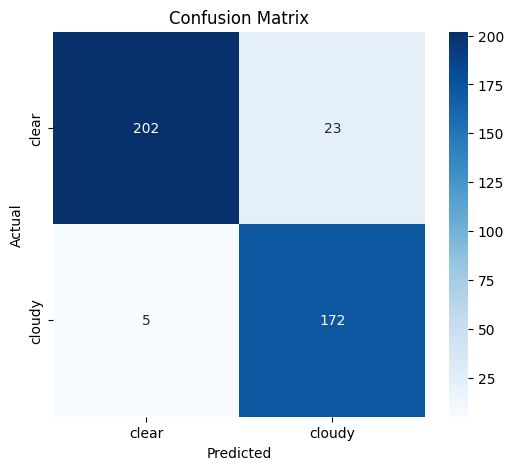

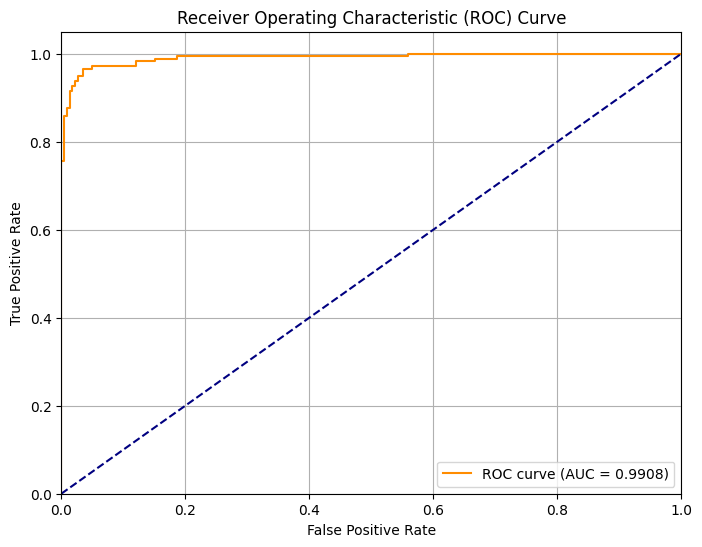

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
# === Load Trained Models ===
# === Load Trained Models ===
# === Load Trained Models for NasNetMobile ===
original_model = keras.models.load_model('/content/Original_NasNetMobile.keras')
level1_model = keras.models.load_model('/content/Level1_NasNetMobile.keras')
level2_model = keras.models.load_model('/content/Level2_NasNetMobile.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_probs > 0.5).astype(int)
level1_preds = (level1_probs > 0.5).astype(int)
level2_preds = (level2_probs > 0.5).astype(int)

# === Weighted Voting ===
weights = np.array([0.7, 0.2, 0.1])  # Assign more weight to the best-performing model

# Apply Weighted Voting
weighted_probs = (weights[0] * original_probs.flatten() +
                  weights[1] * level1_probs.flatten() +
                  weights[2] * level2_probs.flatten())

# Final Predictions with Threshold at 0.5
final_preds = (weighted_probs > 0.5).astype(int)

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Weighted Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
from sklearn.metrics import classification_report, confusion_matrix

# Define class names corresponding to numeric labels
class_names = ['clear', 'cloudy']

# Print classification report with class names
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

# Use numeric labels in confusion matrix and later map them to class names
cm = confusion_matrix(y_test, final_preds, labels=[0, 1])

# Optionally, visualize the confusion matrix with class names
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Weighted averaging of probabilities for ROC Curve
weighted_probs = (weights[0] * original_probs +
                  weights[1] * level1_probs +
                  weights[2] * level2_probs)

fpr, tpr, thresholds = roc_curve(y_test, weighted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### VGG16

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step

=== Majority Voting Model Metrics ===
Accuracy: 94.78%
Precision: 0.9699
Recall: 0.9096
F1 Score: 0.9388


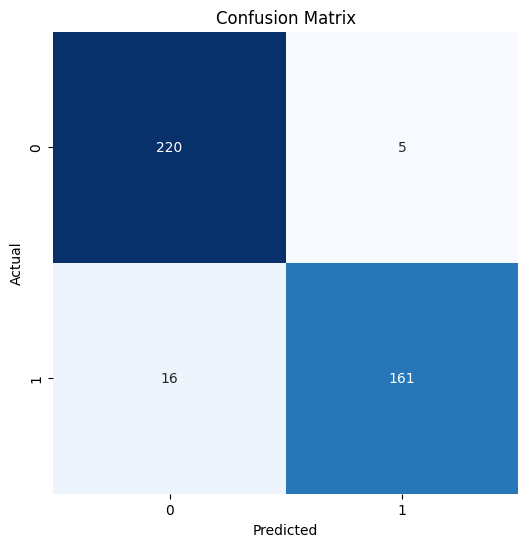

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


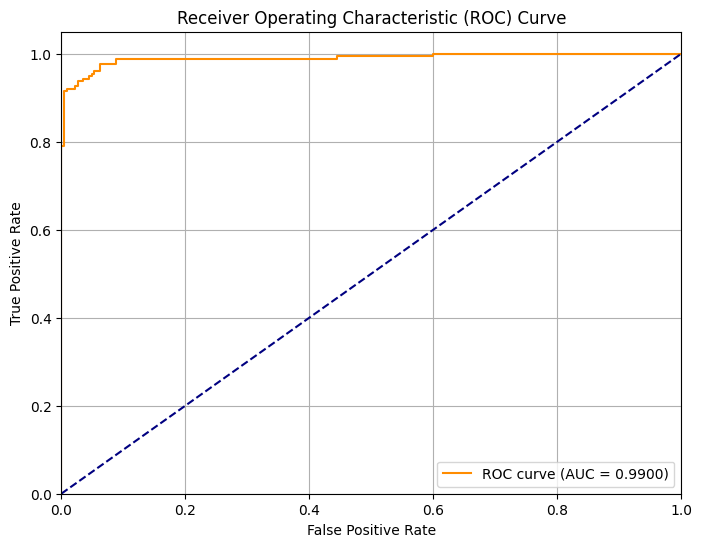

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Trained Models for VGG16 ===
original_model = keras.models.load_model('/content/Original_VGG16.keras')
level1_model = keras.models.load_model('/content/Level1_VGG16.keras')
level2_model = keras.models.load_model('/content/Level2_VGG16.keras')

# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_preds = original_model.predict(x_test)
level1_preds = level1_model.predict(x_test)
level2_preds = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_preds > 0.5).astype(int)
level1_preds = (level1_preds > 0.5).astype(int)
level2_preds = (level2_preds > 0.5).astype(int)

# === Majority Voting ===
# Concatenate predictions and apply majority voting
predictions = np.concatenate([original_preds, level1_preds, level2_preds], axis=1)
final_preds = (np.sum(predictions, axis=1) > 1).astype(int)  # Majority voting logic 0 1 1 1

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Majority Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Average probabilities for ROC Curve
avg_probs = (original_model.predict(x_test) + level1_model.predict(x_test) + level2_model.predict(x_test)) / 3
fpr, tpr, thresholds = roc_curve(y_test, avg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import numpy as np
import pandas as pd

# Combine predictions and true labels for easier analysis
pred_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_preds': original_preds.flatten(),
    'level1_preds': level1_preds.flatten(),
    'level2_preds': level2_preds.flatten(),
    'ensemble_preds': final_preds.flatten()
})

# Get probability scores for soft voting analysis
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)
avg_probs = (original_probs + level1_probs + level2_probs) / 3

# Create DataFrames for probability scores
prob_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_probs': original_probs.flatten(),
    'level1_probs': level1_probs.flatten(),
    'level2_probs': level2_probs.flatten(),
    'ensemble_probs': avg_probs.flatten()
})

# Save predictions and probabilities to Excel with multiple sheets
with pd.ExcelWriter('/content/predictions_and_probabilities.xlsx', engine='openpyxl') as writer:
    pred_df.to_excel(writer, sheet_name='Predictions', index=False)
    prob_df.to_excel(writer, sheet_name='Probabilities', index=False)



#### Weighting Voting

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step

=== Weighted Voting Model Metrics ===
Accuracy: 95.77%
Precision: 0.9598
Recall: 0.9435
F1 Score: 0.9516
              precision    recall  f1-score   support

       clear     0.9561    0.9689    0.9625       225
      cloudy     0.9598    0.9435    0.9516       177

    accuracy                         0.9577       402
   macro avg     0.9580    0.9562    0.9570       402
weighted avg     0.9577    0.9577    0.9577       402



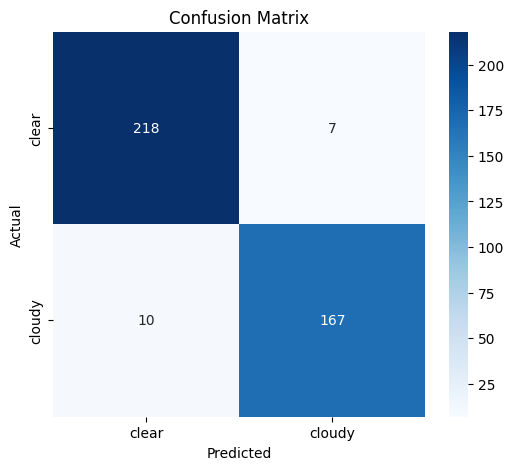

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
# === Load Trained Models ===
# === Load Trained Models for VGG16 ===
original_model = keras.models.load_model('/content/Original_VGG16.keras')
level1_model = keras.models.load_model('/content/Level1_VGG16.keras')
level2_model = keras.models.load_model('/content/Level2_VGG16.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_probs > 0.5).astype(int)
level1_preds = (level1_probs > 0.5).astype(int)
level2_preds = (level2_probs > 0.5).astype(int)

# === Weighted Voting ===
weights = np.array([0.7, 0.2, 0.1])  # Assign more weight to the best-performing model

# Apply Weighted Voting
weighted_probs = (weights[0] * original_probs.flatten() +
                  weights[1] * level1_probs.flatten() +
                  weights[2] * level2_probs.flatten())

# Final Predictions with Threshold at 0.5
final_preds = (weighted_probs > 0.5).astype(int)

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Weighted Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
from sklearn.metrics import classification_report, confusion_matrix

# Define class names corresponding to numeric labels
class_names = ['clear', 'cloudy']

# Print classification report with class names
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

# Use numeric labels in confusion matrix and later map them to class names
cm = confusion_matrix(y_test, final_preds, labels=[0, 1])

# Optionally, visualize the confusion matrix with class names
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Weighted averaging of probabilities for ROC Curve
weighted_probs = (weights[0] * original_probs +
                  weights[1] * level1_probs +
                  weights[2] * level2_probs)

fpr, tpr, thresholds = roc_curve(y_test, weighted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### VGG19

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step

=== Majority Voting Model Metrics ===
Accuracy: 95.27%
Precision: 0.9817
Recall: 0.9096
F1 Score: 0.9443


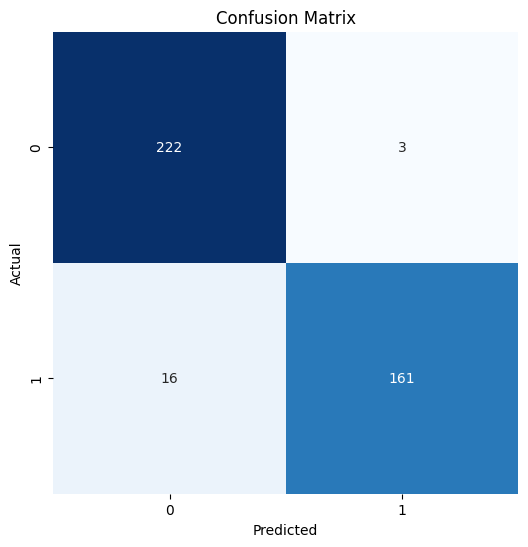

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


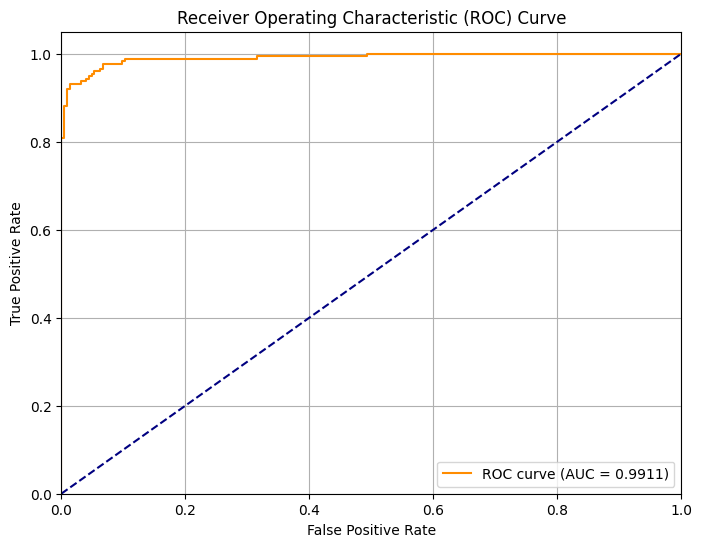

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Trained Models ===
# === Load Trained Models for VGG19 ===
original_model = keras.models.load_model('/content/Original_VGG19.keras')
level1_model = keras.models.load_model('/content/Level1_VGG19.keras')
level2_model = keras.models.load_model('/content/Level2_VGG19.keras')

# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_preds = original_model.predict(x_test)
level1_preds = level1_model.predict(x_test)
level2_preds = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_preds > 0.5).astype(int)
level1_preds = (level1_preds > 0.5).astype(int)
level2_preds = (level2_preds > 0.5).astype(int)

# === Majority Voting ===
# Concatenate predictions and apply majority voting
predictions = np.concatenate([original_preds, level1_preds, level2_preds], axis=1)
final_preds = (np.sum(predictions, axis=1) > 1).astype(int)  # Majority voting logic 0 1 1 1

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Majority Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Average probabilities for ROC Curve
avg_probs = (original_model.predict(x_test) + level1_model.predict(x_test) + level2_model.predict(x_test)) / 3
fpr, tpr, thresholds = roc_curve(y_test, avg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import numpy as np
import pandas as pd

# Combine predictions and true labels for easier analysis
pred_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_preds': original_preds.flatten(),
    'level1_preds': level1_preds.flatten(),
    'level2_preds': level2_preds.flatten(),
    'ensemble_preds': final_preds.flatten()
})

# Get probability scores for soft voting analysis
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)
avg_probs = (original_probs + level1_probs + level2_probs) / 3

# Create DataFrames for probability scores
prob_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_probs': original_probs.flatten(),
    'level1_probs': level1_probs.flatten(),
    'level2_probs': level2_probs.flatten(),
    'ensemble_probs': avg_probs.flatten()
})

# Save predictions and probabilities to Excel with multiple sheets
with pd.ExcelWriter('/content/predictions_and_probabilities.xlsx', engine='openpyxl') as writer:
    pred_df.to_excel(writer, sheet_name='Predictions', index=False)
    prob_df.to_excel(writer, sheet_name='Probabilities', index=False)



#### Weighting Voting

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step

=== Weighted Voting Model Metrics ===
Accuracy: 95.27%
Precision: 0.9647
Recall: 0.9266
F1 Score: 0.9452
              precision    recall  f1-score   support

       clear     0.9440    0.9733    0.9584       225
      cloudy     0.9647    0.9266    0.9452       177

    accuracy                         0.9527       402
   macro avg     0.9543    0.9499    0.9518       402
weighted avg     0.9531    0.9527    0.9526       402



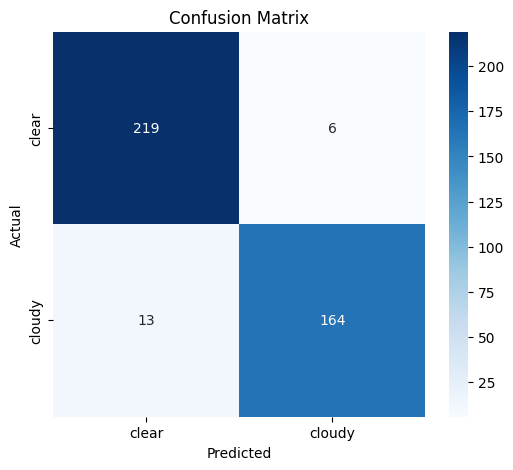

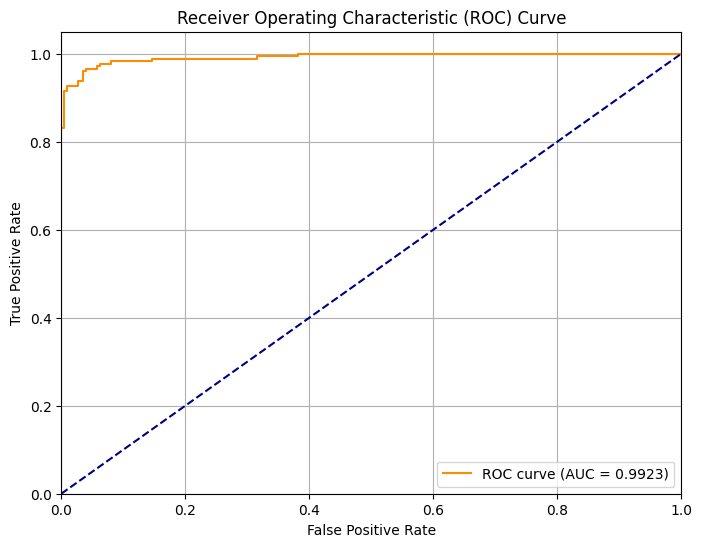

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
# === Load Trained Models ===
# === Load Trained Models for VGG19 ===
original_model = keras.models.load_model('/content/Original_VGG19.keras')
level1_model = keras.models.load_model('/content/Level1_VGG19.keras')
level2_model = keras.models.load_model('/content/Level2_VGG19.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_probs > 0.5).astype(int)
level1_preds = (level1_probs > 0.5).astype(int)
level2_preds = (level2_probs > 0.5).astype(int)

# === Weighted Voting ===
weights = np.array([0.7, 0.2, 0.1])  # Assign more weight to the best-performing model

# Apply Weighted Voting
weighted_probs = (weights[0] * original_probs.flatten() +
                  weights[1] * level1_probs.flatten() +
                  weights[2] * level2_probs.flatten())

# Final Predictions with Threshold at 0.5
final_preds = (weighted_probs > 0.5).astype(int)

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Weighted Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
from sklearn.metrics import classification_report, confusion_matrix

# Define class names corresponding to numeric labels
class_names = ['clear', 'cloudy']

# Print classification report with class names
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

# Use numeric labels in confusion matrix and later map them to class names
cm = confusion_matrix(y_test, final_preds, labels=[0, 1])

# Optionally, visualize the confusion matrix with class names
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Weighted averaging of probabilities for ROC Curve
weighted_probs = (weights[0] * original_probs +
                  weights[1] * level1_probs +
                  weights[2] * level2_probs)

fpr, tpr, thresholds = roc_curve(y_test, weighted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### EfficientNetB0

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Trained Models for EfficientNetB0 ===
original_model = keras.models.load_model('/content/Original_EfficientNetB0.keras')
level1_model = keras.models.load_model('/content/Level1_EfficeintNetB0.keras')
level2_model = keras.models.load_model('/content/Level2_EfficientNetB0.keras')

# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_preds = original_model.predict(x_test)
level1_preds = level1_model.predict(x_test)
level2_preds = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_preds > 0.5).astype(int)
level1_preds = (level1_preds > 0.5).astype(int)
level2_preds = (level2_preds > 0.5).astype(int)

# === Majority Voting ===
# Concatenate predictions and apply majority voting
predictions = np.concatenate([original_preds, level1_preds, level2_preds], axis=1)
final_preds = (np.sum(predictions, axis=1) > 1).astype(int)  # Majority voting logic 0 1 1 1

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Majority Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Average probabilities for ROC Curve
avg_probs = (original_model.predict(x_test) + level1_model.predict(x_test) + level2_model.predict(x_test)) / 3
fpr, tpr, thresholds = roc_curve(y_test, avg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import numpy as np
import pandas as pd

# Combine predictions and true labels for easier analysis
pred_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_preds': original_preds.flatten(),
    'level1_preds': level1_preds.flatten(),
    'level2_preds': level2_preds.flatten(),
    'ensemble_preds': final_preds.flatten()
})

# Get probability scores for soft voting analysis
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)
avg_probs = (original_probs + level1_probs + level2_probs) / 3

# Create DataFrames for probability scores
prob_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_probs': original_probs.flatten(),
    'level1_probs': level1_probs.flatten(),
    'level2_probs': level2_probs.flatten(),
    'ensemble_probs': avg_probs.flatten()
})

# Save predictions and probabilities to Excel with multiple sheets
with pd.ExcelWriter('/content/predictions_and_probabilities.xlsx', engine='openpyxl') as writer:
    pred_df.to_excel(writer, sheet_name='Predictions', index=False)
    prob_df.to_excel(writer, sheet_name='Probabilities', index=False)



13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 501ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 503ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 443ms/step

=== Majority Voting Model Metrics ===
Accuracy: 96.02%
Precision: 0.9708
Recall: 0.9379
F1 Score: 0.9540


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


#### Weighting Voting

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 456ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 519ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 518ms/step

=== Weighted Voting Model Metrics ===
Accuracy: 95.52%
Precision: 0.9704
Recall: 0.9266
F1 Score: 0.9480
              precision    recall  f1-score   support

       clear     0.9442    0.9778    0.9607       225
      cloudy     0.9704    0.9266    0.9480       177

    accuracy                         0.9552       402
   macro avg     0.9573    0.9522    0.9543       402
weighted avg     0.9557    0.9552    0.9551       402



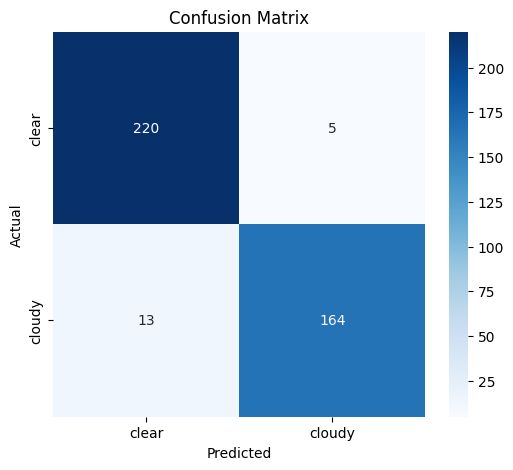

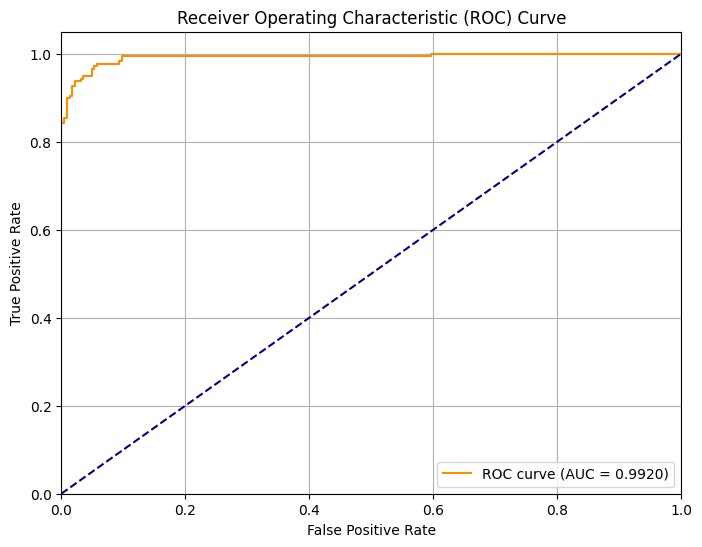

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
# === Load Trained Models ===
# === Load Trained Models for EfficientNetB0 ===
original_model = keras.models.load_model('/content/Original_EfficientNetB0.keras')
level1_model = keras.models.load_model('/content/Level1_EfficeintNetB0.keras')
level2_model = keras.models.load_model('/content/Level2_EfficientNetB0.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_probs > 0.5).astype(int)
level1_preds = (level1_probs > 0.5).astype(int)
level2_preds = (level2_probs > 0.5).astype(int)

# === Weighted Voting ===
weights = np.array([0.7, 0.2, 0.1])  # Assign more weight to the best-performing model

# Apply Weighted Voting
weighted_probs = (weights[0] * original_probs.flatten() +
                  weights[1] * level1_probs.flatten() +
                  weights[2] * level2_probs.flatten())

# Final Predictions with Threshold at 0.5
final_preds = (weighted_probs > 0.5).astype(int)

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Weighted Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
from sklearn.metrics import classification_report, confusion_matrix

# Define class names corresponding to numeric labels
class_names = ['clear', 'cloudy']

# Print classification report with class names
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

# Use numeric labels in confusion matrix and later map them to class names
cm = confusion_matrix(y_test, final_preds, labels=[0, 1])

# Optionally, visualize the confusion matrix with class names
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Weighted averaging of probabilities for ROC Curve
weighted_probs = (weights[0] * original_probs +
                  weights[1] * level1_probs +
                  weights[2] * level2_probs)

fpr, tpr, thresholds = roc_curve(y_test, weighted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### EfficientNetB0V2

13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 510ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 495ms/step

=== Majority Voting Model Metrics ===
Accuracy: 95.52%
Precision: 0.9595
Recall: 0.9379
F1 Score: 0.9486


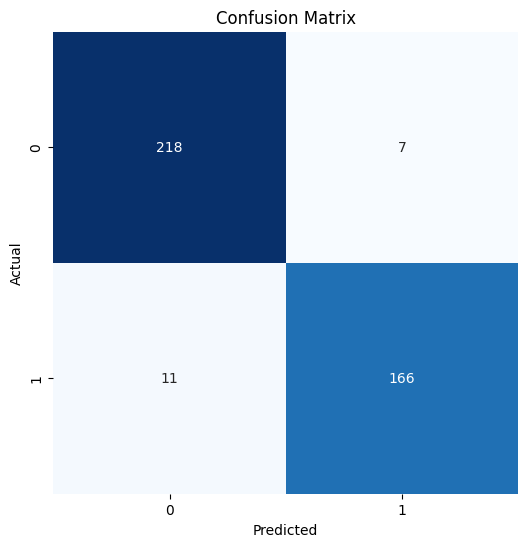

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


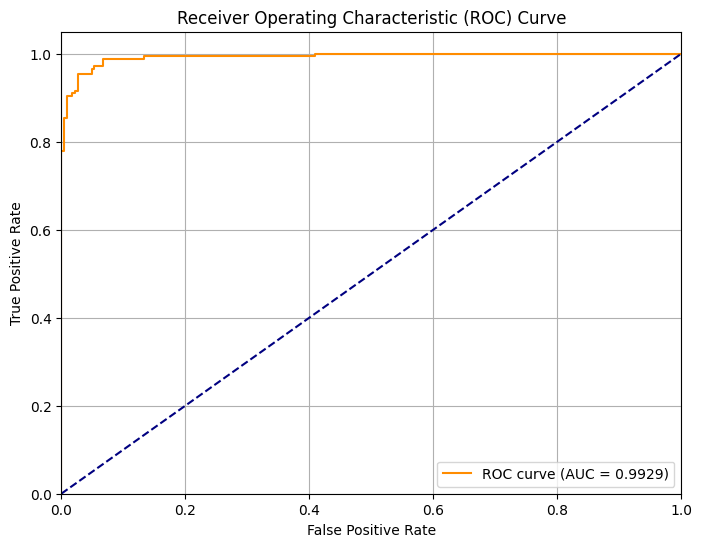

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Trained Models for EfficientNetB0V2 ===
original_model = keras.models.load_model('/content/Original_EfficientNetV2B0.keras')
level1_model = keras.models.load_model('/content/Level1_EfficeintNetV2B0.keras')
level2_model = keras.models.load_model('/content/Level2_EfficientNetV2B0.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_preds = original_model.predict(x_test)
level1_preds = level1_model.predict(x_test)
level2_preds = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_preds > 0.5).astype(int)
level1_preds = (level1_preds > 0.5).astype(int)
level2_preds = (level2_preds > 0.5).astype(int)

# === Majority Voting ===
# Concatenate predictions and apply majority voting
predictions = np.concatenate([original_preds, level1_preds, level2_preds], axis=1)
final_preds = (np.sum(predictions, axis=1) > 1).astype(int)  # Majority voting logic 0 1 1 1

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Majority Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Average probabilities for ROC Curve
avg_probs = (original_model.predict(x_test) + level1_model.predict(x_test) + level2_model.predict(x_test)) / 3
fpr, tpr, thresholds = roc_curve(y_test, avg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import numpy as np
import pandas as pd

# Combine predictions and true labels for easier analysis
pred_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_preds': original_preds.flatten(),
    'level1_preds': level1_preds.flatten(),
    'level2_preds': level2_preds.flatten(),
    'ensemble_preds': final_preds.flatten()
})

# Get probability scores for soft voting analysis
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)
avg_probs = (original_probs + level1_probs + level2_probs) / 3

# Create DataFrames for probability scores
prob_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_probs': original_probs.flatten(),
    'level1_probs': level1_probs.flatten(),
    'level2_probs': level2_probs.flatten(),
    'ensemble_probs': avg_probs.flatten()
})

# Save predictions and probabilities to Excel with multiple sheets
with pd.ExcelWriter('/content/predictions_and_probabilities.xlsx', engine='openpyxl') as writer:
    pred_df.to_excel(writer, sheet_name='Predictions', index=False)
    prob_df.to_excel(writer, sheet_name='Probabilities', index=False)



#### Weighting Voting

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 490ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 478ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 471ms/step

=== Weighted Voting Model Metrics ===
Accuracy: 95.02%
Precision: 0.9591
Recall: 0.9266
F1 Score: 0.9425
              precision    recall  f1-score   support

       clear     0.9437    0.9689    0.9561       225
      cloudy     0.9591    0.9266    0.9425       177

    accuracy                         0.9502       402
   macro avg     0.9514    0.9477    0.9493       402
weighted avg     0.9505    0.9502    0.9501       402



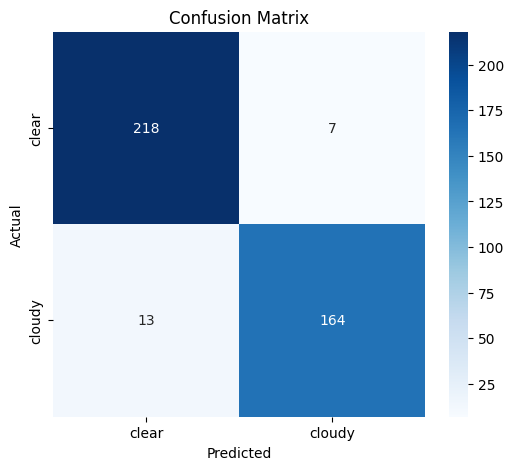

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
#


# === Load Trained Models for EfficientNetB0V2 ===
original_model = keras.models.load_model('/content/Original_EfficientNetV2B0.keras')
level1_model = keras.models.load_model('/content/Level1_EfficeintNetV2B0.keras')
level2_model = keras.models.load_model('/content/Level2_EfficientNetV2B0.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_probs > 0.5).astype(int)
level1_preds = (level1_probs > 0.5).astype(int)
level2_preds = (level2_probs > 0.5).astype(int)

# === Weighted Voting ===
weights = np.array([0.7, 0.2, 0.1])  # Assign more weight to the best-performing model

# Apply Weighted Voting
weighted_probs = (weights[0] * original_probs.flatten() +
                  weights[1] * level1_probs.flatten() +
                  weights[2] * level2_probs.flatten())

# Final Predictions with Threshold at 0.5
final_preds = (weighted_probs > 0.5).astype(int)

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Weighted Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
from sklearn.metrics import classification_report, confusion_matrix

# Define class names corresponding to numeric labels
class_names = ['clear', 'cloudy']

# Print classification report with class names
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

# Use numeric labels in confusion matrix and later map them to class names
cm = confusion_matrix(y_test, final_preds, labels=[0, 1])

# Optionally, visualize the confusion matrix with class names
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Weighted averaging of probabilities for ROC Curve
weighted_probs = (weights[0] * original_probs +
                  weights[1] * level1_probs +
                  weights[2] * level2_probs)

fpr, tpr, thresholds = roc_curve(y_test, weighted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### InceptionV3

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 461ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 456ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 452ms/step

=== Majority Voting Model Metrics ===
Accuracy: 94.53%
Precision: 0.9874
Recall: 0.8870
F1 Score: 0.9345


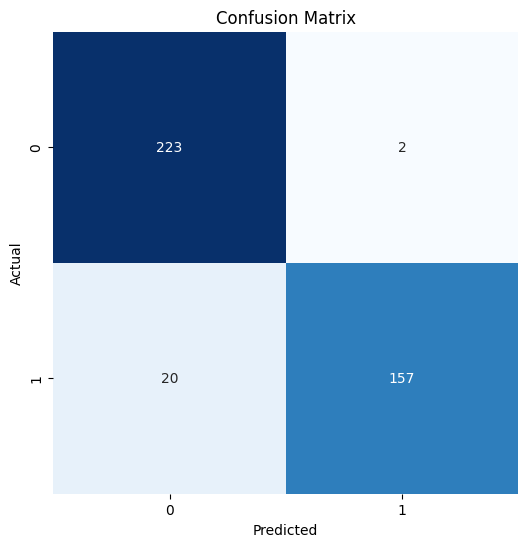

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


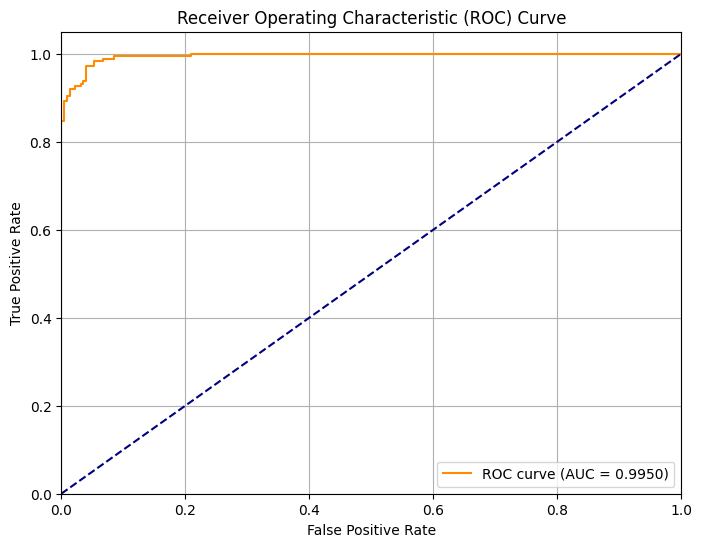

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Trained Models for InceptionV3 ===
original_model = keras.models.load_model('/content/Original_InceptionV3.keras')
level1_model = keras.models.load_model('/content/Level1_InceptionV3.keras')
level2_model = keras.models.load_model('/content/Level2_InceptionV3.keras')

# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_preds = original_model.predict(x_test)
level1_preds = level1_model.predict(x_test)
level2_preds = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_preds > 0.5).astype(int)
level1_preds = (level1_preds > 0.5).astype(int)
level2_preds = (level2_preds > 0.5).astype(int)

# === Majority Voting ===
# Concatenate predictions and apply majority voting
predictions = np.concatenate([original_preds, level1_preds, level2_preds], axis=1)
final_preds = (np.sum(predictions, axis=1) > 1).astype(int)  # Majority voting logic 0 1 1 1

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Majority Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Average probabilities for ROC Curve
avg_probs = (original_model.predict(x_test) + level1_model.predict(x_test) + level2_model.predict(x_test)) / 3
fpr, tpr, thresholds = roc_curve(y_test, avg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import numpy as np
import pandas as pd

# Combine predictions and true labels for easier analysis
pred_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_preds': original_preds.flatten(),
    'level1_preds': level1_preds.flatten(),
    'level2_preds': level2_preds.flatten(),
    'ensemble_preds': final_preds.flatten()
})

# Get probability scores for soft voting analysis
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)
avg_probs = (original_probs + level1_probs + level2_probs) / 3

# Create DataFrames for probability scores
prob_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_probs': original_probs.flatten(),
    'level1_probs': level1_probs.flatten(),
    'level2_probs': level2_probs.flatten(),
    'ensemble_probs': avg_probs.flatten()
})

# Save predictions and probabilities to Excel with multiple sheets
with pd.ExcelWriter('/content/predictions_and_probabilities.xlsx', engine='openpyxl') as writer:
    pred_df.to_excel(writer, sheet_name='Predictions', index=False)
    prob_df.to_excel(writer, sheet_name='Probabilities', index=False)



#### Weighting Voting

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 447ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 443ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 446ms/step

=== Weighted Voting Model Metrics ===
Accuracy: 95.02%
Precision: 0.9937
Recall: 0.8927
F1 Score: 0.9405
              precision    recall  f1-score   support

       clear     0.9218    0.9956    0.9573       225
      cloudy     0.9937    0.8927    0.9405       177

    accuracy                         0.9502       402
   macro avg     0.9578    0.9441    0.9489       402
weighted avg     0.9535    0.9502    0.9499       402



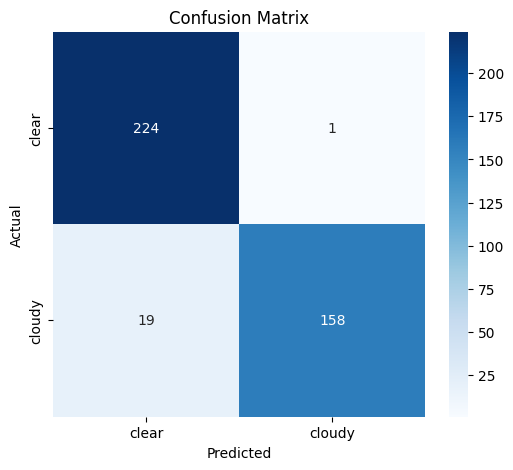

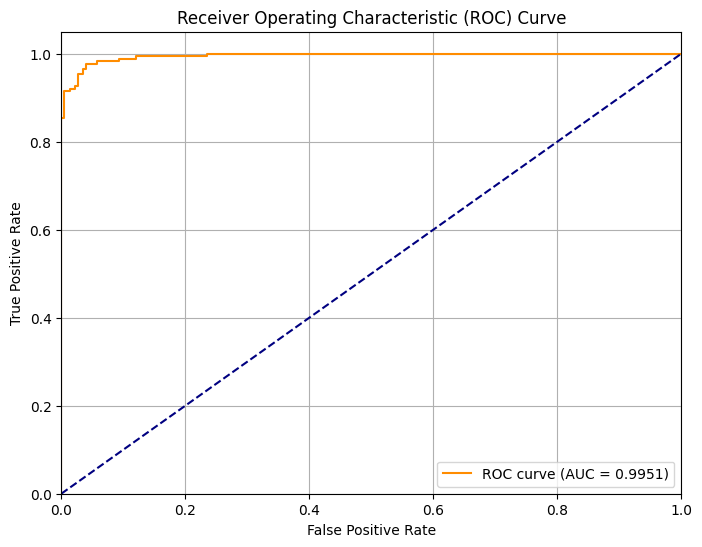

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
# === Load Trained Models ===
# === Load Trained Models for InceptionV3 ===
original_model = keras.models.load_model('/content/Original_InceptionV3.keras')
level1_model = keras.models.load_model('/content/Level1_InceptionV3.keras')
level2_model = keras.models.load_model('/content/Level2_InceptionV3.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_probs > 0.5).astype(int)
level1_preds = (level1_probs > 0.5).astype(int)
level2_preds = (level2_probs > 0.5).astype(int)

# === Weighted Voting ===
weights = np.array([0.7, 0.2, 0.1])  # Assign more weight to the best-performing model

# Apply Weighted Voting
weighted_probs = (weights[0] * original_probs.flatten() +
                  weights[1] * level1_probs.flatten() +
                  weights[2] * level2_probs.flatten())

# Final Predictions with Threshold at 0.5
final_preds = (weighted_probs > 0.5).astype(int)

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Weighted Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
from sklearn.metrics import classification_report, confusion_matrix

# Define class names corresponding to numeric labels
class_names = ['clear', 'cloudy']

# Print classification report with class names
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

# Use numeric labels in confusion matrix and later map them to class names
cm = confusion_matrix(y_test, final_preds, labels=[0, 1])

# Optionally, visualize the confusion matrix with class names
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Weighted averaging of probabilities for ROC Curve
weighted_probs = (weights[0] * original_probs +
                  weights[1] * level1_probs +
                  weights[2] * level2_probs)

fpr, tpr, thresholds = roc_curve(y_test, weighted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### InceptionResNetB2

13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 925ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 921ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step

=== Majority Voting Model Metrics ===
Accuracy: 94.78%
Precision: 0.9875
Recall: 0.8927
F1 Score: 0.9377


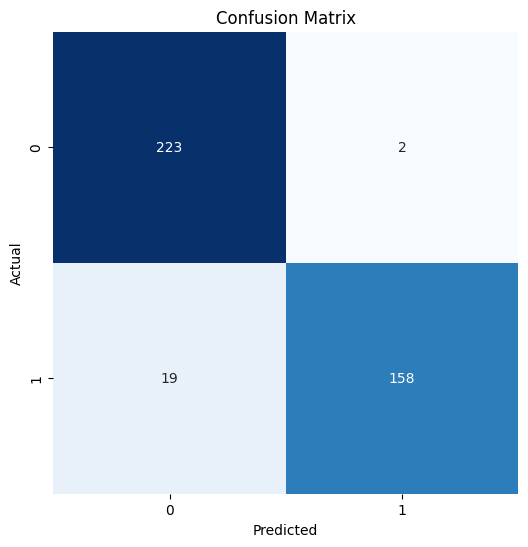

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Trained Models for InceptionResNetV2 ===
original_model = keras.models.load_model('/content/Original_InceptionResNetV2.keras')
level1_model = keras.models.load_model('/content/Level1_InceptionResNetV2.keras')
level2_model = keras.models.load_model('/content/Level2_InceptionResNetV2.keras')

# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_preds = original_model.predict(x_test)
level1_preds = level1_model.predict(x_test)
level2_preds = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_preds > 0.5).astype(int)
level1_preds = (level1_preds > 0.5).astype(int)
level2_preds = (level2_preds > 0.5).astype(int)

# === Majority Voting ===
# Concatenate predictions and apply majority voting
predictions = np.concatenate([original_preds, level1_preds, level2_preds], axis=1)
final_preds = (np.sum(predictions, axis=1) > 1).astype(int)  # Majority voting logic 0 1 1 1

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Majority Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Average probabilities for ROC Curve
avg_probs = (original_model.predict(x_test) + level1_model.predict(x_test) + level2_model.predict(x_test)) / 3
fpr, tpr, thresholds = roc_curve(y_test, avg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import numpy as np
import pandas as pd

# Combine predictions and true labels for easier analysis
pred_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_preds': original_preds.flatten(),
    'level1_preds': level1_preds.flatten(),
    'level2_preds': level2_preds.flatten(),
    'ensemble_preds': final_preds.flatten()
})

# Get probability scores for soft voting analysis
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)
avg_probs = (original_probs + level1_probs + level2_probs) / 3

# Create DataFrames for probability scores
prob_df = pd.DataFrame({
    'y_true': y_test.flatten(),
    'original_probs': original_probs.flatten(),
    'level1_probs': level1_probs.flatten(),
    'level2_probs': level2_probs.flatten(),
    'ensemble_probs': avg_probs.flatten()
})

# Save predictions and probabilities to Excel with multiple sheets
with pd.ExcelWriter('/content/predictions_and_probabilities.xlsx', engine='openpyxl') as writer:
    pred_df.to_excel(writer, sheet_name='Predictions', index=False)
    prob_df.to_excel(writer, sheet_name='Probabilities', index=False)



#### Weighting Voting

13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 972ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 949ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 920ms/step

=== Weighted Voting Model Metrics ===
Accuracy: 95.52%
Precision: 0.9938
Recall: 0.9040
F1 Score: 0.9467
              precision    recall  f1-score   support

       clear     0.9295    0.9956    0.9614       225
      cloudy     0.9938    0.9040    0.9467       177

    accuracy                         0.9552       402
   macro avg     0.9616    0.9498    0.9541       402
weighted avg     0.9578    0.9552    0.9549       402



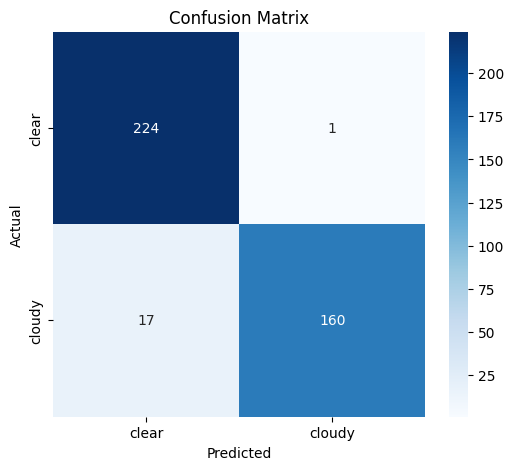

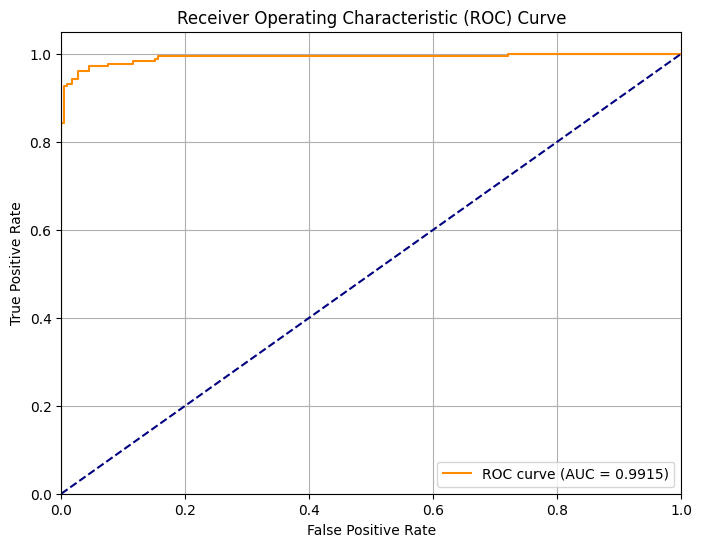

In [ ]:
# === Import Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
# === Load Trained Models ===

# === Load Trained Models for InceptionResNetV2 ===
original_model = keras.models.load_model('/content/Original_InceptionResNetV2.keras')
level1_model = keras.models.load_model('/content/Level1_InceptionResNetV2.keras')
level2_model = keras.models.load_model('/content/Level2_InceptionResNetV2.keras')


# === Make Predictions on Test Set ===
# Assuming x_test and y_test are already loaded and preprocessed
original_probs = original_model.predict(x_test)
level1_probs = level1_model.predict(x_test)
level2_probs = level2_model.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
original_preds = (original_probs > 0.5).astype(int)
level1_preds = (level1_probs > 0.5).astype(int)
level2_preds = (level2_probs > 0.5).astype(int)

# === Weighted Voting ===
weights = np.array([0.7, 0.2, 0.1])  # Assign more weight to the best-performing model

# Apply Weighted Voting
weighted_probs = (weights[0] * original_probs.flatten() +
                  weights[1] * level1_probs.flatten() +
                  weights[2] * level2_probs.flatten())

# Final Predictions with Threshold at 0.5
final_preds = (weighted_probs > 0.5).astype(int)

# === Calculate Metrics ===
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)

print("\n=== Weighted Voting Model Metrics ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
from sklearn.metrics import classification_report, confusion_matrix

# Define class names corresponding to numeric labels
class_names = ['clear', 'cloudy']

# Print classification report with class names
print(classification_report(y_test, final_preds, target_names=class_names, digits=4))

# Use numeric labels in confusion matrix and later map them to class names
cm = confusion_matrix(y_test, final_preds, labels=[0, 1])

# Optionally, visualize the confusion matrix with class names
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# === ROC Curve and AUC ===
# Weighted averaging of probabilities for ROC Curve
weighted_probs = (weights[0] * original_probs +
                  weights[1] * level1_probs +
                  weights[2] * level2_probs)

fpr, tpr, thresholds = roc_curve(y_test, weighted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
